# Importing Required Python Libraries 

In [1]:
#Importing Python Data Analysis Library
import pandas as pd

#Importing Numpy for large, multi-dimensional arrays and matrices
import numpy as np

#Importing matplotlib.pyplot as a plotting library
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

#Libraries related to using graphviz/Plotting Graphs
import graphviz
import os
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import seaborn as sns
sns.set_theme(style="whitegrid")
from mpl_toolkits import mplot3d

#Importing Libraries for different classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from mord import LogisticAT
from sklearn import tree

#Import libraries for different metrics
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix

#Split Model into test/train split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#Import Grid Search and Random Seach Libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#Import libraries to carry out SMOTE and SMOTE-N
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTEN

#Import Library for Scaling Variables
from sklearn.preprocessing import StandardScaler

#Feature Selection Liraries
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

#Libraries related to Statistical Tests
import scipy.stats as ss
import sys


#Libraries Related to Clustering
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.cluster import AgglomerativeClustering

#Libraries to Tabulate Results
from tabulate import tabulate

#Package to not display Superficial Warning
import warnings
warnings.filterwarnings('ignore')

#Required Packages to be installed
#!pip install nbconvert
#!pip install pyppeteer
#!pip install mlxtend
#!pip install graphviz
#!pip install pydotplus
#!pip install mord
#!pip install scikit-learn-extra

# Importing Dataset

In [2]:
Dataset = pd.read_csv("C:\\Users\\Owner\\Desktop\\ARI5102\\Project\\dataset.csv")

# Task 1

### To get a feel for the employed dataset, do some initial exploration and answer the following questions:

### Task 1 Part 1: How Many Question exist in the survey?

<b> It is given that options belonging to the same question share the same prefix. Hence counting the number of different prefixes would give us the number of questions.

In [3]:
#Obtaining list of Column Names
List_of_Headers = list(Dataset)

In [4]:
#Splitting Values in Header List by Underscore (Using Nested List Comprehension)
Split_List_of_Headers = [A for AS in List_of_Headers for A in AS.split("_")]

In [5]:
#Obtaining a new list of every second value in Split_List_of_Headers
Question_Numbers = []
for i in range(0,len(Split_List_of_Headers),2):
    Question_Numbers.append(Split_List_of_Headers[i])

In [6]:
#Listing only distinct values from Question_Numbers list (First Convert to Array then use np.unique())
Question_Numbers_Array = np.array(Question_Numbers)
Unique_Question_Numbers = np.unique(Question_Numbers_Array)

In [7]:
#Find length of Array to Obtain Number of Questions in Seruvey
No_of_Questions = len(Unique_Question_Numbers)
print('Number of Questions is:',No_of_Questions)

Number of Questions is: 10


### Task 1 Part 2: How many respondents contain the servey?

<b> It is given that each row in the dataset corresponds to a respondent. Hence to obtain the number of respondents simply count the number of rows.

In [8]:
#Make use of len()
Number_of_rows = len(Dataset)
print('Number of Respondents is',Number_of_rows)

Number of Respondents is 2500


### Task 1 Part 3: What are the different question types based according to their selection options

We know that some questions are single-selection whilst others are multiple-selection questions, hence we need to differentiate between these types of questions. A possibility of doing so is by viewing each question separately. Questions with only one option are single-selection by default. Questions with multiple options are multiple-selection if and only if there are some respondents who have selected more than one option.

**N.B: For those questions with multiple options, it is possible, that no respondent selected more than one option even though there was no such restriction. Therefore an assumption is being made that if the possibility of multiple-selection was allowed then at least one respondent selected more than one option.**

**N.B 2: In addition we will also check if it is possible that a question allowed an individual to not select any option of a question. In other words, all Options of a question are marked 0 (Not to be confused with missing values)**

In [9]:
#From Part 1 we have List_Of_Headers such that we can view column names
List_of_Headers

['q1_1',
 'q2_1',
 'q3_1',
 'q3_2',
 'q3_3',
 'q3_4',
 'q3_5',
 'q3_6',
 'q3_7',
 'q3_8',
 'q3_9',
 'q3_10',
 'q4_1',
 'q4_2',
 'q4_3',
 'q4_4',
 'q4_5',
 'q4_6',
 'q4_7',
 'q4_8',
 'q4_9',
 'q4_10',
 'q5_1',
 'q5_2',
 'q5_3',
 'q5_4',
 'q5_5',
 'q5_6',
 'q5_7',
 'q5_8',
 'q5_9',
 'q5_10',
 'q6_1',
 'q6_2',
 'q6_3',
 'q6_4',
 'q6_5',
 'q6_6',
 'q6_7',
 'q6_8',
 'q6_9',
 'q6_10',
 'q7_1',
 'q7_2',
 'q7_3',
 'q7_4',
 'q7_5',
 'q7_6',
 'q7_7',
 'q7_8',
 'q7_9',
 'q7_10',
 'q8_1',
 'q8_2',
 'q8_3',
 'q8_4',
 'q8_5',
 'q8_6',
 'q8_7',
 'q8_8',
 'q8_9',
 'q8_10',
 'q9_1',
 'q9_2',
 'q9_3',
 'q9_4',
 'q9_5',
 'q9_6',
 'q9_7',
 'q9_8',
 'q9_9',
 'q9_10',
 'q10_1',
 'q10_2',
 'q10_3',
 'q10_4',
 'q10_5',
 'q10_6',
 'q10_7',
 'q10_8',
 'q10_9',
 'q10_10']

In [10]:
#As can be seen from list of Headers we have a total of 10 Questions. 
#First two questions only have one option while all remaining questions have ten options. 
#We divide our dataset accordingly to obtain smaller datasets containing only one question
Q1_Data = Dataset.loc[:,'q1_1'] 
Q2_Data = Dataset.loc[:,'q2_1']
Q3_Data = Dataset.loc[:,'q3_1':'q3_10']
Q4_Data = Dataset.loc[:,'q4_1':'q4_10']
Q5_Data = Dataset.loc[:,'q5_1':'q5_10']
Q6_Data = Dataset.loc[:,'q6_1':'q6_10']
Q7_Data = Dataset.loc[:,'q7_1':'q7_10']
Q8_Data = Dataset.loc[:,'q8_1':'q8_10']
Q9_Data = Dataset.loc[:,'q9_1':'q9_10']
Q10_Data = Dataset.loc[:,'q10_1':'q10_10']

In [11]:
#For Datasets of Question 3 til Question 10, count sum of values in each row.
#If greater than 1 for at least 1 row this implies that it is a  multiple-selection question.
Q3_Count = np.count_nonzero(Q3_Data, axis=1)
Q4_Count = np.count_nonzero(Q4_Data, axis=1)
Q5_Count = np.count_nonzero(Q5_Data, axis=1)
Q6_Count = np.count_nonzero(Q6_Data, axis=1)
Q7_Count = np.count_nonzero(Q7_Data, axis=1)
Q8_Count = np.count_nonzero(Q8_Data, axis=1)
Q9_Count = np.count_nonzero(Q9_Data, axis=1)
Q10_Count = np.count_nonzero(Q10_Data, axis=1)

In [12]:
#Using max(). 
#If Maximum count is greater than 1, then Question under investigation is multiple choice.
#In Addition for Question 1 and Question 2 add manually that these are Single-Selection Questions
print("Question 1 is a Single-Selection Question")
print("Question 2 is a Single-Selection Question")

if min(Q3_Count)==0 and max(Q3_Count)>1:
    print("Question 3 is a Multiple-Selection Question and All Options Can Not Be Selected")
elif max(Q3_Count)>1:
    print("Question 3 is a Multiple-Selection Question") 
else:
    print("Question 3 is a Single-Selection Question")

if min(Q4_Count)==0 and max(Q4_Count)>1:
    print("Question 4 is a Multiple-Selection Question and All Options Can Not Be Selected")
elif max(Q4_Count)>1:
    print("Question 4 is a Multiple-Selection Question") 
else:
    print("Question 4 is a Single-Selection Question")
    
if min(Q5_Count)==0 and max(Q5_Count)>1:
    print("Question 5 is a Multiple-Selection Question and All Options Can Not Be Selected")
elif max(Q5_Count)>1:
    print("Question 5 is a Multiple-Selection Question") 
else:
    print("Question 5 is a Single-Selection Question")
    
if min(Q6_Count)==0 and max(Q6_Count)>1:
    print("Question 6 is a Multiple-Selection Question and All Options Can Not Be Selected")
elif max(Q6_Count)>1:
    print("Question 6 is a Multiple-Selection Question") 
else:
    print("Question 6 is a Single-Selection Question")
    
if min(Q7_Count)==0 and max(Q7_Count)>1:
    print("Question 7 is a Multiple-Selection Question and All Options Can Not Be Selected")
elif max(Q7_Count)>1:
    print("Question 7 is a Multiple-Selection Question") 
else:
    print("Question 7 is a Single-Selection Question")
    
if min(Q8_Count)==0 and max(Q8_Count)>1:
    print("Question 8 is a Multiple-Selection Question and All Options Can Not Be Selected")
elif max(Q8_Count)>1:
    print("Question 8 is a Multiple-Selection Question") 
else:
    print("Question 8 is a Single-Selection Question")
    
if min(Q9_Count)==0 and max(Q9_Count)>1:
    print("Question 9 is a Multiple-Selection Question and All Options Can Not Be Selected")
elif max(Q9_Count)>1:
    print("Question 9 is a Multiple-Selection Question") 
else:
    print("Question 9 is a Single-Selection Question")
    
if min(Q10_Count)==0 and max(Q10_Count)>1:
    print("Question 10 is a Multiple-Selection Question and All Options Can Not Be Selected")
elif max(Q10_Count)>1:
    print("Question 10 is a Multiple-Selection Question") 
else:
    print("Question 10 is a Single-Selection Question")

Question 1 is a Single-Selection Question
Question 2 is a Single-Selection Question
Question 3 is a Single-Selection Question
Question 4 is a Single-Selection Question
Question 5 is a Single-Selection Question
Question 6 is a Multiple-Selection Question and All Options Can Not Be Selected
Question 7 is a Multiple-Selection Question and All Options Can Not Be Selected
Question 8 is a Multiple-Selection Question and All Options Can Not Be Selected
Question 9 is a Multiple-Selection Question and All Options Can Not Be Selected
Question 10 is a Multiple-Selection Question and All Options Can Not Be Selected


# Task 2

### If you were asked to build a model for a (any) question in the dataset, using the rest of the questions as explanatory variables.

### Task 2 Part 1: Which performance measures would you use?

It is possible to have the following two sets of problems [1]: 
1. Classification Problems (Label Set is finite and Discrete)
2. Regression Problems (Label Set is Set of Real Numbers)


For our dataset all of our questions seem to be classification problems. Therefore If we had to build a model for any question in our dataset, we would have the following classification problems [1]:


1. Question 1 and 2 are Binary Classification Problems (This is since both questions have a maximum of two class labels each)
2. Questions 3,4 and 5 are Multi-Class Classification Problems (Both Questions can have a maximum of ten class lables however final result will only be one particular class)
3. Question 6,7,8,9 and 10 are Multi-Label Classification Problems (Both Questions can have a maximum of ten class lables and final result can be more than one particular class)

Hence if we were asked to build a mode for any of these ten questions, the performance measures utilised would be the following:
1. Question 1 - Since this is a Binary Classification Problem the performance metrics which can be utilized are Accuracy, Error Rate, Precision, Recall and F1-Score. Ideally however the Accuracy and Error Rate are avoided if the results of Question 1 are unbalanced (Ex. Significantly more individuals selected Question 1). [2]
2. Question 2 - Similar to Question 1, since Question 2 is a Binary Classification problem the performance measures which can be utilized are Accuracy, Error Rate, Precision, Recall and F1-Score. Likewise Accuracy and Error Rate should be avoided if the results of Question 2 are unbalanced. [2]
3. Question 3 - Since this is a Multi-Class Classification Problem, Macro Average, Weighted Average or Micro Average F1-Scores can be utilized as performance measures. Precision and Recall can be calculated for each class using the same expressions employed for Binary classification problems. [3]
4. Question 4 - Similar to Question 3 Macro Average, Weighted Average or Micro Average F1-Scores can be utilized as performance measures. Precision and Recall can be calculated for each class using the same expressions employed for Binary classification problems. [3]
5. Question 5 - Similar to Questions 3 and 5 Macro Average, Weighted Average or Micro Average F1-Scores can be utilized as performance measures. Precision and Recall can be calculated for each class using the same expressions employed for Binary classification problems. [3]
6. Question 6 - Since this is a Multi-Label classification problem the performance measures which can be utilized are Macro-Average F1-Score, Micro-Average F1-Score and Hamming Loss. [4]
7. Question 7 - Similar to Question 6 the performance measures which can be utilized are Macro-Average F1-Score, Micro-Average F1-Score and Hamming Loss. [4]
8. Question 8 - Similar to Questions 6 and 7, the performance measures which can be utilized are Macro-Average F1-Score, Micro-Average F1-Score and Hamming Loss. [4]
9. Question 9 - Similar to Questions 6 to 8, the performance measures which can be utilized are Macro-Average F1-Score, Micro-Average F1-Score and Hamming Loss. [4]
10. Question 10 - Similar to Questions 6 to 9, the performance measures which can be utilized are Macro-Average F1-Score, Micro-Average F1-Score and Hamming Loss. [4]





### Task 2 Part 2: Does the selection of the performance metric depend on the type of question?

As can be assessed from Task 2 Part 1 every different type of question may make use of different performance measures according to their suitability to the problem at hand. A summary for our dataset is as follows:
1. The Single-Selection Questions can be either Binary Classification problems or Multi-Class Classification problems.
2. The Multiple-Selection Questions are Multi-Label Classification problems.

Prior to stating the performance measures which can be used for each classification problem, let us go over some useful terms:
1. True Positives (TP) - The number of times a classifier **correctly** predicts the **existance** of a label [2].
2. True Negaitve (TN)- The number of times a classifier **correctly** predicts the **inexistance** of a label [2].
3. False Positive (FP) - The number of times a classifier **incorrectly** predicts the **existance** of a label [2].
4. False Negative (FN) - The number of times a classifier **incorrectly** predicts the **inexistance** of a label [2].

Each of these Classification problems makes use of different performance measures.


1. Binary Classification Problems can make use of Accuracy, Error Rate, Precision, Recall and F1-Score:
    1. Accuracy - The percentage of correct predictions in the test data whcih is calculated using the following expression: $\frac{TP+TN}{TP+TN+FP+FN}$ [2]
    2. Error Rate - The percentage of erroneous predictions in the test data which is calculated using the following expession: $1 - \frac{TP+TN}{TP+TN+FP+FN}$ [2]
    3. Precision (p)- The percentage of correct predictions in a class with respect to number of predicted values for that class which is calculated using the following expression: $\frac{TP}{TP+FP}$ [2]
    4. Recall (r)- The percentage of correct predictions in a class with respect to actual number of values for that class which is calculated using the following expression: $\frac{TP}{TP+FN}$
    5. F1-Score - The average for the Precision and Recall values denoted by the following expression: $\frac{2*p*r}{p+r}$ [2]
    
    
2. Multi-Class Classification Problems:
    1. Macro average F1-Score - The Mean of the F1-Score calculated for each possible class (Unweighted) [3]
    2. Weighted average F1-Score - The Mean of the F1-Score calculated for each possible class which is weighted according to the number of actual occurances of the class in the dataset (support) [3]
    3. Micro average F1-Score - A global average F1 score which considers the sum of True Positives (TP), Flase Positives (FP) and False Negatives (FN) of all classes calculated using the following expression: $\frac{TP}{TP + \frac{1}{2}(FP+FN)}$ [3]
    
    
3. Multi-Label Classification Problem
    1. Hamming Loss - The proportion of labels that are incorrectly predicted which is calculated using the following expression: $\frac{1}{NL}\sum_{l=1}^{L}\sum_{i=1}^{N} Y_{i,l} \oplus X_{i,l}$ Where: $N$ represents the number of respondents, $L$ represents the number of labels, $Y_{i,l}$ represent the true values, $X_{i,l}$ represent the predicted values and $\oplus$ is an exclusive-or opertator [4]
    2. Macro avergae F1-Score [4]
    3. Micro average F1-Score [4]

# Task 3

### Consider the fifth question (q5) as a response variable and build a predictive model using some or all questions as explanatory variables.

### Task 3 Part 1.1: Implement a suitable algorithm for this task.

According to [5], the recomended Pre-Processing steps, to be applied on a Dataset prior to implementing a suitable algorithm are the following:

1. Extract Independent and Dependent Variables in Dataset 
2. Identify and handle Missing Values
3. Encoding Categorical Variables 
4. Splitting Dataset 
5. Feature Scaling
6. Data Imbalance

We will now go over the execution of each of these pre-processing steps on our dataset.

### Extract Independent and Dependent Variables in Dataset

It is given that fifth question (q5) should be the response variable and all other questions are explanatory variables. q5 has a total of 10 columns (q5_1 - q5_10). These will be considered to be the response variables (Dataset_Response). To obtain Explanatory Variables, the Response Variables will be dropped from the Dataset (Dataset_Explanatory)

In [13]:
Dataset_Response = Dataset.loc[:,['q5_1','q5_2','q5_3','q5_4','q5_5','q5_6','q5_7','q5_8','q5_9','q5_10']]
Dataset_Explanatory = Dataset.drop(['q5_1','q5_2','q5_3','q5_4','q5_5','q5_6','q5_7','q5_8','q5_9','q5_10'], axis=1)

### Identify and Handle Missing Values

In [14]:
# Checking Missing Values in Response Variable (Using df.isna().sum())
Dataset_Response.isna().sum() #No Missing Values

q5_1     0
q5_2     0
q5_3     0
q5_4     0
q5_5     0
q5_6     0
q5_7     0
q5_8     0
q5_9     0
q5_10    0
dtype: int64

In [15]:
#Increasing Number of Minimum Rows Shown in Pandas
pd.set_option("display.max_columns" , None)
# Checking Percentage of Missing Values in Explanatory Variable
Dataset_Explanatory.isna().sum()
Explanatory_PercentageMissing = Dataset_Explanatory.isnull().sum()*100/len(Dataset_Explanatory) 
Explanatory_PercentageMissing #35.28% of Data missing in q6 & 54.60% of Data missing in q8

q1_1      0.0
q2_1      0.0
q3_1      0.0
q3_2      0.0
q3_3      0.0
         ... 
q10_6     0.0
q10_7     0.0
q10_8     0.0
q10_9     0.0
q10_10    0.0
Length: 72, dtype: float64

In [16]:
Dataset_Explanatory.isna().sum() #882 values missing in q6 & 1365 values missing in q8

q1_1      0
q2_1      0
q3_1      0
q3_2      0
q3_3      0
         ..
q10_6     0
q10_7     0
q10_8     0
q10_9     0
q10_10    0
Length: 72, dtype: int64

Since a significant Portion of Question 6 and Question 8 are missing we will now check in which of the below three categorie our missing data belongs to:
1. Missing Completely At Random (MCAR) - The reason behind why data is missing is unrelated to observed and unobserved data. In other words, the missing data points occur randomly and are not influenced by the characteristics of the data or any external factors [6].
2. Missing At Random (MAR) - The reason behind why data is missing is related to the observed data but not directly related to the unobserved (missing) data. In other words, missing data can be accounted for using the observed data [6].
3. Missing Not At Random (MNAR) - The reason behind why data is missing is related to the unobserved (missing) data. As a result, missing data of this type cannot be explained or predicted by the observed data [6].

To check which is the category our missing data belongs to, we will make use of the Chi-Square Test of Independence which is a statistical test used to determine wether there is a significant relationship between two nominal variables. The Null and Alternative Hypotheses for the chi-square test of independence are the following [7]:
1. $H_{0}$ - There is no association between the two variables
2. $H_{1}$ - There is an association between the two variables

The null hypothesis ($H_{0}$) is accepted or rejected in-favor of the alternative hypothesis ($H_{1}$) depending on the result of the chi-square test statistic when compared to a chosen critical value [7].

The value of the Chi-Square test of independence is calculated using the following equation:
$ \chi^{2} = \sum \frac{{(O_{i} - E_{i})}^{2}}{E_{i}}$ where $\chi^{2}$ is chi-squared value,  $O_{i}$ is the observed value and $E_{i}$ is the Expected value [7].

In [17]:
#Create New Dataset Excluding all q6 questions apart from option 1 and all q8 questions
Dataset_Check_Q6= Dataset.drop(['q6_2','q6_3','q6_4','q6_5','q6_6','q6_7','q6_8','q6_9','q6_10','q8_1','q8_2','q8_3','q8_4','q8_5','q8_6','q8_7','q8_8','q8_9','q8_10'], axis=1)

In [19]:
#Creating for loop 
for i in Dataset_Check_Q6:
    if i == "q1_1":
        #Check if Values in q1_1 are correlated to empty values in q6_1
        #H_0: There is no association between missing values in q6 (all options) anq q1_1.
        #Initilize New Column Names q6_missing
        Dataset_Check_Q6["q6_Missing"] = Dataset_Check_Q6["q6_1"]
        #Label all entries in q6_Missing as false
        Dataset_Check_Q6["q6_Missing"] = False
        #When q6_1 is blank replace False with Tre
        Dataset_Check_Q6.loc[Dataset_Check_Q6[Dataset_Check_Q6["q6_1"].isnull()].index, "q6_Missing"] = True
        #Obtaining When Missing Part of Contingency Table
        Dataset_Check_Q6[Dataset_Check_Q6["q6_Missing"]==True].groupby("q1_1")["q6_Missing"].count()
        #Obtaining When Filled in Part of Contingency Tables
        Dataset_Check_Q6[Dataset_Check_Q6["q6_Missing"]==False].groupby("q1_1")["q6_Missing"].count()
        #Contingency Table
        table = [[882,0],[0,1618]]
        #Print Contingency Table
        print(table)
        #Obtaining P-Value
        chi2, p, dof, ex = chi2_contingency(table)
        print("The p-value of q1_1 is equal to {}".format(p)) #P-Value is 0<0.05 (Reject H_0)
    elif i == "q6_1":
        print("Nothing")
    elif i == "q10_10":
        #Initializing Data
        Dataset_Check_Q6["q6_Missing"] = Dataset_Check_Q6["q6_1"]
        #Label all Columns in q6_1_Missing As False
        Dataset_Check_Q6["q6_Missing"] = False
        #If entry in q6_1 is empty then label corresponding row in q6_1_missing as True
        Dataset_Check_Q6.loc[Dataset_Check_Q6[Dataset_Check_Q6["q6_1"].isnull()].index, "q6_Missing"] = True
        #Obtaining Empty Part of the Contingency Table
        Truther = Dataset_Check_Q6[Dataset_Check_Q6["q6_Missing"]==True].groupby(i)["q6_Missing"].count()
        #Obtaining Filled in Part of Contingency Table
        Faker = Dataset_Check_Q6[Dataset_Check_Q6["q6_Missing"]==False].groupby(i)["q6_Missing"].count()
        #Obtaining Contingency Table
        table = [[Truther[0],Truther[1]],[Faker[0],Faker[1]]]
        #Obtaining P-Value
        chi2, p, dof, ex = chi2_contingency(table)
        if p <= 0.05:
            print(table)
            print('The p-value of {} compared to q6 is {}'.format(i,p))
        else:
            print('The p-value of {} comparred to q6 is not associated'.format(i))
        break 
    else:
        #Initializing Data
        Dataset_Check_Q6["q6_Missing"] = Dataset_Check_Q6["q6_1"]
        #Label all Columns in q6_1_Missing As False
        Dataset_Check_Q6["q6_Missing"] = False
        #If entry in q6_1 is empty then label corresponding row in q6_1_missing as True
        Dataset_Check_Q6.loc[Dataset_Check_Q6[Dataset_Check_Q6["q6_1"].isnull()].index, "q6_Missing"] = True
        #Obtaining Empty Part of the Contingency Table
        Truther = Dataset_Check_Q6[Dataset_Check_Q6["q6_Missing"]==True].groupby(i)["q6_Missing"].count()
        #Obtaining Filled in Part of Contingency Table
        Faker = Dataset_Check_Q6[Dataset_Check_Q6["q6_Missing"]==False].groupby(i)["q6_Missing"].count()
        #Obtaining Contingency Table
        table = [[Truther[0],Truther[1]],[Faker[0],Faker[1]]]
        #Obtaining P-Value
        chi2, p, dof, ex = chi2_contingency(table)
        if p <= 0.05:
            print(table)
            print('The p-value of {} compared to q6 is {}'.format(i,p))
        else:
            print('The p-value of {} comparred to q6 is not associated'.format(i))

[[882, 0], [0, 1618]]
The p-value of q1_1 is equal to 0.0
The p-value of q2_1 comparred to q6 is not associated
[[802, 80], [1334, 284]]
The p-value of q3_1 compared to q6 is 1.2967275169509904e-08
[[802, 80], [1578, 40]]
The p-value of q3_2 compared to q6 is 3.4228272380361606e-13
The p-value of q3_3 comparred to q6 is not associated
[[842, 40], [1472, 146]]
The p-value of q3_4 compared to q6 is 6.158512508670556e-05
[[772, 110], [1520, 98]]
The p-value of q3_5 compared to q6 is 4.411936672534237e-08
[[853, 29], [1374, 244]]
The p-value of q3_6 compared to q6 is 3.065364881609902e-19
[[709, 173], [1408, 210]]
The p-value of q3_7 compared to q6 is 1.4024177005638411e-05
The p-value of q3_8 comparred to q6 is not associated
[[763, 119], [1472, 146]]
The p-value of q3_9 compared to q6 is 0.0006733801038077009
The p-value of q3_10 comparred to q6 is not associated
[[704, 178], [1545, 73]]
The p-value of q4_1 compared to q6 is 3.0503823420944e-35
The p-value of q4_2 comparred to q6 is not 

In [20]:
#Create New Dataset Excluding all q6 questions apart from option 1 and all q8 questions
Dataset_Check_Q8= Dataset.drop(['q6_1','q6_2','q6_3','q6_4','q6_5','q6_6','q6_7','q6_8','q6_9','q6_10','q8_2','q8_3','q8_4','q8_5','q8_6','q8_7','q8_8','q8_9','q8_10'], axis=1)

In [21]:
#Creating for loop 
for i in Dataset_Check_Q6:
    if i == "q2_1":
        #Check if Values in q1_1 are correlated to empty values in q8_1
        #H_0: There is no association between missing values in q8 (all options) anq q1_1.
        #Initilize New Column Names q8_missing
        Dataset_Check_Q8["q8_Missing"] = Dataset_Check_Q8["q8_1"]
        #Label all entries in q8_Missing as false
        Dataset_Check_Q8["q8_Missing"] = False
        #When q8_1 is blank replace False with True
        Dataset_Check_Q8.loc[Dataset_Check_Q8[Dataset_Check_Q8["q8_1"].isnull()].index, "q8_Missing"] = True
        #Obtaining When Missing Part of Contingency Table
        Dataset_Check_Q8[Dataset_Check_Q8["q8_Missing"]==True].groupby(i)["q8_Missing"].count()
        #Obtaining When Filled in Part of Contingency Tables
        Dataset_Check_Q8[Dataset_Check_Q8["q8_Missing"]==False].groupby(i)["q8_Missing"].count()
        #Contingency Table
        table = [[1365,0],[0,1135]]
        #Print Contingency Table
        print(table)
        #Obtaining P-Value
        chi2, p, dof, ex = chi2_contingency(table)
        print("The p-value of q2_1 is equal to {}".format(p)) #P-Value is 0<0.05 (Reject H_0)
    elif i == "q6_1":
        print("Nothing")
    elif i == "q10_10":
        #Initializing Data
        Dataset_Check_Q8["q8_Missing"] = Dataset_Check_Q8["q8_1"]
        #Label all Columns in q8_1_Missing As False
        Dataset_Check_Q8["q8_Missing"] = False
        #If entry in q8_1 is empty then label corresponding row in q8_1_missing as True
        Dataset_Check_Q8.loc[Dataset_Check_Q8[Dataset_Check_Q8["q8_1"].isnull()].index, "q8_Missing"] = True
        #Obtaining Empty Part of the Contingency Table
        Truther = Dataset_Check_Q8[Dataset_Check_Q8["q8_Missing"]==True].groupby(i)["q8_Missing"].count()
        #Obtaining Filled in Part of Contingency Table
        Faker = Dataset_Check_Q8[Dataset_Check_Q8["q8_Missing"]==False].groupby(i)["q8_Missing"].count()
        #Obtaining Contingency Table
        table = [[Truther[0],Truther[1]],[Faker[0],Faker[1]]]
        #Obtaining P-Value
        chi2, p, dof, ex = chi2_contingency(table)
        if p <= 0.05:
            print(table)
            print('The p-value of {} compared to q8 is {}'.format(i,p))
        else:
            print('The p-value of {} comparred to q8 is not associated'.format(i))
        break 
    else:
        #Initializing Data
        Dataset_Check_Q8["q8_Missing"] = Dataset_Check_Q8["q8_1"]
        #Label all Columns in q8_1_Missing As False
        Dataset_Check_Q8["q8_Missing"] = False
        #If entry in q8_1 is empty then label corresponding row in q8_1_missing as True
        Dataset_Check_Q8.loc[Dataset_Check_Q8[Dataset_Check_Q8["q8_1"].isnull()].index, "q8_Missing"] = True
        #Obtaining Empty Part of the Contingency Table
        Truther = Dataset_Check_Q8[Dataset_Check_Q8["q8_Missing"]==True].groupby(i)["q8_Missing"].count()
        #Obtaining Filled in Part of Contingency Table
        Faker = Dataset_Check_Q8[Dataset_Check_Q8["q8_Missing"]==False].groupby(i)["q8_Missing"].count()
        #Obtaining Contingency Table
        table = [[Truther[0],Truther[1]],[Faker[0],Faker[1]]]
        #Obtaining P-Value
        chi2, p, dof, ex = chi2_contingency(table)
        if p <= 0.05:
            print(table)
            print('The p-value of {} compared to q8 is {}'.format(i,p))
        else:
            print('The p-value of {} comparred to q8 is not associated'.format(i))

The p-value of q1_1 comparred to q8 is not associated
[[1365, 0], [0, 1135]]
The p-value of q2_1 is equal to 0.0
[[1259, 106], [877, 258]]
The p-value of q3_1 compared to q8 is 8.115950646230622e-26
[[1324, 41], [1056, 79]]
The p-value of q3_2 compared to q8 is 6.3684556237192374e-06
[[1157, 208], [1070, 65]]
The p-value of q3_3 compared to q8 is 5.18678777827359e-14
[[1206, 159], [1108, 27]]
The p-value of q3_4 compared to q8 is 2.8625127970087886e-18
[[1271, 94], [1021, 114]]
The p-value of q3_5 compared to q8 is 0.005547452449231466
The p-value of q3_6 comparred to q8 is not associated
[[1185, 180], [932, 203]]
The p-value of q3_7 compared to q8 is 0.001414267955563629
[[1297, 68], [1033, 102]]
The p-value of q3_8 compared to q8 is 0.00010416836551643427
The p-value of q3_9 comparred to q8 is not associated
[[1155, 210], [1087, 48]]
The p-value of q3_10 compared to q8 is 1.2757398047611127e-19
[[1263, 102], [986, 149]]
The p-value of q4_1 compared to q8 is 3.882905787141132e-06
[[12

In the above code we have tested (using Chi2 test of independence) whether the number of missing entries in q6 (All Options) and q8 (all options) are dependent on the entries in all of the other variables.

From the p-values obtained, it can be noted that the number of missing rows in both variables is dependent on the entries of the other variables. In particular two relationships stand out:
1. A p-value of 0 was obtained when comparing entries in q1_1 and the missing entries in q6 (All Options)
2. A p-value of 0 was obtained when comparing entries in q2_1 and the missing entries in q8 (All Options)

Hence we can conclude that missing entries in q6 (All Options) and q8 (All Options), are missing at random (MAR), and can be fully accounted for by values in q1_1 and q2_1 respectively.

This can also be shown by the following two plots:

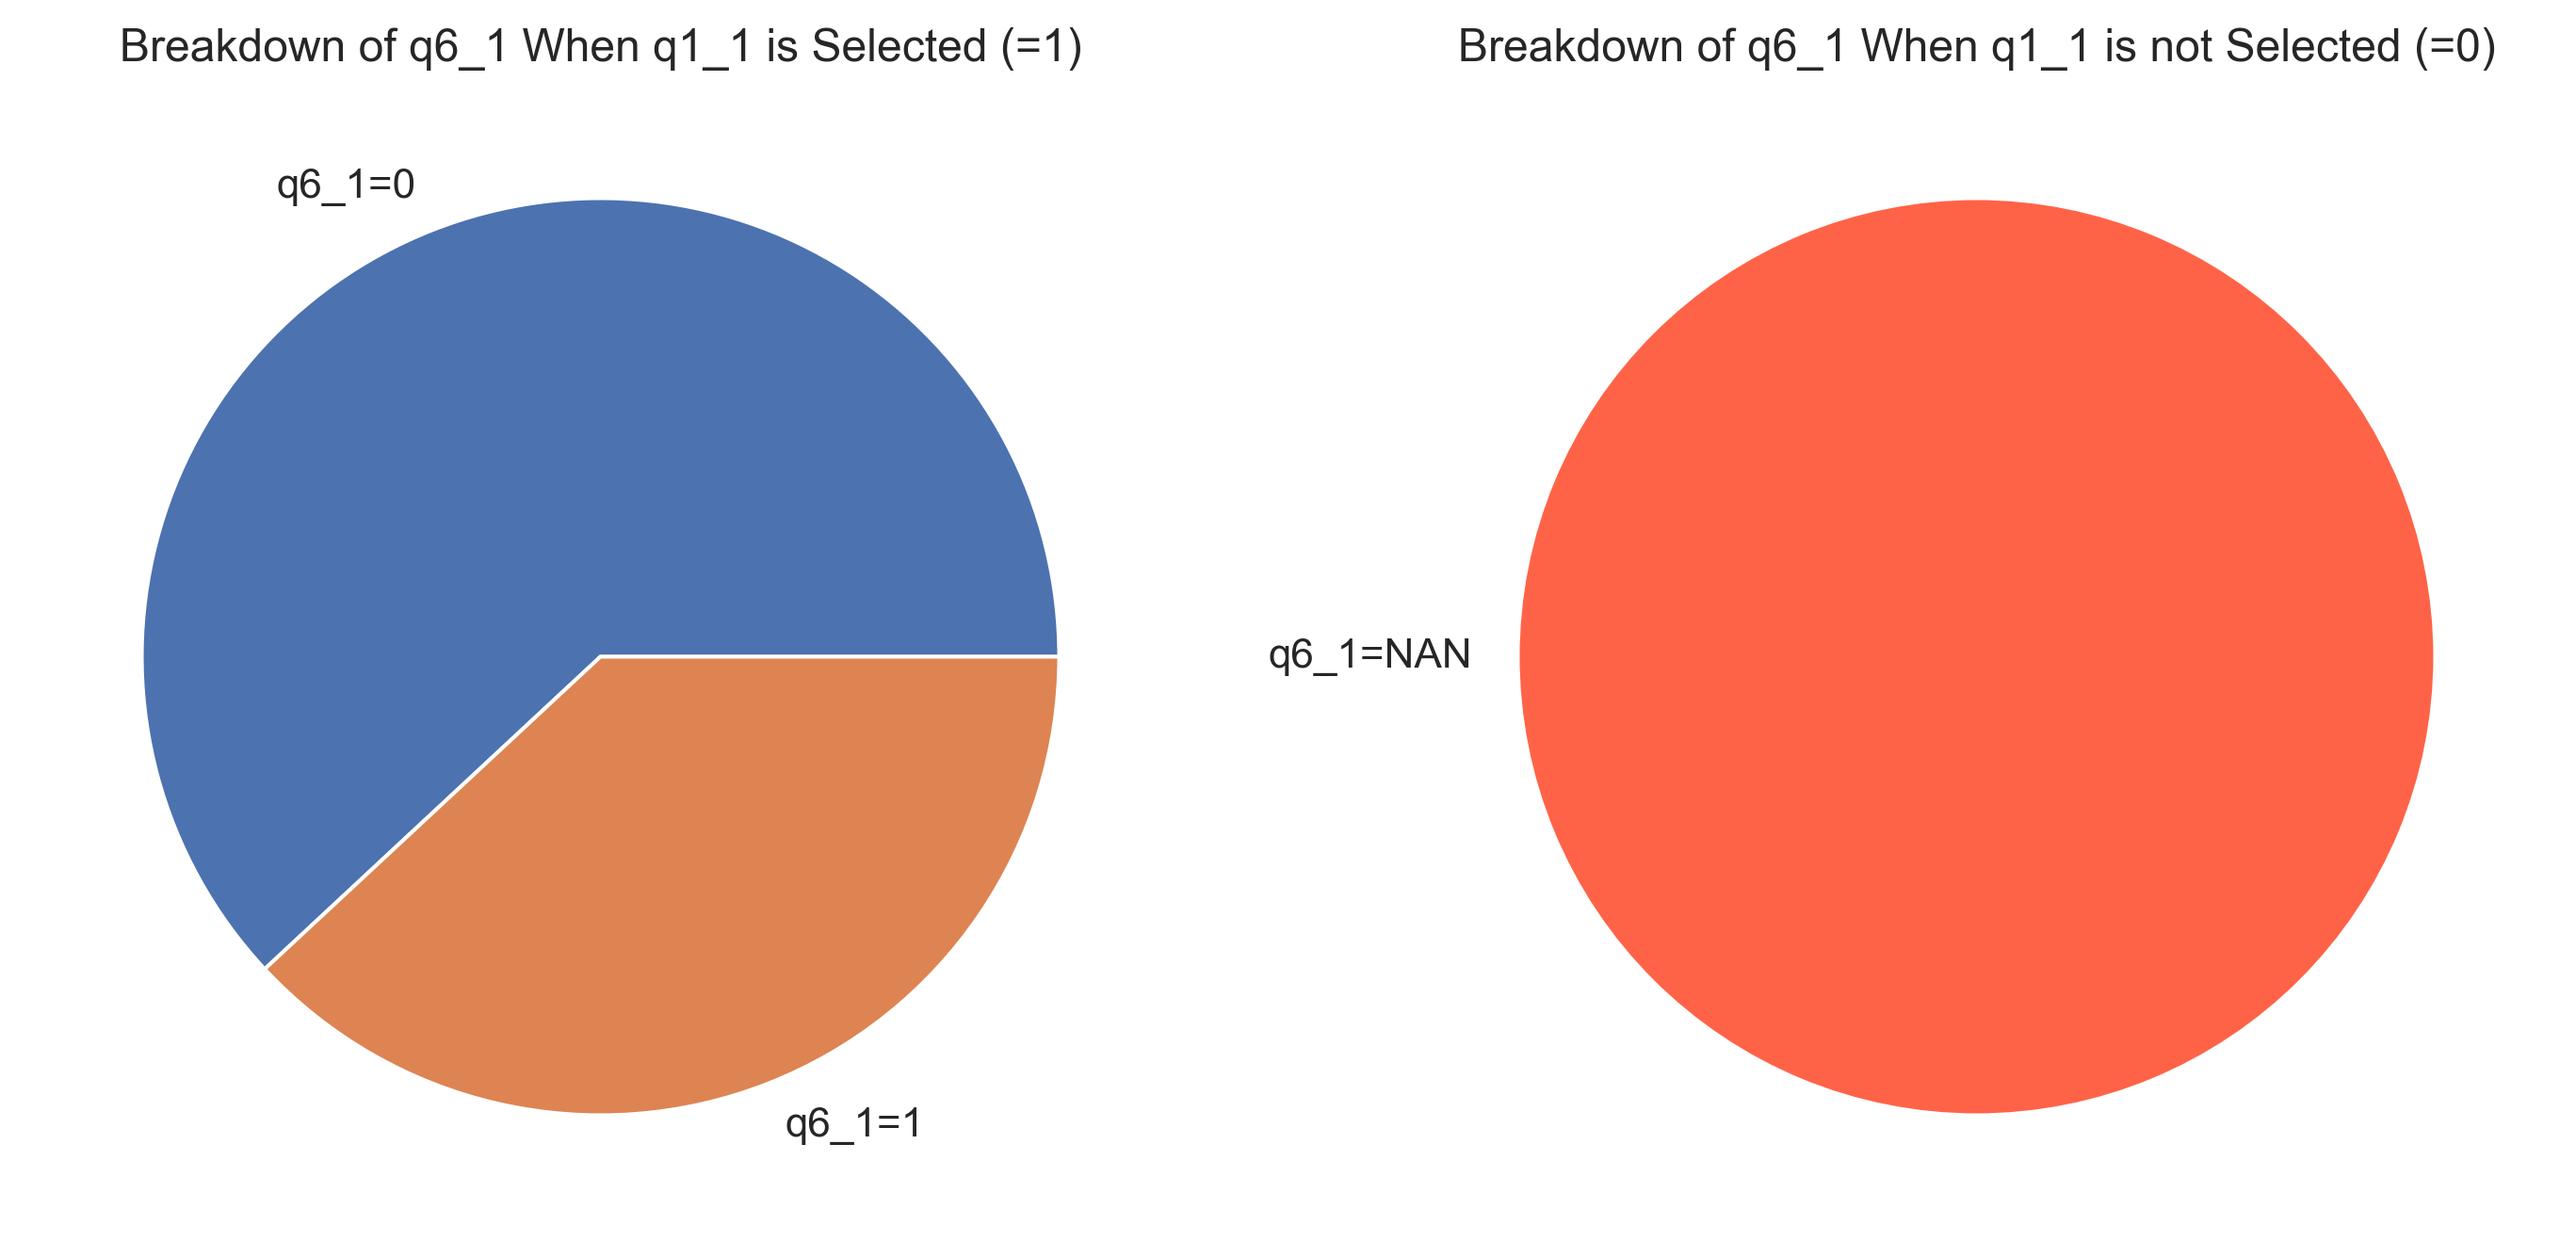

In [22]:
#Creating Figure comparing values in q1_1 and q6_1
fig = plt.figure(figsize=(12,9),dpi=288)
#Any Empty Entries in Dataset are filled in with Empty 
#Hence will be visible in plot
DatasetEmpty = Dataset.fillna('Empty')
#Consider only entries where value in q1_1 is 1
Datasetq1_1 = DatasetEmpty[DatasetEmpty['q1_1']==1]
#Obtain counts of entries in q6_1
Counts1 = Datasetq1_1['q6_1'].value_counts()
#Plot Figure
ax1 = fig.add_subplot(121)
#Add Labels
ax1.pie(Counts1, labels = ["q6_1=0","q6_1=1"] )
#Add title
ax1.set(aspect="equal", title = 'Breakdown of q6_1 When q1_1 is Selected (=1)')

#Consider only entries where value in q1_1 is 0
Datasetq1_0 = DatasetEmpty[DatasetEmpty['q1_1']==0]
#Obtain counts of entries in q6_1
counts2 = Datasetq1_0['q6_1'].value_counts()
#Plot Figure
ax2 = fig.add_subplot(122)
#Add Labels and colour to distinguish from first pie chart
ax2.pie(counts2, labels = ["q6_1=NAN"], colors = ['tomato','gray'])
#Add title
ax2.set(aspect="equal",title = 'Breakdown of q6_1 When q1_1 is not Selected (=0)')
#Show Plot
plt.show()

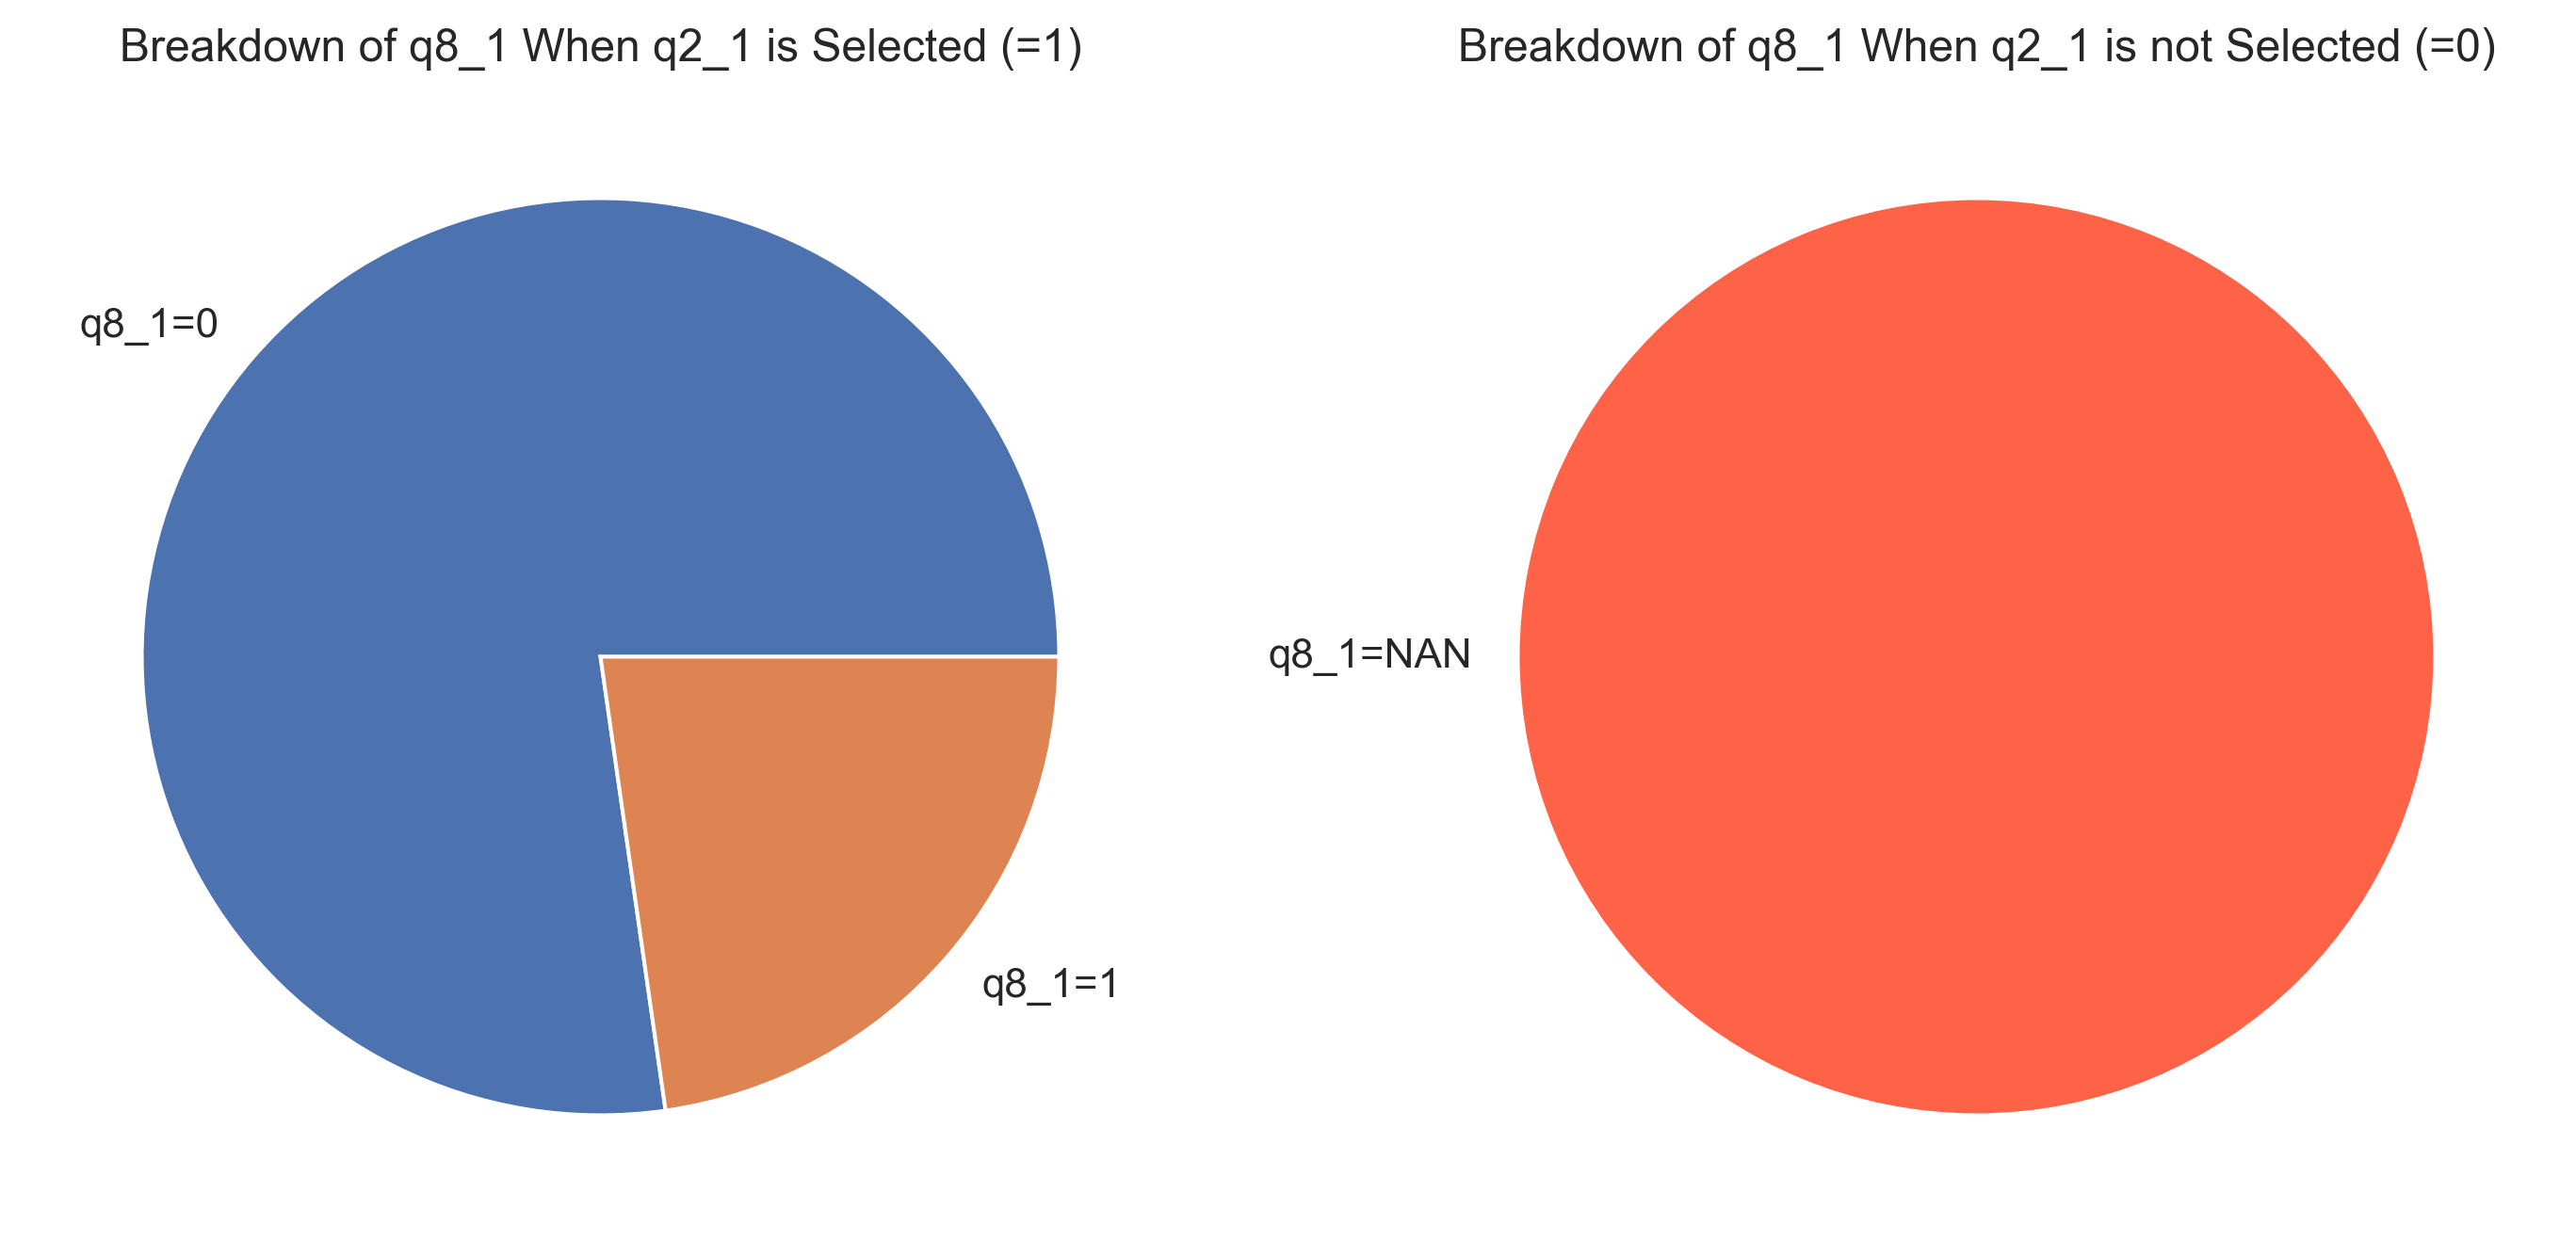

In [23]:
#Creating Figure comparing values in q2_1 and q8_1
fig = plt.figure(figsize=(12,9),dpi=288)
#Consider only entries where value in q2_1 is 1
Datasetq2_1 = DatasetEmpty[DatasetEmpty['q2_1']==1]
#Obtain counts of entries in q8_1
Counts3 = Datasetq2_1['q8_1'].value_counts()
#Plot Figure
ax3 = fig.add_subplot(121)
#Add Labels
ax3.pie(Counts3, labels = ["q8_1=0","q8_1=1"] )
#Add title
ax3.set(aspect="equal", title = 'Breakdown of q8_1 When q2_1 is Selected (=1)')

#Consider only entries where value in q2_1 is 0
Datasetq2_0 = DatasetEmpty[DatasetEmpty['q2_1']==0]
#Obtain counts of entries in q8_1
counts4 = Datasetq2_0['q8_1'].value_counts()
#Plot Figure
ax4 = fig.add_subplot(122)
#Add Labels and colour to distinguish from first pie chart
ax4.pie(counts4, labels = ["q8_1=NAN"], colors = ['tomato','gray'])
#Add title
ax4.set(aspect="equal",title = 'Breakdown of q8_1 When q2_1 is not Selected (=0)')
#Show Plot
plt.show()

From the above Pie Charts it is clear that the number of missing values in q6_1 and q8_1 can be completely explained by q1_1 and q2_1 respectively. 

Most problaly the survey requested individuals who selected q1_1 to only fill in q6 (all options) and similarly individuals who selected q2_1 could only fill in q8 (all options). 

As a way forward, all missing entries in q6 (all options) and q8 (all options) will be filled in with a $0$ value and a new option is added (q6_11 and q8_11) which is filled with a $1$ value if all other options are missing. Hence, a new level has been created representing empty instances for Question 6 and Question 8 respectively. In addition the variables q1_1 and q2_1 will be removed since their values are explained by the newly created level. 

Proceeding in such a way allows for no data loss which would have otherwise occured if all q6 and q8 options were removed as variables.

In [24]:
#Adjust Dataset containing Explanatory Variables by filling in Empty rows (Only present in q6 and q8) with the word Empty

#This creates a new label.
Dataset_Explanatory["q6_11"] = Dataset_Explanatory["q6_1"]
#Label all entries in q6_11 as 0
Dataset_Explanatory["q6_11"] = 0
#When q6_1 is blank replace False with 1
Dataset_Explanatory.loc[Dataset_Explanatory[Dataset_Explanatory["q6_1"].isnull()].index, "q6_11"] = 1

#This creates a new label.
Dataset_Explanatory["q8_11"] = Dataset_Explanatory["q8_1"]
#Label all entries in q8_11 as 0
Dataset_Explanatory["q8_11"] = 0
#When q8_1 is blank replace 0 with 1
Dataset_Explanatory.loc[Dataset_Explanatory[Dataset_Explanatory["q8_1"].isnull()].index, "q8_11"] = 1

#Fill All empty rows with 0
Dataset_Explanatory = Dataset_Explanatory.fillna(0)
#Remove columns q1_1 and q2_1
Dataset_Explanatory = Dataset_Explanatory.drop(['q1_1','q2_1'], axis=1)

### Encoding Categorical Variables

Not enough information was given regarding the dataset and variables to deduce whether data is nominal (Specific Category _Ex:_Country of Origin) or ordinal (Specific Sequence _Ex:_Likert Scale) [Assuming data is nominal as otherwise handling such data as ordinal could lead to biased results] [5].

**NB:** There is a possibility that data can also be discrete or continous variables which have been binned.

However, it is known that each column contains only 1 and 0 values to indicate whether an option has been selected or not, hence data is already in a numerical format and can be used to build a predictive model.

To adjust for the missing values we have also added the entry **0** for all q6 and q8 options. As a result, we will be making use of some form of tree classifier to build a predictive model for q5. In such a case it is also not recomended that Dummy variable encoding is used since this would make the tree-based model less interpretable [8].

### Splitting Dataset

In [25]:
#4. Splitting Dataset (Train = 70% & Test = 30% )
X_train, X_test, y_train, y_test = train_test_split(Dataset_Explanatory, Dataset_Response, test_size=0.3, shuffle = True, random_state = 23)
Train = pd.concat([X_train, y_train], axis=1, join='inner')
Test = pd.concat([X_test,y_test], axis=1, join = 'inner')

### Feature Selection

Feature Selection is used to identify a subset of the explanatory variables which are related to the response variable [9]. We will now proceed by applying Forward Feature selection which builds a model by adding one feature at a time based on the corresponding F1-Score once feature is added/removed [9].

In [28]:
#Making use of Decision Tree Classifier to use in Feature Selection (Forward Stepwise Selection)
Decision_Tree_FS = DecisionTreeClassifier()

#Building Forward Stepwise Selection
FSS = sfs(Decision_Tree_FS, k_features=(1,72), forward = True, floating = False,
         verbose = 2, scoring = 'f1_macro', cv=5)

#Carry out Forward Stepwise Selection
FSS_Implimentation = FSS.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    3.6s finished

[2023-06-16 08:56:20] Features: 1/72 -- score: 0.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  71 out of  71 | elapsed:    4.2s finished

[2023-06-16 08:56:24] Features: 2/72 -- score: 0.0[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  70 out of  70 | elapsed:    3.8s finished

[2023-06-16 08:56:28] Features: 3/72 -- score: 0.0008163265306122448[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:    5.9s finished

[2023-06-16 08:58:46] Features: 28/72 -- score: 0.16392316986011132[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  44 out of  44 | elapsed:    6.0s finished

[2023-06-16 08:58:52] Features: 29/72 -- score: 0.1592195407366729[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  43 out of  43 | elapsed:    6.0s finished

[2023-06-16 08:58:58] Features: 30/72 -- score: 0.15996518395758502[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  42 out of  42 | elapsed:    6.1s finished

[2023-06-16 08:59:04] Features: 3

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    3.8s finished

[2023-06-16 09:01:12] Features: 56/72 -- score: 0.14404319620941103[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    3.4s finished

[2023-06-16 09:01:15] Features: 57/72 -- score: 0.14432461708688382[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    3.1s finished

[2023-06-16 09:01:19] Features: 58/72 -- score: 0.14926109028217968[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: D

In [29]:
#Number of Features which have been selected using Forward Feature Selection
print("Number of Features selected is {}.".format(len(FSS_Implimentation.k_feature_idx_)))

Number of Features selected is 38.


In [30]:
#Creating new Train and Test Feature Sets
X_train_FSS = X_train.iloc[:,np.array(FSS_Implimentation.k_feature_idx_)]
X_test_FSS = X_test.iloc[:,np.array(FSS_Implimentation.k_feature_idx_)]

### Data Imbalance

Data Imbalanced Datasets refers to datasets where the Response variable (q5 (all options) in our case) has an uneven distribution of observations [5]. Due to the fact we have a multi-class classification problem we must ensure that there is no one specific option (q5_1,q5_2,...) which has been selected substantially more than any of the other options.

We will start of by inspecting the visually inspecting the data by plotting a bar chart.

In [31]:
#Creating for loop to calculate Number of times each q5 option was selected
Counts = []
for i in y_train:
    Training_Response = y_train[y_train[i]==1]
    No_ofOnes = Training_Response[i].value_counts().to_numpy()
    Counts.extend(No_ofOnes)

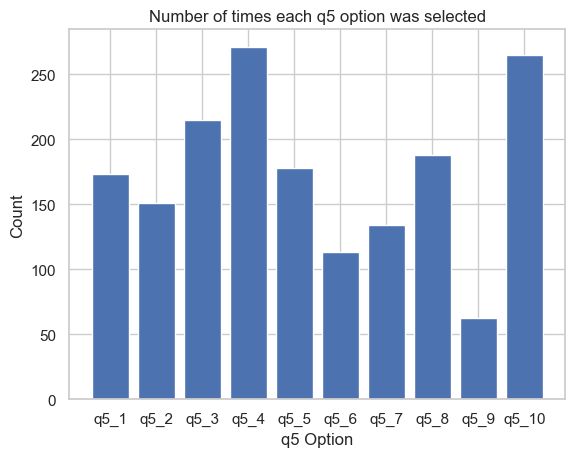

In [32]:
#Creating a Bar Chart to display Class Counts for our response variable q5
#Creating Figure
fig, ax = plt.subplots()
#Obtaining list of all q5 options
Options = list(y_train)
#Plotting Bar Chart (List of Options in x-axis and count on y-axis)
ax.bar(Options, Counts)
#Y-Axis Label
ax.set_ylabel('Count')
#X-Asis Label
ax.set_xlabel('q5 Option')
#Title Label
ax.set_title('Number of times each q5 option was selected')
plt.show()

We will now proceed by applying SMOTE-N (Synthetic Minority Over-Sampling Technique for Nominal Variables) since our data is clearly imbalanced. SMOTE-N was first proposed in [10] as an alternative to SMOTE (Synthetic Minority Over-Sampling). In general, SMOTE makes use of the K-nearest neighbour to create synthtic data.

In [33]:
#Applying SMOTE-N
sm = SMOTEN(random_state = 42)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train.to_numpy(), y_train.to_numpy())
X_train_FSS_oversampled, y_train_FSS_oversampled = sm.fit_resample(X_train_FSS.to_numpy(), y_train.to_numpy())

X_train_SMOTEN = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
y_train_SMOTEN = pd.DataFrame(y_train_oversampled, columns=y_train.columns)

X_train_FSS_SMOTEN = pd.DataFrame(X_train_FSS_oversampled, columns=X_train_FSS.columns)
y_train_FSS_SMOTEN = pd.DataFrame(y_train_FSS_oversampled, columns=y_train.columns)

In [34]:
#Creating for loop to calculate Number of times each q5 option was selected (After Applying SMOTEN)
counts_SMOTEN = []
for i in y_train_SMOTEN:
    Training_Response = y_train_SMOTEN[y_train_SMOTEN[i]==1]
    No_ofOnes = Training_Response[i].value_counts().to_numpy()
    counts_SMOTEN.extend(No_ofOnes)

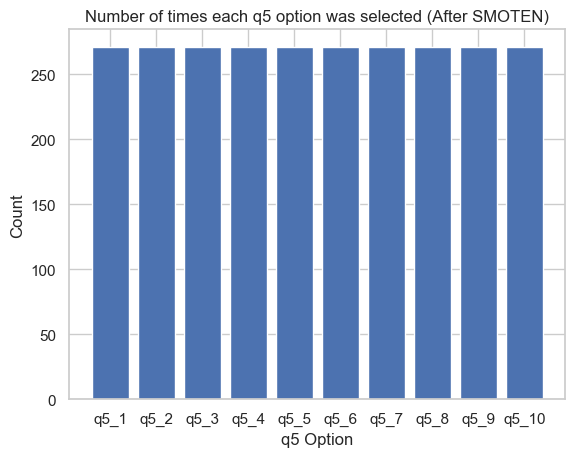

In [35]:
#Creating a Bar Chart to display Class Counts for our response variable q5 (After Applying SMOTEN)
#Creating Figure
fig, ax = plt.subplots()
#Obtaining list of all q5 options
Options_SMOTEN = list(y_train_SMOTEN)
#Plotting Bar Chart (List of Options in x-axis and count on y-axis)
ax.bar(Options_SMOTEN, counts_SMOTEN)
#Y-Axis Label
ax.set_ylabel('Count')
#X-Asis Label
ax.set_xlabel('q5 Option')
#Title Label
ax.set_title('Number of times each q5 option was selected (After SMOTEN)')
plt.show()

### Model Implementation (Decision Tree)

We shall now proceed by applying a Decision Tree algorithm to our Dataset. This algorithm will be described in more detail in Task 3 Part 1.3.

To ensure that the best possible final model is implemented, the Decision Tree algorithm will be repeated four times with varying degrees of Pre-Processing applied to the dataset. The models are distinguished as follows:
1. Model 1 - Dataset is adjusted for Missing values but Feature Selection and SMOTE-N are **not** applied (No Feature Selection & No SMOTEN).
2. Model 2 -  Dataset has undergone Missing values adjustments and Feature Selection application **but** SMOTE-N was **not** applied (Feature Selection & No SMOTEN)
3. Model 3 - Dataset has undergone Missing Values ajustments and SMOTE-N application **but** Feature Selection method was **not** applied (No Feature Selection & SMOTEN)
4. Model 4 - Dataset has been adjusted for Missing values and both Feature_Selection & SMOTE-N methods **have been** applied (Feature_Selection & SMOTEN)

In [36]:
#Defining the Grid of Hyperparameters which will be used to optmise Decision Tree Model
DT_Max_Depth = [int(x) for x in np.linspace(1,30,10)]
DT_Criterion = ["gini","entropy"]
DT_Splitter = ["best","random"]
#DT_Features = ["auto", "sqrt", "log2", "None"]

DT_Grid = {'max_depth': DT_Max_Depth,'criterion': DT_Criterion,'splitter': DT_Splitter}

In [37]:
Initial_DT = DecisionTreeClassifier(random_state=23)
#Grid Search Hyperparameter Tuning
DT_RandomSearch = GridSearchCV(estimator = Initial_DT,
                                               param_grid = DT_Grid,
                                               verbose=2,
                                               cv = 5
                                      ) 

### Model 1 (No Feature Selection/No SMOTEN)

In [38]:
DT_RandomSearch.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=4, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=4, 

[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ....criterion=entro

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 4, 7, 10, 13, 17, 20, 23, 26, 30],
                         'splitter': ['best', 'random']},
             verbose=2)

In [39]:
#Best Decision Tree Parameters
DT_RandomSearch.best_params_

{'criterion': 'gini', 'max_depth': 23, 'splitter': 'best'}

In [40]:
#Fitting Decision Tree
DTFinal = DecisionTreeClassifier(criterion = "gini", splitter = 'best', max_depth = 23)

In [41]:
DTFinal.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=23)

In [42]:
#Predict using X_test
y_test_pred = DTFinal.predict(X_test)

### Model 2 (Feature Selection/No SMOTEN)

In [43]:
DT_RandomSearch.fit(X_train_FSS, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=4, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=4, 

[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=7, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=7, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=7, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=7, splitter=best; total time=   0.0s
[CV] END ......criterion=ent

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 4, 7, 10, 13, 17, 20, 23, 26, 30],
                         'splitter': ['best', 'random']},
             verbose=2)

In [44]:
#Best Decision Tree Parameters
DT_RandomSearch.best_params_

{'criterion': 'gini', 'max_depth': 26, 'splitter': 'random'}

In [45]:
#Fitting Decision Tree
DTFinal = DecisionTreeClassifier(criterion = "gini", splitter = 'random', max_depth = 26)

In [46]:
DTFinal.fit(X_train_FSS, y_train)

DecisionTreeClassifier(max_depth=26, splitter='random')

In [47]:
#Predict using X_test_FSS
y_test_FSS_pred = DTFinal.predict(X_test_FSS)

### Model 3 (No Feature Selection/SMOTEN)

In [48]:
DT_RandomSearch.fit(X_train_SMOTEN, y_train_SMOTEN)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=4, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=4, 

[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ....criterion=entro

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 4, 7, 10, 13, 17, 20, 23, 26, 30],
                         'splitter': ['best', 'random']},
             verbose=2)

In [49]:
#Best Decision Tree Parameters
DT_RandomSearch.best_params_

{'criterion': 'entropy', 'max_depth': 20, 'splitter': 'best'}

In [50]:
#Fitting Decision Tree
DTFinal = DecisionTreeClassifier(criterion = "entropy", splitter = 'best', max_depth = 20)

In [51]:
DTFinal.fit(X_train_SMOTEN, y_train_SMOTEN)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [52]:
#Predict using X_test
y_test_SMOTEN_pred = DTFinal.predict(X_test)

### Model 4 (Feature Selection/SMOTEN)

In [53]:
DT_RandomSearch.fit(X_train_FSS_SMOTEN, y_train_FSS_SMOTEN)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=4, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=4, 

[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=1, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=1, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=ent

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 4, 7, 10, 13, 17, 20, 23, 26, 30],
                         'splitter': ['best', 'random']},
             verbose=2)

In [54]:
#Best Decision Tree Parameters
DT_RandomSearch.best_params_

{'criterion': 'entropy', 'max_depth': 23, 'splitter': 'random'}

In [55]:
#Fitting Decision Tree
DTFinal = DecisionTreeClassifier(criterion = "entropy", splitter = 'random', max_depth = 23)

In [56]:
DTFinal.fit(X_train_FSS_SMOTEN, y_train_FSS_SMOTEN)

DecisionTreeClassifier(criterion='entropy', max_depth=23, splitter='random')

In [57]:
#Predict using X_test
y_test_FSS_SMOTEN_pred = DTFinal.predict(X_test_FSS)

### Task 3 Part 1.2: Evaluate the implemented model using the metrics you proposed in Task 2.

In Task 3 Part 1.1 we have implimented a number of Decision tree model for a total of 4 models:
1. No Feature Selection & No SMOTEN
2. Feature Selection & No SMOTEN
3. No Feature Selection & SMOTEN
4. Feature_Selection & SMOTEN

In Task 2 Part 1 we have discussed that if a model is being built to predict q5, then Macro-Average F1-Score, Precision and Recall can be used as performance measures. We will proceed by displaying these results.

In [58]:
Metric_Columns = ["Model Name", "Precision", "Recall", "F1-Score"]

Metric_Data = [["Model 1 (No Feature Selection/No SMOTEN)", precision_score(y_test, y_test_pred, average = 'macro'),recall_score(y_test, y_test_pred, average = 'macro'),f1_score(y_test, y_test_pred, average='macro')], 
        ["Model 2 (No Feature Selection/No SMOTEN)",precision_score(y_test, y_test_FSS_pred, average = 'macro'), recall_score(y_test, y_test_FSS_pred, average = 'macro'), f1_score(y_test, y_test_FSS_pred, average='macro')], 
        ["Model 3 (No Feature Selection/ SMOTEN)", precision_score(y_test, y_test_SMOTEN_pred, average = 'macro'), recall_score(y_test, y_test_SMOTEN_pred, average = 'macro'), f1_score(y_test, y_test_SMOTEN_pred, average='macro')], 
        ["Model 4 (Feature Selection/SMOTEN)", precision_score(y_test, y_test_FSS_SMOTEN_pred, average = 'macro'), recall_score(y_test, y_test_FSS_SMOTEN_pred, average = 'macro'), f1_score(y_test, y_test_FSS_SMOTEN_pred, average='macro')]]

print(tabulate(Metric_Data, headers=Metric_Columns, tablefmt="fancy_grid"))

╒══════════════════════════════════════════╤═════════════╤══════════╤════════════╕
│ Model Name                               │   Precision │   Recall │   F1-Score │
╞══════════════════════════════════════════╪═════════════╪══════════╪════════════╡
│ Model 1 (No Feature Selection/No SMOTEN) │    0.142882 │ 0.143163 │   0.14179  │
├──────────────────────────────────────────┼─────────────┼──────────┼────────────┤
│ Model 2 (No Feature Selection/No SMOTEN) │    0.113452 │ 0.11192  │   0.112118 │
├──────────────────────────────────────────┼─────────────┼──────────┼────────────┤
│ Model 3 (No Feature Selection/ SMOTEN)   │    0.130158 │ 0.132901 │   0.12954  │
├──────────────────────────────────────────┼─────────────┼──────────┼────────────┤
│ Model 4 (Feature Selection/SMOTEN)       │    0.126359 │ 0.123871 │   0.123427 │
╘══════════════════════════════════════════╧═════════════╧══════════╧════════════╛


All models produce comparable results which is particularly impressive when considering model appications with feature selection since only a subset of the 72 features are included in the model. 

However Model 1 provides the best  Precison, Recall and Macro-Average F1-Score.

**Hence, going forward any questions relating to this algorithm will only consider Model 1.**

### Task 3 Part 1.3: How would you interpret the trained model (if possible) and the obtained results?

A decision tree is a conceptually simple model with interpretable results. As a result, the best way to interpret our trained model (Model 1) is to visualise the tree created.

In [59]:
#Loading the Required DTModel 

#Fitting Decision Tree
DTFinal = DecisionTreeClassifier(criterion = "gini", splitter = 'best', max_depth = 23)
DTFinal.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=23)

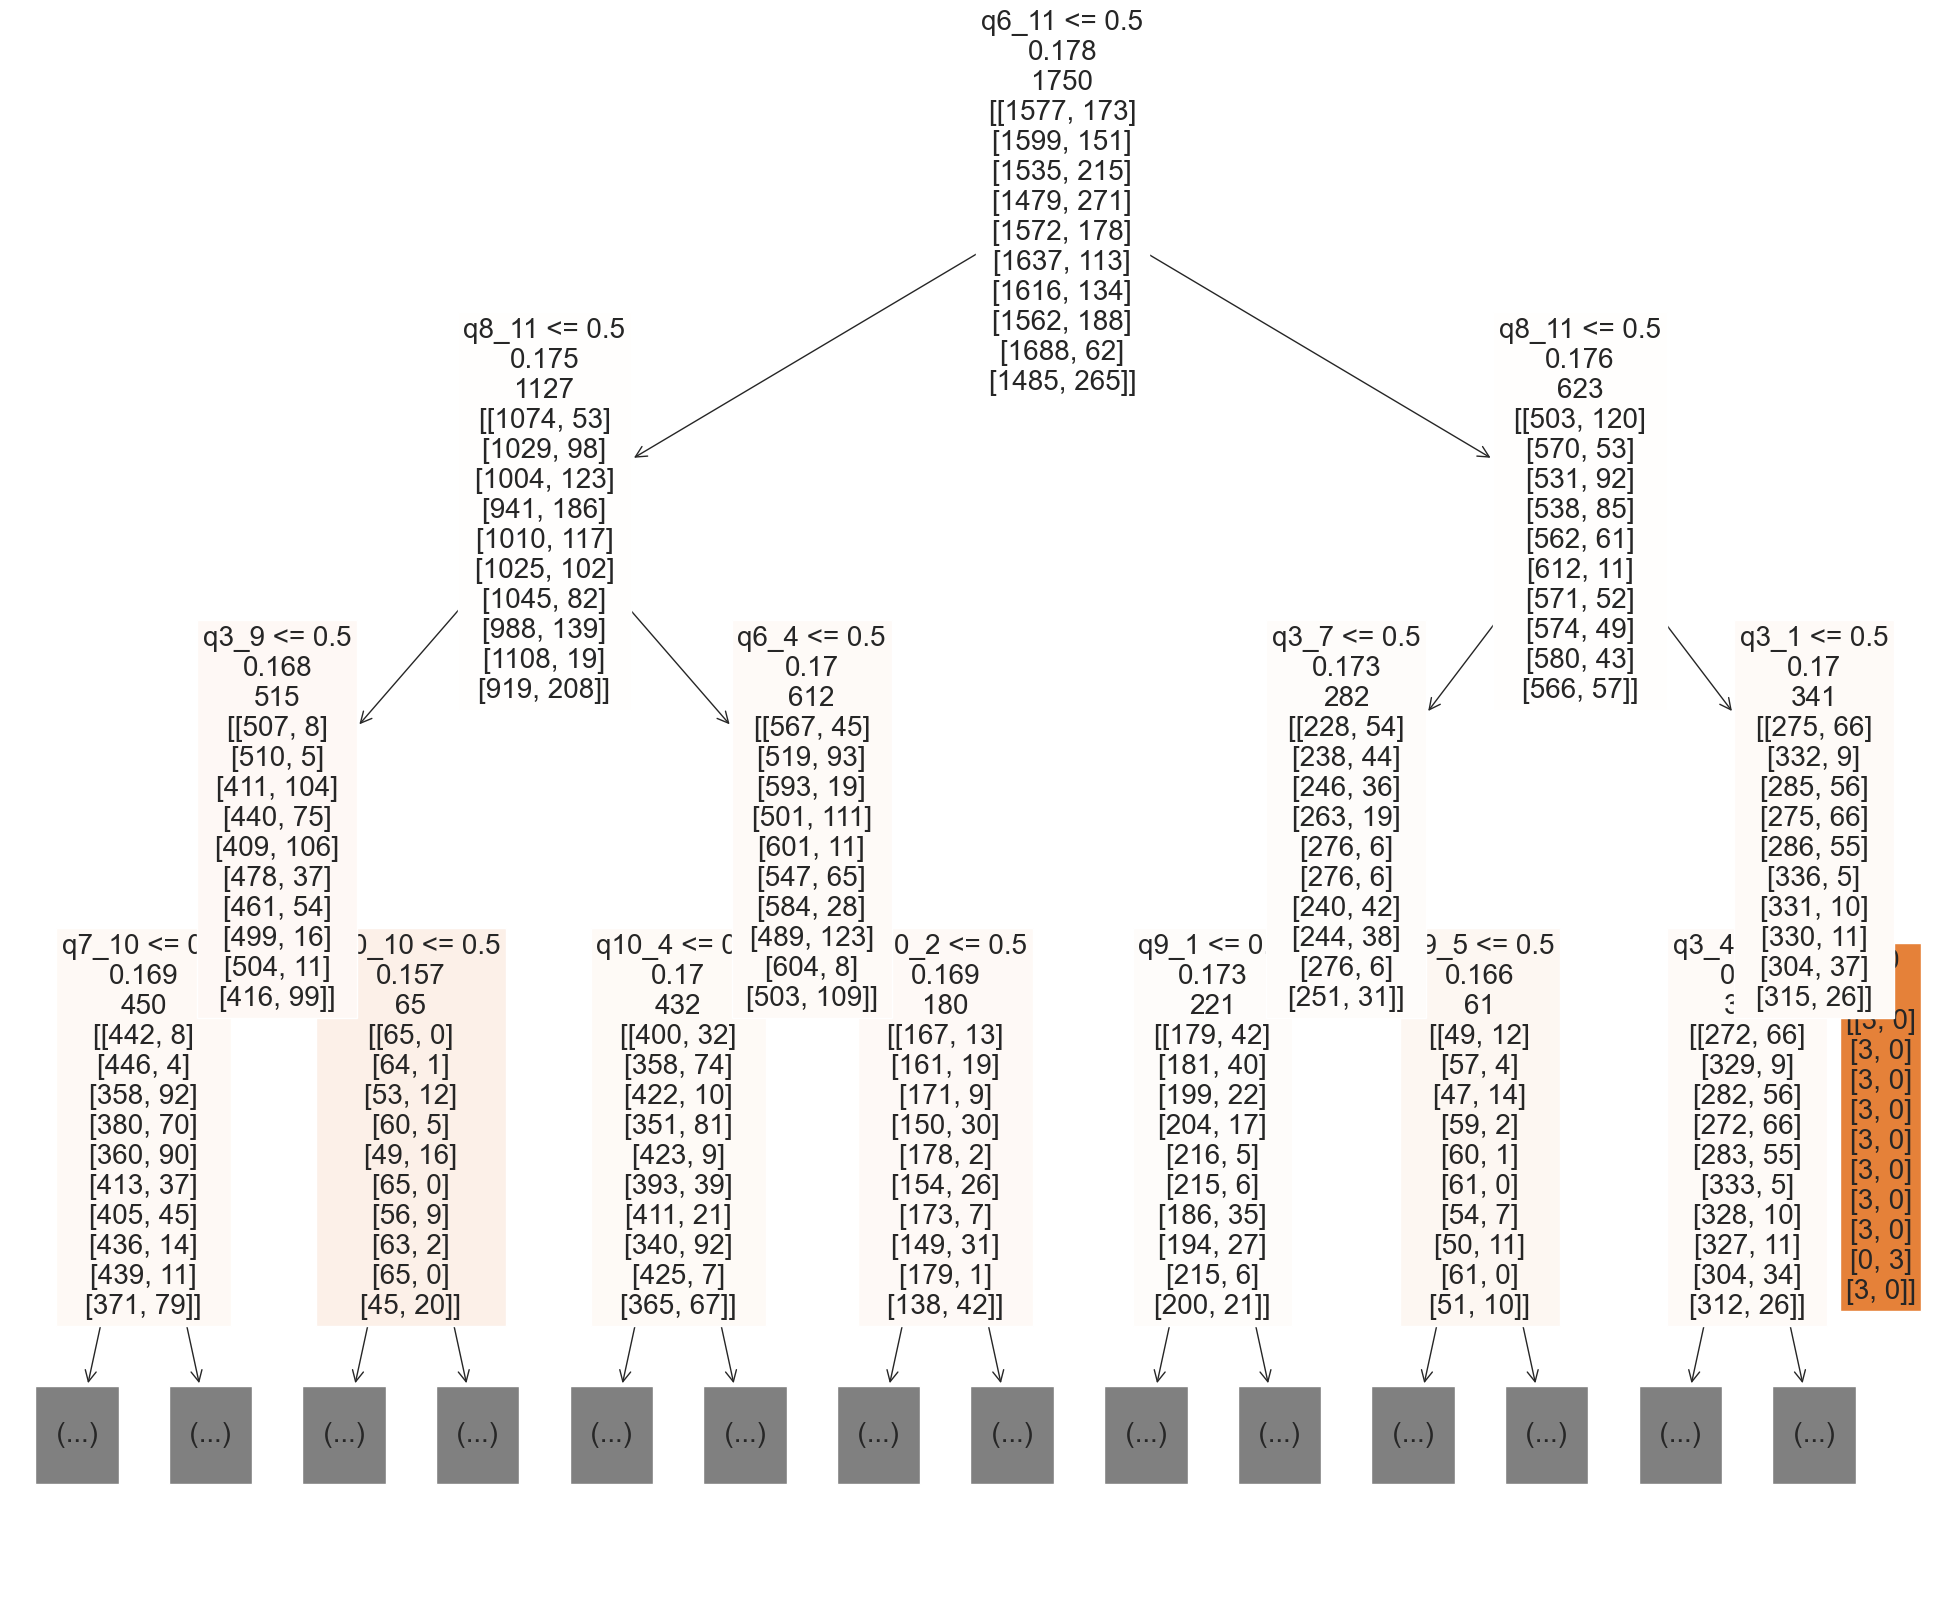

In [60]:
#Create Figure with a specified size
fig = plt.figure(figsize=(25,20))
#Plotting Decision Tree (Maximum depth is kept at 3 to be able to fit entire plot)
_ = tree.plot_tree(DTFinal, max_depth = 3, 
                   feature_names = list(X_train),  
                   class_names = list(y_train),
                   label = None, 
                   filled=True, fontsize=20)

A decision tree consists of a root, branches and leaves [11]. 

The root node is the uppermost node which consists of a "rule" which divides the complete dataset into two mutually exclusive subsets [11]. In our dataset,the root node splits our dataset based on whether on not a respondent has selected q6_11. Recall q6_11 has been artifically created to compensate for missing entries in Question 6 implying that if q6_11=1 then q1_1=0. Hence, the root node splits the dataset into two mutually exclusive subsets, with one subset consisting of individuals who have not seleted q1_1 and another subset consisting of indivudals who have selected q1_1.

The leaf nodes (not pictured in above diagram due to size limitations) represent the lowermost nodes highlighting the final categorical result [11]. In our data, that would indicate what option from Question 5 a respodent has selected.

In between the root node and each leaf node we have a number of internal nodes, which similarly to the root node, contain a rule which will further subdivide the data available at that point to the tree into mutually exclusive subgroups [11]. In the above diagram the maximum depth is kept to 3 internal nodes however the actual model may have a maximum depth of up to 23 interval nodes.

We shall now proceed by displaying the results obtained once the Decision tree model define in Part 1 is applied to the test set. These results will be displayed using a Bar Chart and Confusion Matrix.

In [61]:
#Creating Predicted Values (Numpy Array)
y_test_pred_des = DTFinal.predict(X_test)

In [62]:
#Creating Pandas Dataframe of predicted values
y_test_pred_des = pd.DataFrame(y_test_pred_des, columns= list(Dataset_Response))

In [63]:
#Creating for loop to calculate Number of times each q5 option was selected
Counts_Des = []
for i in y_test_pred_des:
    Training_Response_Des = y_test_pred_des[y_test_pred_des[i]==1]
    No_ofOnes_Des = Training_Response_Des[i].value_counts().to_numpy()
    Counts_Des.extend(No_ofOnes_Des)

The following Bar Chart displays the count of each option of Question 5 after the Decision Tree algorithm defined in Part 1 is applied to the test set.

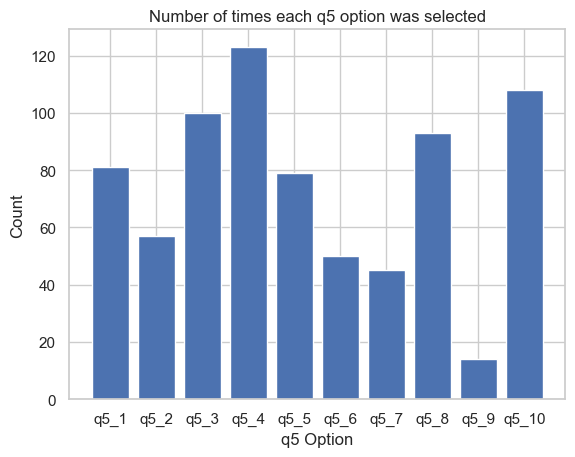

In [64]:
#Creating a Bar Chart to display Class Counts for our response variable q5
#Creating Figure
fig, ax = plt.subplots()
#Obtaining list of all q5 options
Options = list(y_train)
#Plotting Bar Chart (List of Options in x-axis and count on y-axis)
ax.bar(Options, Counts_Des)
#Y-Axis Label
ax.set_ylabel('Count')
#X-Asis Label
ax.set_xlabel('q5 Option')
#Title Label
ax.set_title('Number of times each q5 option was selected')
plt.show()

The Consuion Matrix below, summarizes the performance of the Decision tree model defined in Part 1 after it is applied to the test set. 
The above plot confirms the results obtained in Part 2 which have already highlighted that our model is fairly poor at predicting an individuals response to Question 5. 
From the plot it can be seen that for the most part our model was unsuccessful in predicting the correct Question 5 option selection.  

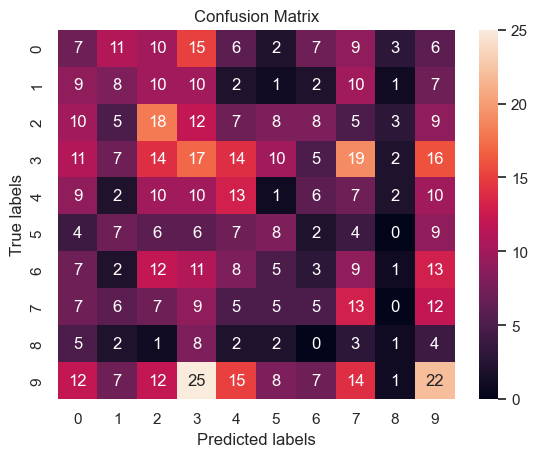

In [65]:
import seaborn as sns

ax= plt.subplot()

cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_test_pred_des).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

### Let's assume that the options of the fifth question (q5) are semantically ordered e.g. q5 ccorresponds to the question "How would you rate this restaraunt from 1-10?" with options q5_1=1, q5_2=2 and so on.

### Task 3 Part 2.1: Incorporate this new piece of information into your predictive model?

Due to the fact the the options of the fifth question are semantically ordered, then we know that the options have a natural ordered relationship between each other where q5_1<q5_2<...<q5_10.

Hence due to this ordinal relationship, we can assign an integer value to each q5 option such that q5_1=1<q5_2=2<...<q5_10=10 (Similar to LabelEncoder() in sklearn)

In Task 3 Part 1.1 we made use of a decision tree model to build our predcitive model. Inherintely, a decision tree model does not differentiate between nominal and ordinal data [11]. 

However, previously we were considering a total of 10 target variables each with only two levels (0 and 1) which induces sparsity and likely makes the model less than ideal. Hence, we should still see an improvement when making use of the above transformation [11].

We shall start of by assigning an integer value to each q5 option shuch that q5_1=1<q5_2=2<...<q5_10=10 :

In [66]:
#Replace '1' value in each option for y_train and y_test to the equivalent option number
# Ex. All 1's in q5_8 are replaced by the figure 8


#Process for y_train
y_train['q5_1'].replace(1, 1,inplace=True)
y_train['q5_2'].replace(1, 2,inplace=True)
y_train['q5_3'].replace(1, 3,inplace=True)
y_train['q5_4'].replace(1, 4,inplace=True)
y_train['q5_5'].replace(1, 5,inplace=True)
y_train['q5_6'].replace(1, 6,inplace=True)
y_train['q5_7'].replace(1, 7,inplace=True)
y_train['q5_8'].replace(1, 8,inplace=True)
y_train['q5_9'].replace(1, 9,inplace=True)
y_train['q5_10'].replace(1, 10,inplace=True)

#Process for y_test
y_test['q5_1'].replace(1, 1,inplace=True)
y_test['q5_2'].replace(1, 2,inplace=True)
y_test['q5_3'].replace(1, 3,inplace=True)
y_test['q5_4'].replace(1, 4,inplace=True)
y_test['q5_5'].replace(1, 5,inplace=True)
y_test['q5_6'].replace(1, 6,inplace=True)
y_test['q5_7'].replace(1, 7,inplace=True)
y_test['q5_8'].replace(1, 8,inplace=True)
y_test['q5_9'].replace(1, 9,inplace=True)
y_test['q5_10'].replace(1, 10,inplace=True)

In [67]:
# Sum all Rows into another column (This column will the new target variable)
# This has the same effect as making use of LabelEncoder() from sklearn
y_train_Data_Count = np.sum(y_train, axis=1)
y_test_Data_Count = np.sum(y_test, axis=1)

y_train['Order'] = y_train_Data_Count
y_test['Order'] = y_test_Data_Count

In [68]:
#Drop all remaining columns to obtain only Order Column
y_train = y_train.drop(['q5_1','q5_2','q5_3','q5_4','q5_5','q5_6','q5_7','q5_8','q5_9','q5_10'], axis=1)
y_test = y_test.drop(['q5_1','q5_2','q5_3','q5_4','q5_5','q5_6','q5_7','q5_8','q5_9','q5_10'], axis=1)

In [69]:
#Applying Decision Tree Model 
# From Task 3 (2) we will be applying Model 1 (No Feature Selection & No SMOTEN)
DT_RandomSearch.fit(X_train, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=1, splitter=best; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .......criterion=gini, max_depth=1, splitter=random; total time=   0.0s
[CV] END .........criterion=gini, max_depth=4, splitter=best; total time=   0.0s
[CV] END .........criterion=gini, max_depth=4, 

[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=4, splitter=best; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ....criterion=entropy, max_depth=4, splitter=random; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=7, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=7, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=7, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=7, splitter=best; total time=   0.0s
[CV] END ......criterion=entropy, max_depth=7, splitter=best; total time=   0.0s
[CV] END ....criterion=entro

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=23),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 4, 7, 10, 13, 17, 20, 23, 26, 30],
                         'splitter': ['best', 'random']},
             verbose=2)

In [70]:
#Best Decision Tree Parameters
DT_RandomSearch.best_params_

{'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}

In [71]:
#Fitting Decision Tree
DTFinal = DecisionTreeClassifier(criterion = "entropy", splitter = 'best', max_depth = 4)

In [72]:
DTFinal.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [73]:
#Predict using X_test
y_test_pred = DTFinal.predict(X_test)

### Task 3 Part 2.2: Select appropriate metrics to evaluate the performance of the model in this scenario?

We shall proceed by making use of Spearmen Correlation Coefficient to evaluate the performance of the model in this scenario since this metric allows us to assess the monotinic relationship between two variables.

The Spearman Correlation coefficient takes values between -1 and 1 in such a way that a value close to 1 indicates a strong positive monotonic relationship whilst a value close to -1 indicates a strong negative monotonic relationship [12]. A value of zero indicates there is no or a very weak monotonic relationship. The Spearman Correlation coefficient is calculated using the following expression: $1 - \frac{6\sum d_{i}^{2}}{n(n^{2}-1)}$ where $n$ is the number of observations and $d_{i}$ is the difference between the order value of each observation [12].

In addition the Kendall Rank correlation coefficent can also be used to evaluate the performance of the model in this scenario since this metric allows us to measure the strength and direction of the rank-based relationship between the two variables [12]. 

The Kendall Rank Correlation coefficient takes values between -1 and +1 in such a way that a value close to 1 indicates a strong positive rank correlation whilst a value close to -1 indicates a strong negative rank correlation [12]. A value of zero indicates there is no or a very weak rank correlation. The Kendall rank correlation coefficient is calculated using the following expression: $\frac{C-D}{C+D}$ where $C$ is the number of concordant pairs and $D$ is the number of discordant pairs [12].

In [74]:
#Calculating Spearmen Correlation Coefficient 
Spearman_Result = ss.spearmanr(y_test_pred, y_test)
#Calculating Kendall Rank Correlation Coefficient
KendallTau_Result = ss.kendalltau(y_test_pred, y_test)

In [75]:
Metric_Order_Columns = ["Metric","Coefficient","P-Value (Significent when <0.05)"]

Metric_Order_Data = [["Spearmen Correlation Coefficient",Spearman_Result.correlation, Spearman_Result.pvalue], 
["Kendall Rank Correlation Coefficient", KendallTau_Result.correlation,KendallTau_Result.pvalue]]

print(tabulate(Metric_Order_Data, headers=Metric_Order_Columns, tablefmt="fancy_grid"))

╒══════════════════════════════════════╤═══════════════╤════════════════════════════════════╕
│ Metric                               │   Coefficient │   P-Value (Significent when <0.05) │
╞══════════════════════════════════════╪═══════════════╪════════════════════════════════════╡
│ Spearmen Correlation Coefficient     │      0.137548 │                        0.000157707 │
├──────────────────────────────────────┼───────────────┼────────────────────────────────────┤
│ Kendall Rank Correlation Coefficient │      0.109681 │                        7.66774e-05 │
╘══════════════════════════════════════╧═══════════════╧════════════════════════════════════╛


Hence from results we can see that while both coefficients are significant, a very weak monotonic relationship/rank correlation is exhibited.

## Task 4

### In this task, you should identify similar responds. Specifically, you should do the following:

### Task 4 Part 1: Create groups of "like-minded"/similar respondents by proposing and implementing one or more suitable algorithms

The Cluster algorithms which can be applied to the above mentioned dataset need to allow dissimilarity measures such as Jaccard's distance ($J(A,B) = \frac{| A \cap B |}{|A \cup B |}$) [12] and Hamming Distance. 

The two selected algorithms are:
1. K-Medoids - Attempts to partition a dataset into K clusters. A point referred to as a medoid is used as a reference point of each cluster in such a way that dissimilarity between this point and other points in the cluster is minimised [9]. The K-Medoids algorithm proceeds as follows [9]:
    1. k data Points (K Medoids) are randomly selected.
    2. Remaining data points are assigned to the closest data point based on some distance metric (Such as Jaccard's distance or Hamming Distance)
    3. Algorithm iteratively updates the medoids and data points are re-assigned in such a way to minimise total dissimlairty and distance within each cluster.
    4. Process is stopped once descrease in total dissimilrity does not exceed a specific treshold.
2. Agglomerative Clustering - Attempts to group data points into clusters based on the pairwise dissimilarities among the objects in different groups. The Agglomerative algorithm proceeds as follows [9]:
    1. Every object is considered as a single cluster.
    2. The two closest clusters are merged based on their proximity calculated using some distance metric.
    3. Process is repeated until a stopping criterion is satisfied.
    

Both of our clustering algorithms will make use of the Jaccard distance measure. In addition, proximity between clusters for all Agglomerative Clustering will be determined using the three types of linkage criterions:
1. Single - Distance between the closest pair of points from different clusters [9].
2. Complete - Distance between the furthest pair of points from different clusters [9].
3. Average -  Average distance between all pairs of points from different clusters [9].

### K-Medoids Application

In [76]:
#Loading Dataset to create groups of "like-minded"/similar respondents
Medoids_Dataset = pd.concat([Dataset_Explanatory, Dataset_Response], axis=1, join='inner')

In [77]:
#Creating Copy of Dataset which will be used to append the cluster labels
Medoids_Dataset_Copy = Medoids_Dataset.copy(deep=True)

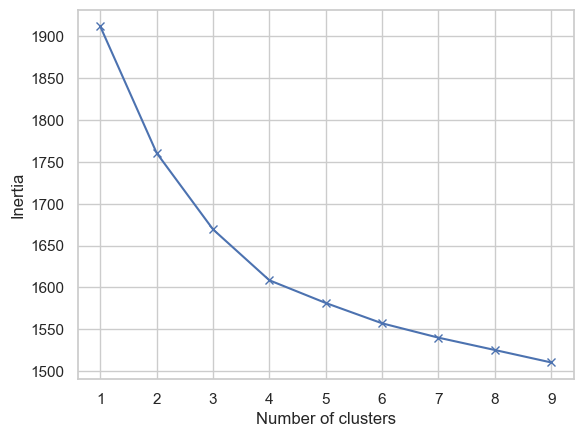

In [78]:
#Selecting The Number of Clusters 
Inertia = {} 

#for loop which calculates the 
#Sum of distances of samples to their closest cluster center
#for up to 10 clusters (jaccard distance measure is applied)
for i in range(1, 10):
    Metoids_Application = KMedoids(n_clusters=i, metric = 'jaccard',
                                   method = 'pam',  max_iter=1000,
                                   random_state=1).fit(Medoids_Dataset)
    Inertia[i] = Metoids_Application.inertia_

#Creating Figure
plt.figure()
#Plot Number fo Clusters against Inertia Value
plt.plot(list(Inertia.keys()), list(Inertia.values()), 'bx-')
#X-Asis label is Number of CLusters
plt.xlabel("Number of clusters")
#Y-Axis Labes is Inertia
plt.ylabel("Inertia")
#Show Plot
plt.show()

In [79]:
#Appling K-Medoids Algorithm to obtain 4 clusters
#(Since Significant drop in Inertia occured in above plot)
Metoids_Application = KMedoids(n_clusters=4, metric = 'jaccard', method = 'pam',
                               max_iter=1000, random_state=1).fit(Medoids_Dataset)

In [80]:
#Append Cluster Labels to copy of Dataset
Medoids_Dataset_Copy['kmedoLabels'] = Metoids_Application.predict(Medoids_Dataset)

In [81]:
#Checking Number of Respondents in each cluster 
Medoids_Dataset_Copy.kmedoLabels.value_counts() 
#544 Respondents in First Cluster
#847 Respondents in Second Cluster
#689 Respondents in Third Cluster
#420 Respondents in Third Cluster

2    847
1    689
0    544
3    420
Name: kmedoLabels, dtype: int64

### Agglomerative Clustering (Single linkage, Complete linkage & Average linkage)

In [82]:
#Loading Dataset to create groups of "like-minded"/similar respondents
Agglomerative_Dataset = pd.concat([Dataset_Explanatory, Dataset_Response], axis=1, join='inner')

In [83]:
#Applying Agglomerative Clustering using Single Linkage
Agglomerative_Single = AgglomerativeClustering(n_clusters = 4, affinity = 'jaccard', linkage = 'single').fit(Agglomerative_Dataset)
#Creating Copy of Dataset (Used Exclusily for Single Linkage)
Agglomerative_Dataset_Copy_Single = Agglomerative_Dataset.copy(deep=True)
#Append Cluster Labels to copy of Dataset
Agglomerative_Dataset_Copy_Single['kmedoLabels'] = Agglomerative_Single.fit_predict(Agglomerative_Dataset)

In [84]:
#Applying Agglomerative Clustering using Complete Linkage
Agglomerative_Complete = AgglomerativeClustering(n_clusters = 4, affinity = 'jaccard', linkage = 'complete').fit(Agglomerative_Dataset)
#Creating Copy of Dataset (Used Exclusily for Single Linkage)
Agglomerative_Dataset_Copy_Complete = Agglomerative_Dataset.copy(deep=True)
#Append Cluster Labels to copy of Dataset
Agglomerative_Dataset_Copy_Complete['kmedoLabels'] = Agglomerative_Complete.fit_predict(Agglomerative_Dataset)

In [85]:
#Applying Agglomerative Clustering using Average Linkage
Agglomerative_Average = AgglomerativeClustering(n_clusters = 4, affinity = 'jaccard', linkage = 'average').fit(Agglomerative_Dataset)
#Creating Copy of Dataset (Used Exclusily for Single Linkage)
Agglomerative_Dataset_Copy_Average = Agglomerative_Dataset.copy(deep=True)
#Append Cluster Labels to copy of Dataset
Agglomerative_Dataset_Copy_Average['kmedoLabels'] = Agglomerative_Average.fit_predict(Agglomerative_Dataset)

In [86]:
#Checking Number of Respondents in each cluster 
# Agglomerative Clustering with Sinle Linkage
Agglomerative_Dataset_Copy_Single.kmedoLabels.value_counts()
#2497 Respondents in First Cluster
#1 Respondent in Second Cluster
#1 Respondent in Third Cluster
#1 Respondent in Fourth Cluster

0    2497
3       1
2       1
1       1
Name: kmedoLabels, dtype: int64

In [87]:
#Checking Number of Respondents in each cluster 
# Agglomerative Clustering with Sinle Linkage
Agglomerative_Dataset_Copy_Complete.kmedoLabels.value_counts()
#901 Respondents in First Cluster
#830 Respondents in Second Cluster
#292 Respondents in Third Cluster
#477 Respondents in Fourth Cluster

0    901
1    830
3    477
2    292
Name: kmedoLabels, dtype: int64

In [88]:
#Checking Number of Respondents in each cluster 
# Agglomerative Clustering with Sinle Linkage
Agglomerative_Dataset_Copy_Average.kmedoLabels.value_counts()
#737 Respondents in First Cluster
#398 Respondents in Second Cluster
#1364 Respondents in Third Cluster
#1 Respondents in Fourth Cluster

2    1364
0     737
1     398
3       1
Name: kmedoLabels, dtype: int64

### Task 4 Part 2: How would you evaluate whether the clusters you created are good enough?

There are a number of evaluation methods which can be used to check whether the clusters created are good enough. The methods which will be used to evaluate our cluster is the following:
1. The Silhouette Coefficient - An evaluation metric used to quantify the quality of clustering by ensuring that within-cluster dissimilarity is low and between-cluster dissimilarity is large. The values of the Silhouette Coefficient range from -1 and 1. Higher value indicates better clustering results with a value of 1 indicating clusters are clearly distinguishable, a value of 0 indicating that distance between clusters in not significant and a value of -1 indicating that clusters might be assigned incorrectly [12]. The Silhouette value $s(i)$ for one data point (i) is calculated using the following expression: $\frac{b(i)-a(i)}{max(a(i),b(i))}$ where: a is the **intra-cluster distance** and b is the **inter-cluster distance** [12].
**NB:** Silhouette value is calculated for all data points and the following expression is then used to obtain the final Silhouette coefficient using the following expression $max_{\forall k}(\frac{1}{N_{k}}\sum_{i \in c_{k}}s_{i})$ which considers the cluster with the greatest Silhouette coefficient.


It should be noted that other evaluation metrics exist to check clustering results however they are not suitable to be used with the K-Medoid clustering algorithm since:
1. The Davies Bouldin Index - Requires a distance-based clustering algorithm such as Euclidean distance while the Jaccard distance utilised for K-Medoid custering makes use of a dissimilarity measure [12].
2. The Adjusted Rand Index - Requires the true clustring results which are not available for our dataset [12].
3. The Normalized Mutual Information - Required the true clustering results which are not available for our dataset [12]. 

### The Silhouette Coefficient 

In [89]:
Silhouette_Columns = ["Silhouette Coefficient Application","Result"]

Silhouette_Data = [["Silhouette Coefficient for K-Medoid Application", metrics.silhouette_score(Medoids_Dataset,Medoids_Dataset_Copy.kmedoLabels,metric = 'jaccard')], 
["Silhoutte Coefficient for Agglomerative Clustering using Single Linkage", metrics.silhouette_score(Agglomerative_Dataset,Agglomerative_Dataset_Copy_Single.kmedoLabels,metric = 'jaccard')], 
["Silhoutte Coefficient for Agglomerative Clustering using Complete Linkage",  metrics.silhouette_score(Agglomerative_Dataset,Agglomerative_Dataset_Copy_Complete.kmedoLabels,metric = 'jaccard')], 
["Silhoutte Coefficient for Agglomerative Clustering using Average Linkage", metrics.silhouette_score(Agglomerative_Dataset,Agglomerative_Dataset_Copy_Average.kmedoLabels,metric = 'jaccard')]]

print(tabulate(Silhouette_Data, headers=Silhouette_Columns, tablefmt="fancy_grid"))

╒═══════════════════════════════════════════════════════════════════════════╤═══════════╕
│ Silhouette Coefficient Application                                        │    Result │
╞═══════════════════════════════════════════════════════════════════════════╪═══════════╡
│ Silhouette Coefficient for K-Medoid Application                           │ 0.118078  │
├───────────────────────────────────────────────────────────────────────────┼───────────┤
│ Silhoutte Coefficient for Agglomerative Clustering using Single Linkage   │ 0.0254508 │
├───────────────────────────────────────────────────────────────────────────┼───────────┤
│ Silhoutte Coefficient for Agglomerative Clustering using Complete Linkage │ 0.104414  │
├───────────────────────────────────────────────────────────────────────────┼───────────┤
│ Silhoutte Coefficient for Agglomerative Clustering using Average Linkage  │ 0.11064   │
╘═══════════════════════════════════════════════════════════════════════════╧═══════════╛


### Task 4 Part 3: How would you compare different algorithms against each other to select one of them?

As described in Part 2, the Silhouette Coefficient was used to eavluate the quality of clustering for each of the four clustering methods applied in part 1. The results were as follows:

In [95]:
print("Silhouette Coefficient of K-Medoid Algorithm is {}".format(metrics.silhouette_score(Medoids_Dataset,Medoids_Dataset_Copy.kmedoLabels,metric = 'jaccard')))
print("Silhouette Coefficient of Agglomerative Clustering using Single Linkage is {}".format(metrics.silhouette_score(Agglomerative_Dataset,Agglomerative_Dataset_Copy_Single.kmedoLabels,metric = 'jaccard')))
print("Silhouette Coefficient of Agglomerative Clustering using Complete Linkage is {}".format(metrics.silhouette_score(Agglomerative_Dataset,Agglomerative_Dataset_Copy_Complete.kmedoLabels,metric = 'jaccard')))
print("Silhouette Coefficient of Agglomerative Clustering using Average Linkage is {}".format(metrics.silhouette_score(Agglomerative_Dataset,Agglomerative_Dataset_Copy_Average.kmedoLabels,metric = 'jaccard')))

Silhouette Coefficient of K-Medoid Algorithm is 0.11807810758566135
Silhouette Coefficient of Agglomerative Clustering using Single Linkage is 0.025450811399780622
Silhouette Coefficient of Agglomerative Clustering using Complete Linkage is 0.10441421480414906
Silhouette Coefficient of Agglomerative Clustering using Average Linkage is 0.11063964381964925


A higher Silhouette Coefficient value indicates a better clustering result, hence the best clustering algorithm is indicated by the highest Silhouette coefficient value.

In [99]:
print("The highest Silhouette Coefficient is {}".format(max(metrics.silhouette_score(Medoids_Dataset,Medoids_Dataset_Copy.kmedoLabels,metric = 'jaccard'), 
                                                            metrics.silhouette_score(Agglomerative_Dataset,Agglomerative_Dataset_Copy_Single.kmedoLabels,metric = 'jaccard'),
                                                            metrics.silhouette_score(Agglomerative_Dataset,Agglomerative_Dataset_Copy_Complete.kmedoLabels,metric = 'jaccard'),
                                                            metrics.silhouette_score(Agglomerative_Dataset,Agglomerative_Dataset_Copy_Average.kmedoLabels,metric = 'jaccard'))))

The highest Silhouette Coefficient is 0.11807810758566135


This is equivalent to the K-Medoid Algorithm.

### Task 4 Part 4: How would you describe the groups you identified?

In Part 3 we identified the K-Medoids algorithm implemented in Part 1 as the best overall clustering algorithm using the Silhoette Coefficient.

Our aim will now be to describe the 4 clusters/groups obtained in Part 1 with particular importance given to options in any of the survey questions which were significantly more likely to be selected by respondents belonging to a particular group.

To aid us in reaching our aim, we will proceed by considering one group at a time and plotting a bar chart featuring the number of times each option of a particular question was selected. We will then analyse each bar chart accordingly and provide a high-level overview of each group.

### Preliminary

Prior to describing the 4 clusters/groups obtained in Part 1 using Bar charts, it would be ideal to go over the following details:
1. Recall the structure of each question as done in Task 1 Part 3. 
2. The number (count) of respondents which selected a particular question when considering all respondents. This will allow us to understand whether the prevalence (or not) of a particular option in a cluster is merely caused by its popularity (or not) with all respondents.

A brief summary of the structure of each question is the following:

Question 1 - This is a single-selection question which all respondents were required to fill (No Missing data from Part 1.1 of Task 3). In our dataset this has been replaced by an added option in Question 6 (q6_11) since in Task 3 Part 1.1 it was identified that when q1_1 is selected then Question 6 must not be left blank. Hence when q6_11 is selected (=1) then this implies that q1_1=0. 

Question 2 - This is a single-selection question which all respondents were required to fill (No Missing data from Part 1.1 of Task 3). In our dataset this has been replaced by an added option in Question 8 (q8_11) since in Task 3 Part 1.1 it was identified that when q2_1 is selected then Question 8 must not be left blank. Hence when q8_11 is selected (=1) then this implies that q2_1=0.

Question 3 - This is a single-selection question which all respondents were required to fill (No missing data from Part 1.1 of Task 3).

Question 4 - This is a single-selection question which all respondents were required to fill (No missing data from Part 1.1 of Task 3).

Question 5 - This is a single-selection question which all respondents were required to fill (No missing data from Part 1.1 of Task 3).

Question 6 - This is a Multiple-Selection Question which individuals were also allowed to skip according to their response to q1_1

Question 7 - This is a Multiple-Selection Question similar to Question 6. However, individuals were not allowed to skip this question.

Question 8 - This is a Multiple-Selection Question which individuals were also allowed to skip according to their response to q2_1

Question 9 - This is a Multiple-Selection Question which individuals were not allowed to skip.

Question 10 - This is a Multiple-Selection Question which individuals were not allowed to skip.

To obtain a brief summary of the number of times each option of a particular question was selected (considering all respondents), we shall proceed by plotting a bar chart for each question (In a similar manner as will be done later to describe each cluster/group).

In [100]:
#Recall Medoids Dataset contains all Respondents 
Medoids_Dataset
#Split this Dataframe (Medoids_Dataset) into the different questions
Q3_Medoid = Medoids_Dataset.loc[:,'q3_1':'q3_10']
Q4_Medoid = Medoids_Dataset.loc[:,'q4_1':'q4_10']
Q5_Medoid = Medoids_Dataset.loc[:,'q5_1':'q5_10']
#For Question 6 recall that q6_11 is replacing q1_1 s.t. when q6_11=1 then q1_1=0
Q6_Medoid = Medoids_Dataset.loc[:,['q6_1','q6_2','q6_3','q6_4','q6_5','q6_6','q6_7','q6_8','q6_9','q6_10','q6_11']]
Q7_Medoid = Medoids_Dataset.loc[:,'q7_1':'q7_10']
#For Question 8 recall that q6_11 is replacing q2_1 s.t. when q8_11=1 then q2_1=0
Q8_Medoid = Medoids_Dataset.loc[:,['q8_1','q8_2','q8_3','q8_4','q8_5','q8_6','q8_7','q8_8','q8_9','q8_10','q8_11']]
Q9_Medoid = Medoids_Dataset.loc[:,'q9_1':'q9_10']
Q10_Medoid = Medoids_Dataset.loc[:,'q10_1':'q10_10']

In [101]:
#Creating a List of data which will be used to plot each Bar Chart
List = [Q3_Medoid, Q4_Medoid, Q5_Medoid, Q6_Medoid,
       Q7_Medoid, Q8_Medoid, Q9_Medoid, Q10_Medoid]

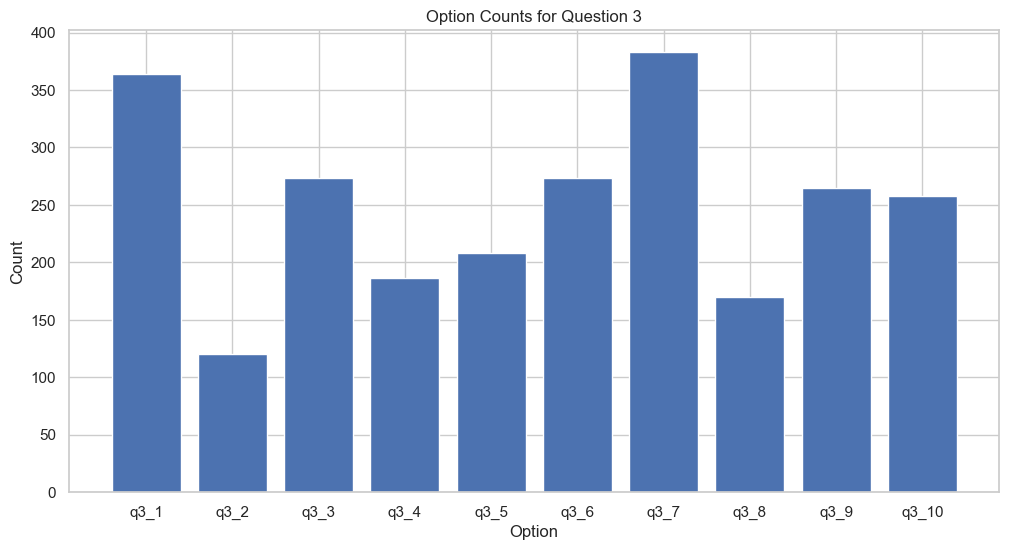

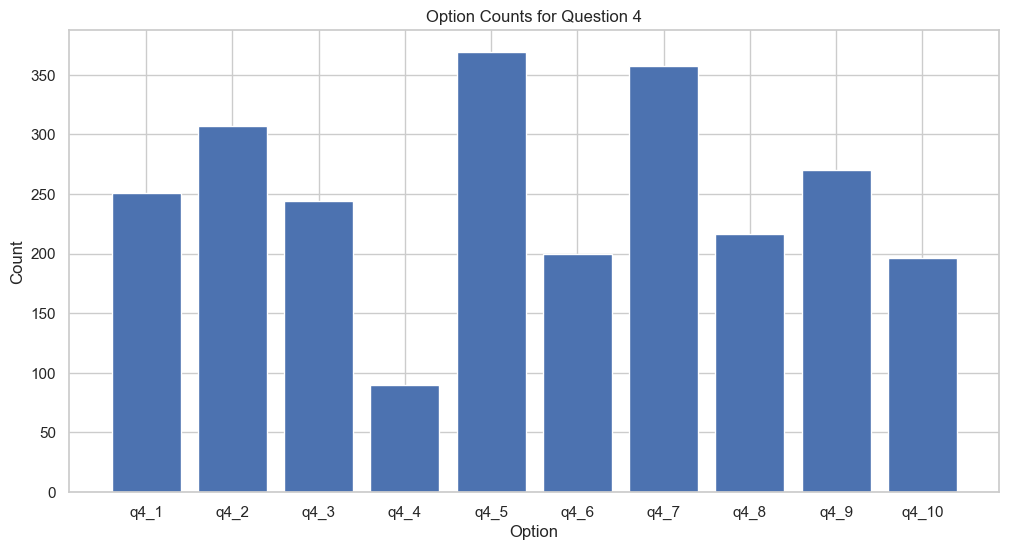

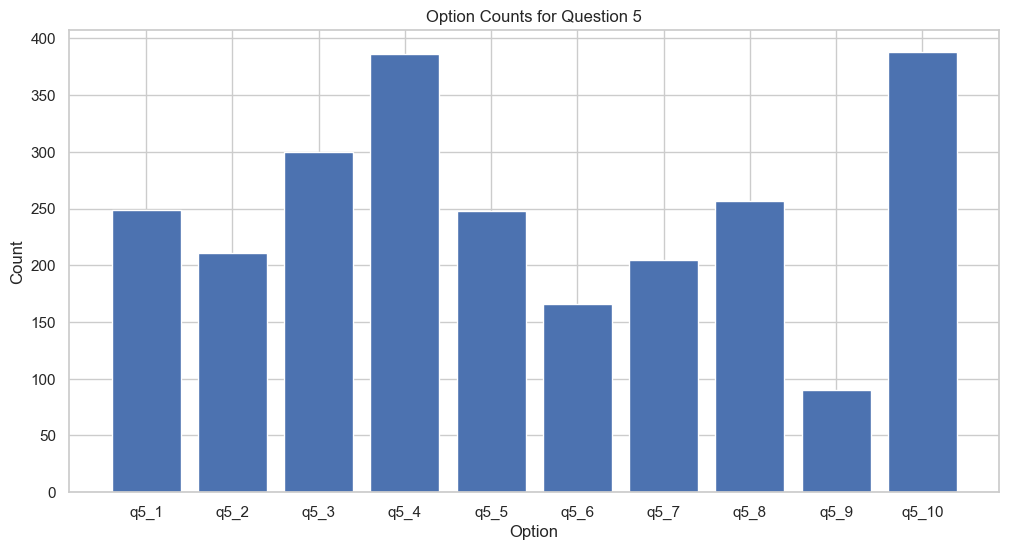

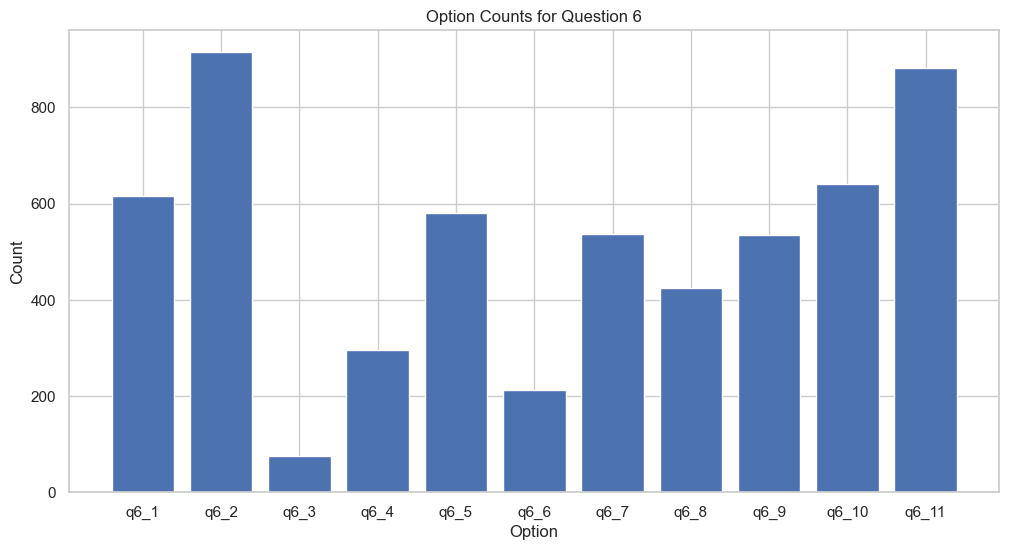

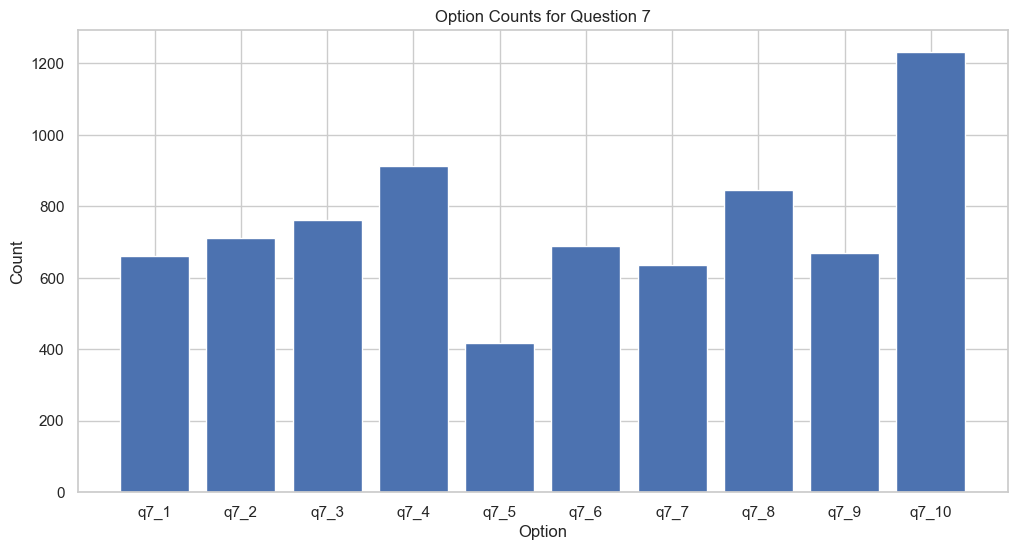

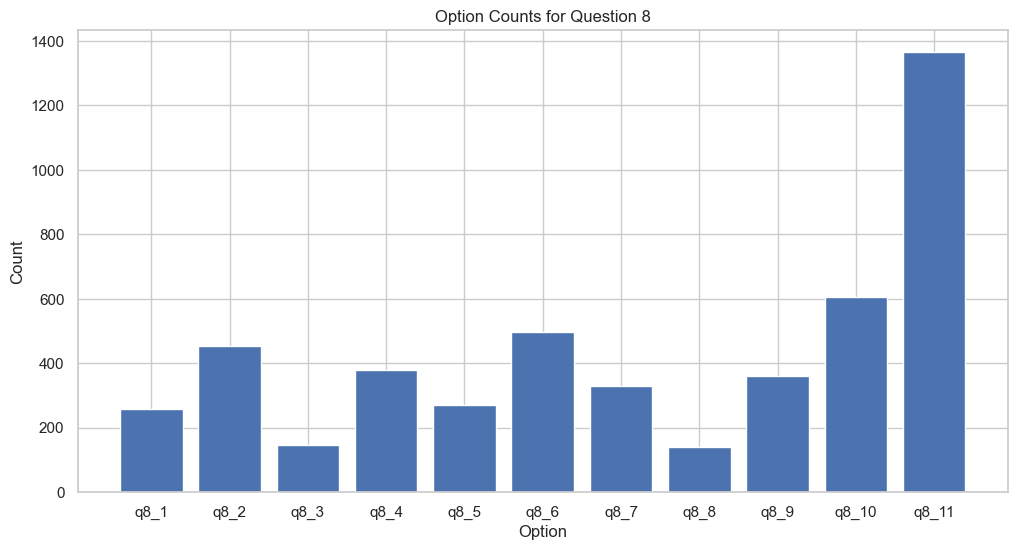

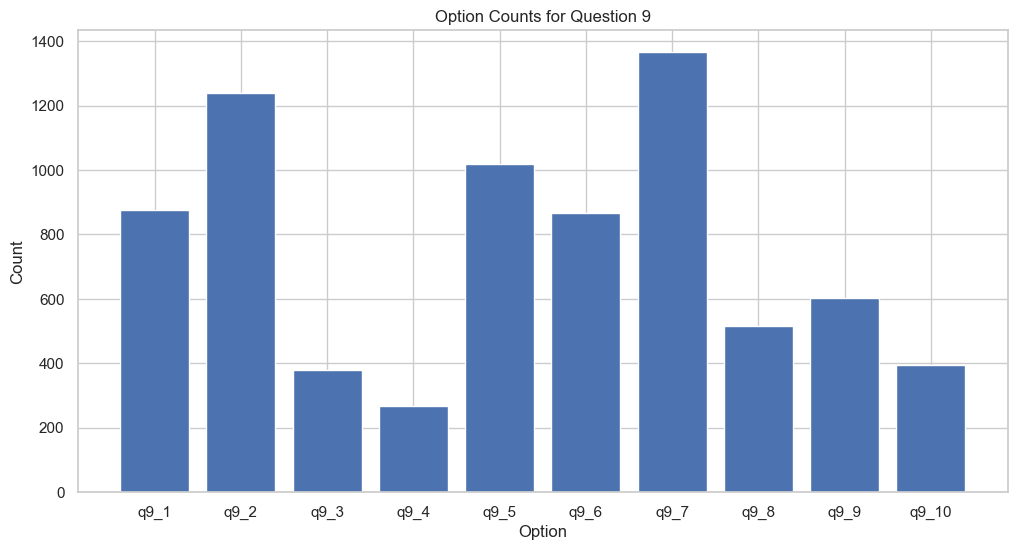

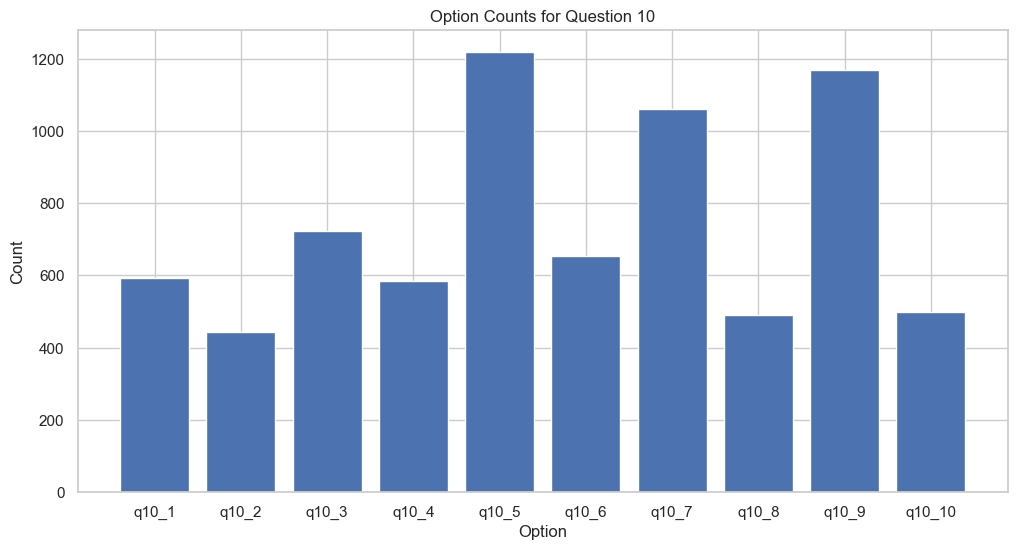

In [102]:
#Initiating A which will go over the list of Question Number Names
A=0
#Creating For loop (Each loop creates bar chart for 1 Question)
for M in List:
    #Obtaining No. of times an option in a question was selected 
    Count = np.count_nonzero(M, axis=0).tolist()
    #Obtaining name of Option in relation to Question
    XLabel = list(M)
    #Plot Size
    plt.figure(figsize=(12,6))
    #Bar Chart Plot 
    #Name of Option in x-axis and number of times option was selected in y-axis
    plt.bar(XLabel, Count)
    #List of Questions (To be used to used for title of Bar Chart)
    Question_Numbers = ["3", "4", "5", "6", "7", "8", "9", "10"]
    #Taking Ath value from Question_Numbers_0 list
    Question_Number = Question_Numbers[A]
    #Changing value of A s.t. in next for loop plot title will refer to next question
    A=A+1
    #Title of Bar Chart
    plt.title("Option Counts for Question " + str(Question_Number))
    #X-label name
    plt.xlabel('Option')
    #Y-Label name
    plt.ylabel('Count')
    #Show Plot
    plt.show()

From the above Bar Charts we can make the following deductions
1. Considering the Bar Chart entitled "Option Counts for Question 3" it is clear that q3_1 and q3_7 are the most selected options. On the other hand q3_2 is the least selectied option.


2. Considering the Bar Chart entitled "Option Counts for Question 4" it is clear that q4_5 and q4_7 are the most selected options. On the other hand q4_4 is the least selected option.


3. Considering the Bar Chart entitled "Option Counts for Question 5" it is clear that q5_4 and q5_10 are the most selected options. On the other hand q5_9 is the least selected option.


4. Considering the Bar Chart entitled "Option Counts for Question 6" it is clear that q6_2 and q6_11 are the most selected options. The latter option implies that a significant number of individuals skipped Question 6 entirely. On the other hand, individuals who filled in question 6 selected q6_3 the least.


5. Considering the Bar Chart entitled "Option Counts for Question 7" it is clear that q7_10 is the most selected option. 


6. Considering the Bar Chart entitled "Option Counts for Question 8" it is clear that q8_11 is the most selected option. This implies that a significant number of individuals skipped Question 8 entirely.


7. Considering the Bar Chart entitled "Option Counts for Question 9" it is clear that q9_2 and q9_7 were the most selected options. q9_4 was the least selected option. 


8. Considering the Bar Chart entitled "Option Counts for Question 10" it is clear that q10_5, q10_7 and q10_9 were the most selected options. 

### First Cluster/Group

In [103]:
#Creating a Data Frame Containing Only Respondents Belonging to the First Group
Medoids_Dataset_Copy_0 = Medoids_Dataset_Copy[Medoids_Dataset_Copy["kmedoLabels"]==0]

In [104]:
#Splitting the Dataframe obtained (Medoids_Dataset_Copy_0) into the different questions
#One Bar Plot will be obtained for each question.
Q3_Medoid_0 = Medoids_Dataset_Copy_0.loc[:,'q3_1':'q3_10']
Q4_Medoid_0 = Medoids_Dataset_Copy_0.loc[:,'q4_1':'q4_10']
Q5_Medoid_0 = Medoids_Dataset_Copy_0.loc[:,'q5_1':'q5_10']
#For Question 6 recall that q6_11 is replacing q1_1 s.t. when q6_11=1 then q1_1=0
Q6_Medoid_0 = Medoids_Dataset_Copy_0.loc[:,['q6_1','q6_2','q6_3','q6_4','q6_5','q6_6','q6_7','q6_8','q6_9','q6_10','q6_11']]
Q7_Medoid_0 = Medoids_Dataset_Copy_0.loc[:,'q7_1':'q7_10']
#For Question 8 recall that q6_11 is replacing q2_1 s.t. when q8_11=1 then q2_1=0
Q8_Medoid_0 = Medoids_Dataset_Copy_0.loc[:,['q8_1','q8_2','q8_3','q8_4','q8_5','q8_6','q8_7','q8_8','q8_9','q8_10','q8_11']]
Q9_Medoid_0 = Medoids_Dataset_Copy_0.loc[:,'q9_1':'q9_10']
Q10_Medoid_0 = Medoids_Dataset_Copy_0.loc[:,'q10_1':'q10_10']

In [105]:
#Creating a List of data which will be used to plot each Bar Chart
List_0 = [Q3_Medoid_0, Q4_Medoid_0, Q5_Medoid_0, Q6_Medoid_0,
       Q7_Medoid_0, Q8_Medoid_0, Q9_Medoid_0, Q10_Medoid_0]

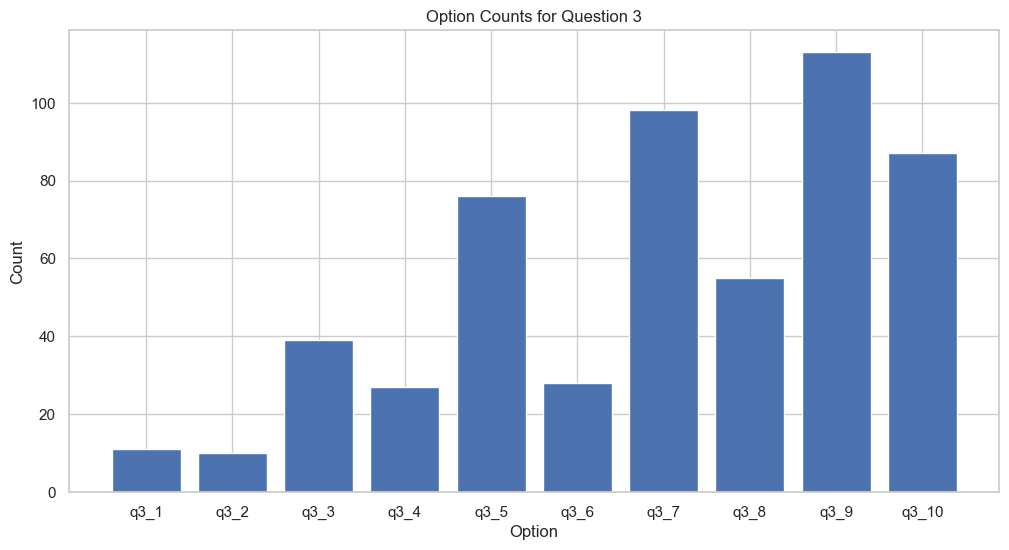

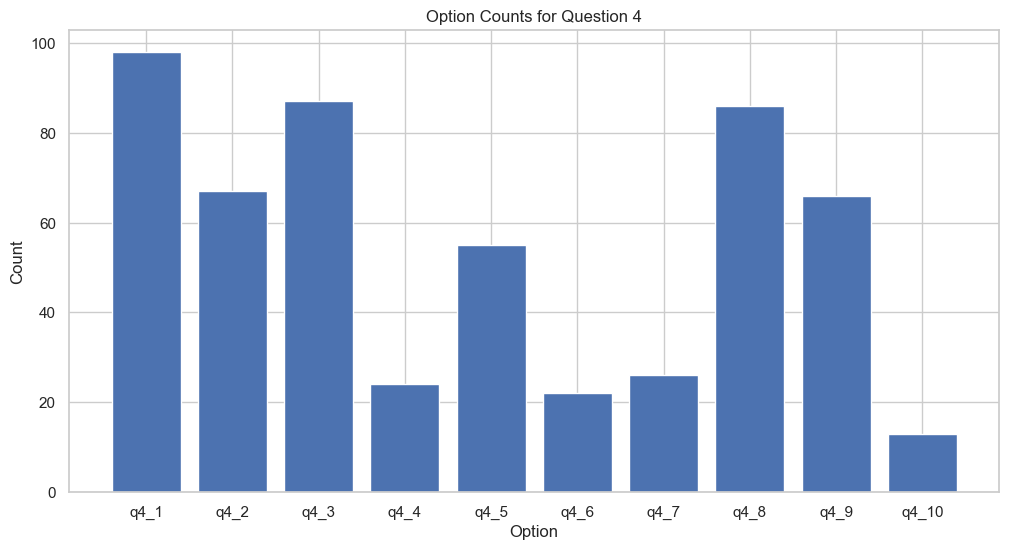

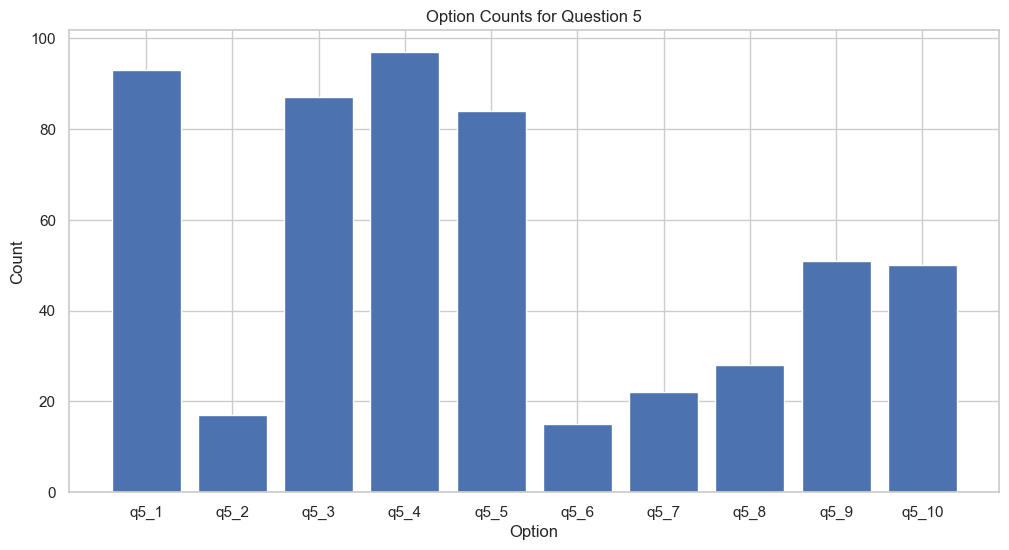

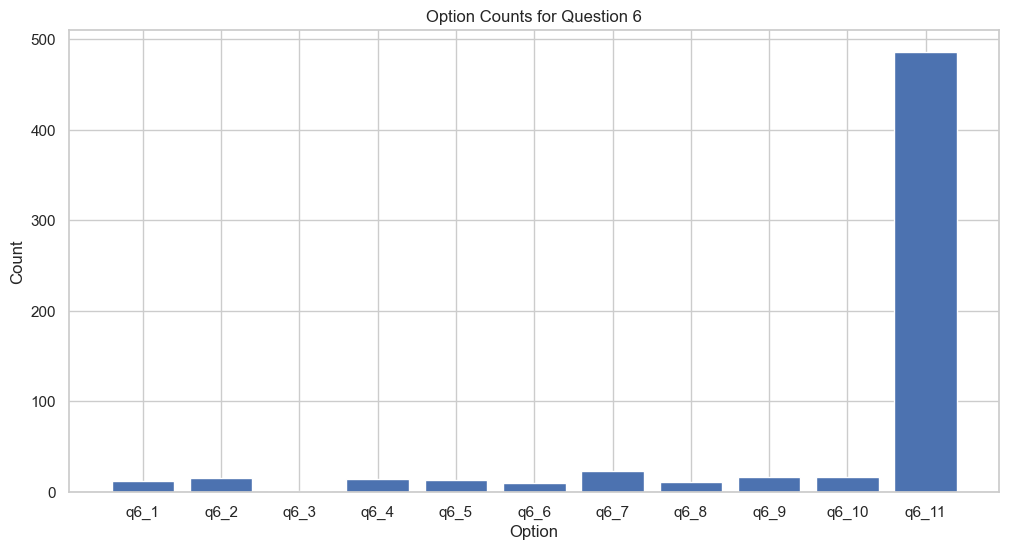

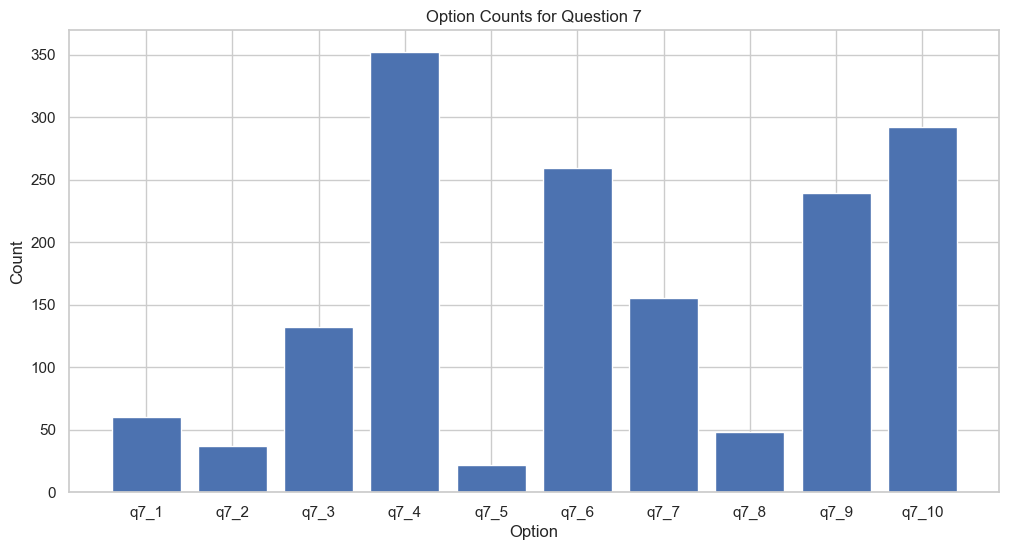

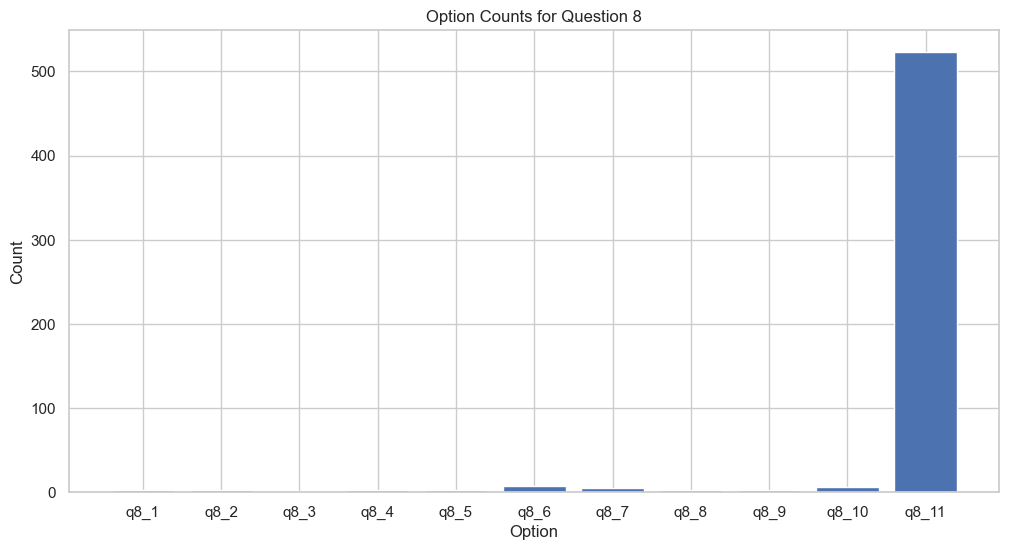

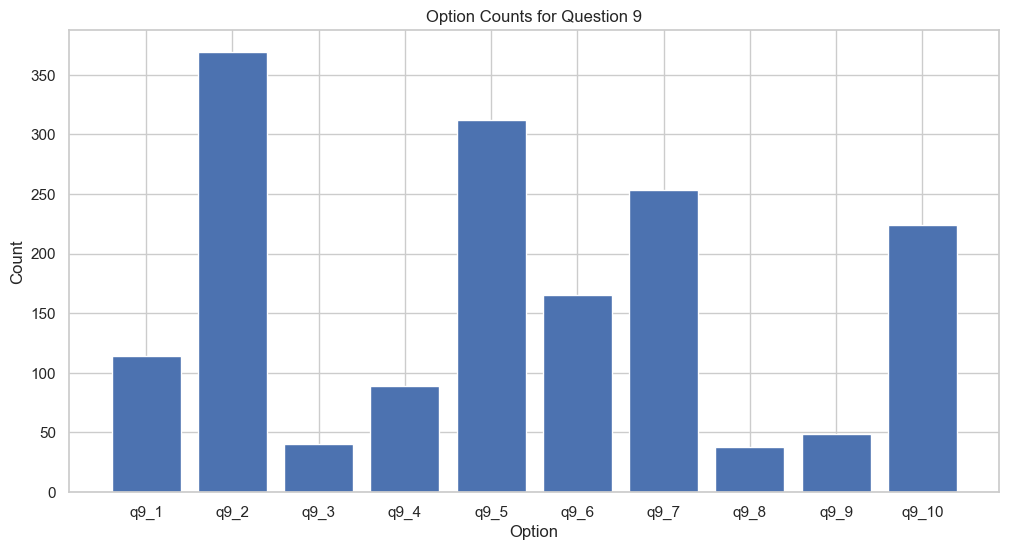

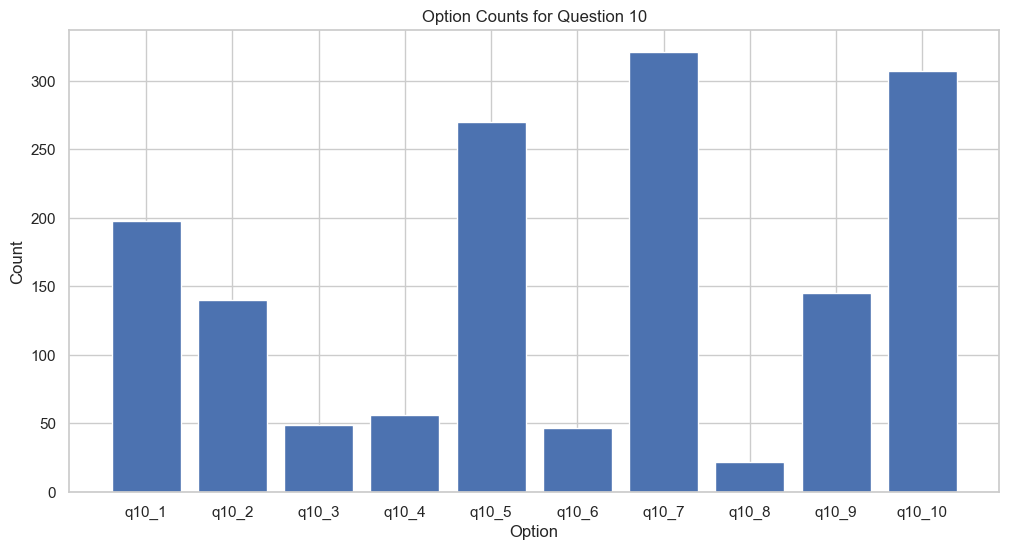

In [106]:
#Initiating A which will go over the list of Question Number Names
A=0
#Creating For loop (Each loop creates bar chart for 1 Question)
for M in List_0:
    #Obtaining No. of times an option in a question was selected 
    Count_0 = np.count_nonzero(M, axis=0).tolist()
    #Obtaining name of Option in relation to Question
    XLabel_0 = list(M)
    #Plot Size
    plt.figure(figsize=(12,6))
    #Bar Chart Plot 
    #Name of Option in x-axis and number of times option was selected in y-axis
    plt.bar(XLabel_0, Count_0)
    #List of Questions (To be used to used for title of Bar Chart)
    Question_Numbers_0 = ["3", "4", "5", "6", "7", "8", "9", "10"]
    #Taking Ath value from Question_Numbers_0 list
    Question_Number_0 = Question_Numbers_0[A]
    #Changing value of A s.t. in next for loop plot title will refer to next question
    A=A+1
    #Title of Bar Chart
    plt.title("Option Counts for Question " + str(Question_Number_0))
    #X-label name
    plt.xlabel('Option')
    #Y-Label name
    plt.ylabel('Count')
    #Show Plot
    plt.show()

Description of Group using Above Plots:
1. Let us consider the Bar Chart Plot entitled "Option Counts for Question 3".  It is clear that individuals in Cluster 0 selected q3_1 and q3_2 the least. This is an important distinguishing fact since when considering all respondents q3_1 was one of the most selected options in Question 3.


2. Let us consider the Bar Chart Plot entitled "Option Counts for Question 4". It is clear that individuals in cluster 0 selected q4_10 the least.


3. Let us consider the Bar Chart Plot entitled "Option Counts for Question 5". It is clear that individuals in cluster selected q5_1, q5_3, q5_4 and q5_5 compared to all other options. Option q5_10 was not as selected even though it was a popular option among all respondents.


4. Let us consider the Bar Chart Plot entitled "Option Counts for Question 6". Clearly the vast majority of individuals in cluster 0 did not select q1_1 and therefore individuals in this cluster skipped q6 entirely which is a distinguishing feature of this group.


5. Let us consider the Bar Chart Plot entitled "Option Counts for Question 7". Overall respondents in Cluster 0 selected q7_1, q7_2, q7_5 and q7_8 the least.


6. Let us consider the Bar Chart Plot entitled "Option Counts for Question 8". Clearly the vast majority of individuals in cluster 0 did not select q2_1 and therefore individuals in this cluster skipped q8 entirely which is a distinguishing feature of this group.


7. Let us consider the Bar Chart Plot entitled "Option Counts for Question 9". Overall respondents in Cluster 0 were less likely to select q9_3, q9_4, q9_8 and q9_9 compared to the other options. Whilst q9_4 was the least selected option when considring all respondents this is no longer the case since q9_3, q9_8 and q9_9 have all been selected less.


8. Let us consider the Bar Chart Plot entitled "Option Counts for Question 10". Overall respondents in Cluster 0 selected q10_3, q10_4, q10_6 and q10_8 the least.

### Second Cluster/Group

In [107]:
#Creating a Data Frame Containing Only Respondents Belonging to the Second Group
Medoids_Dataset_Copy_1 = Medoids_Dataset_Copy[Medoids_Dataset_Copy["kmedoLabels"]==1]

In [108]:
#Splitting the Dataframe obtained (Medoids_Dataset_Copy_1) into the different questions
#One Bar Plot will be obtained for each question.
Q3_Medoid_1 = Medoids_Dataset_Copy_1.loc[:,'q3_1':'q3_10']
Q4_Medoid_1 = Medoids_Dataset_Copy_1.loc[:,'q4_1':'q4_10']
Q5_Medoid_1 = Medoids_Dataset_Copy_1.loc[:,'q5_1':'q5_10']
#For Question 6 recall that q6_11 is replacing q1_1 s.t. when q6_11=1 then q1_1=0
Q6_Medoid_1 = Medoids_Dataset_Copy_1.loc[:,['q6_1','q6_2','q6_3','q6_4','q6_5','q6_6','q6_7','q6_8','q6_9','q6_10','q6_11']]
Q7_Medoid_1 = Medoids_Dataset_Copy_1.loc[:,'q7_1':'q7_10']
#For Question 8 recall that q6_11 is replacing q2_1 s.t. when q8_11=1 then q2_1=0
Q8_Medoid_1 = Medoids_Dataset_Copy_1.loc[:,['q8_1','q8_2','q8_3','q8_4','q8_5','q8_6','q8_7','q8_8','q8_9','q8_10','q8_11']]
Q9_Medoid_1 = Medoids_Dataset_Copy_1.loc[:,'q9_1':'q9_10']
Q10_Medoid_1 = Medoids_Dataset_Copy_1.loc[:,'q10_1':'q10_10']

In [109]:
#Creating a List of data which will be used to plot each Bar Chart
List_1 = [Q3_Medoid_1, Q4_Medoid_1, Q5_Medoid_1, Q6_Medoid_1,
       Q7_Medoid_1, Q8_Medoid_1, Q9_Medoid_1, Q10_Medoid_1]

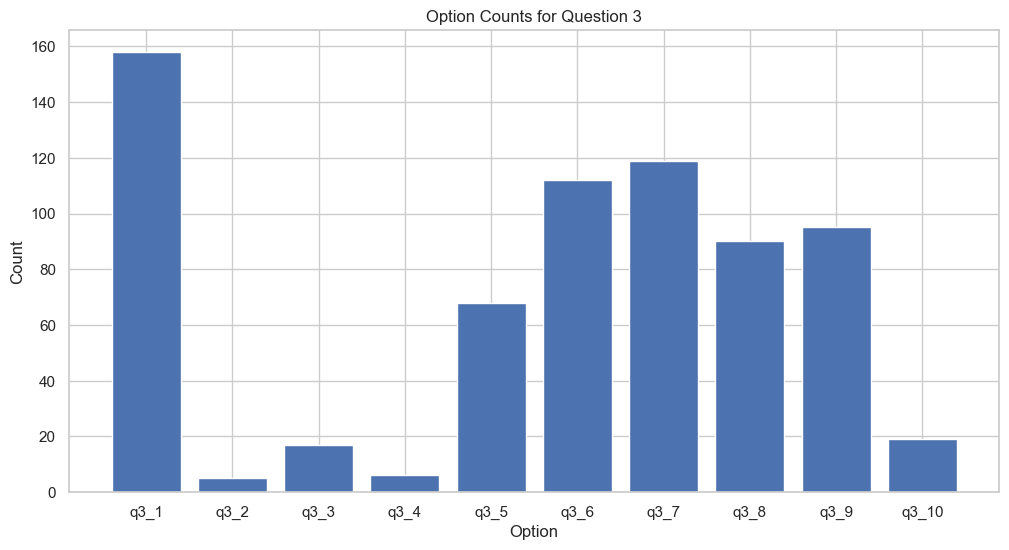

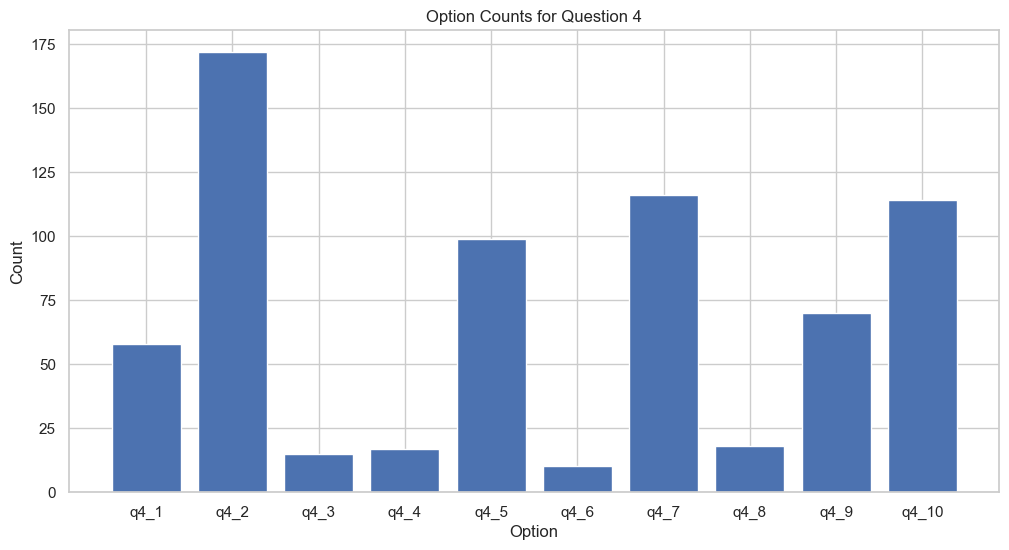

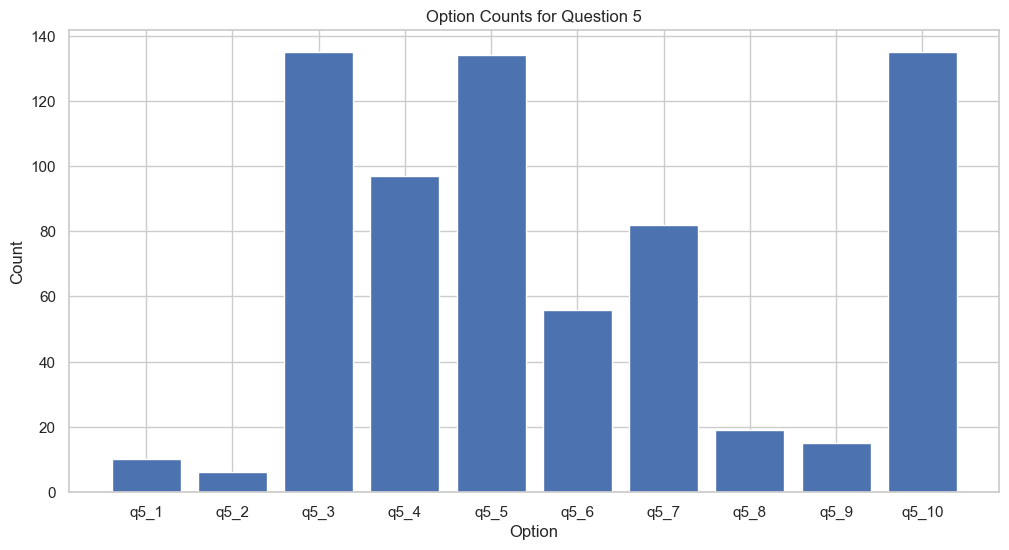

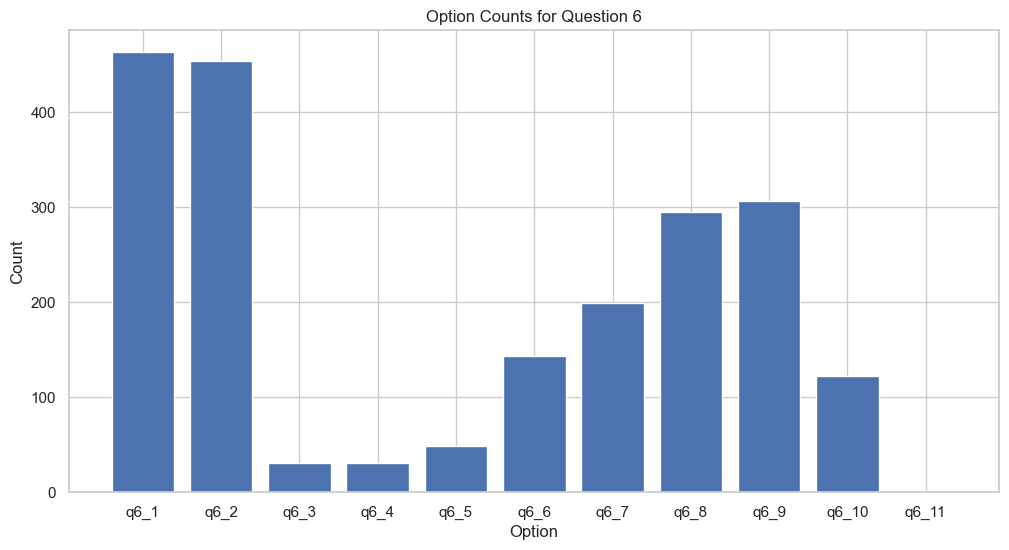

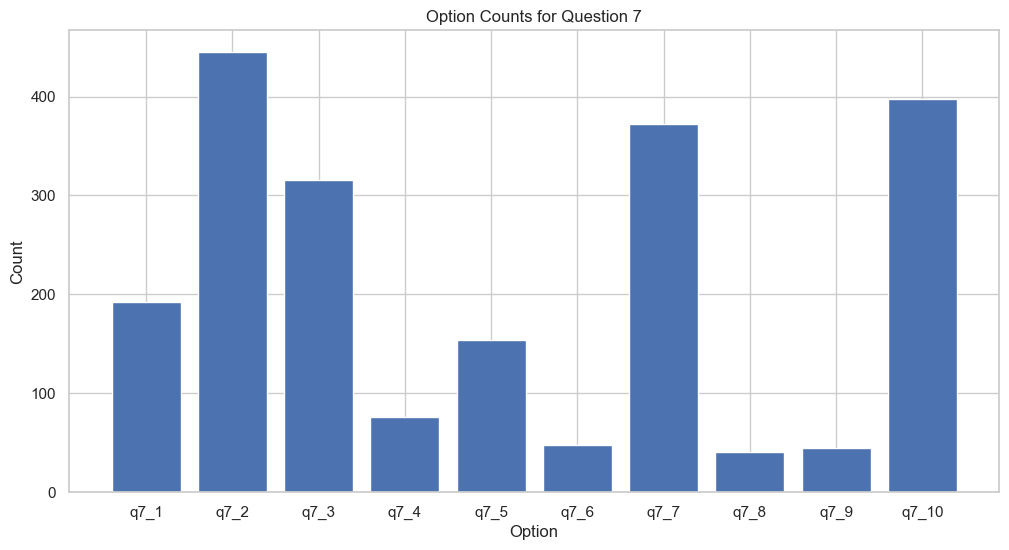

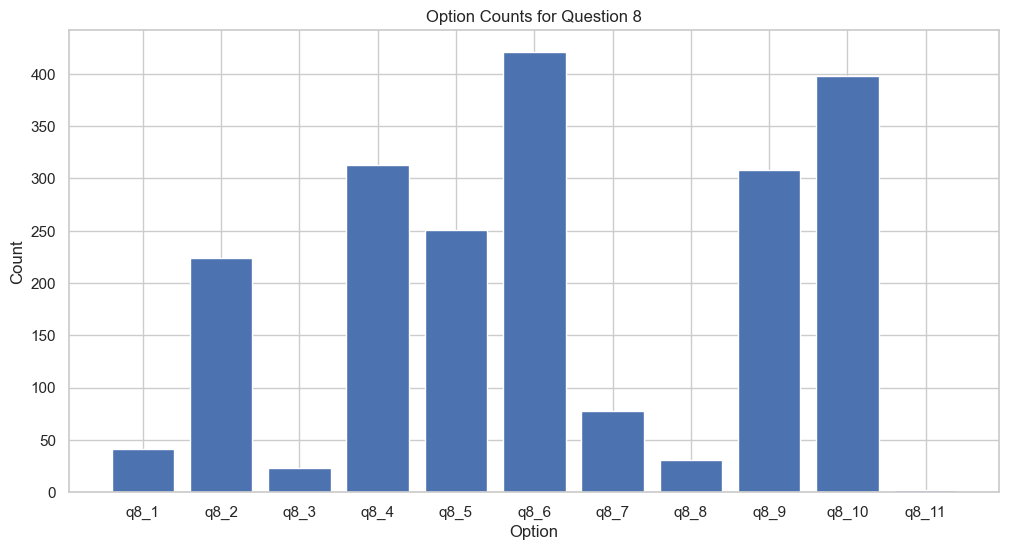

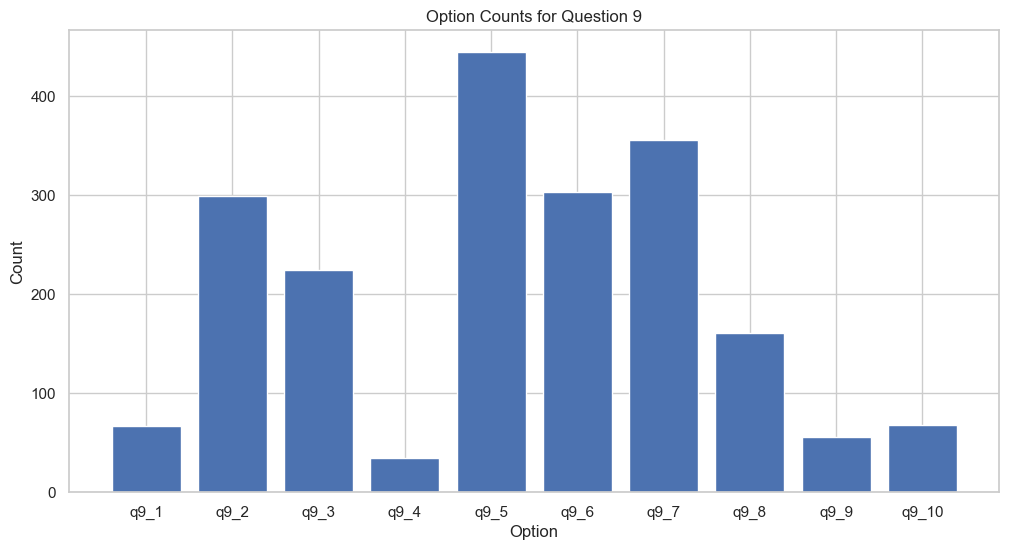

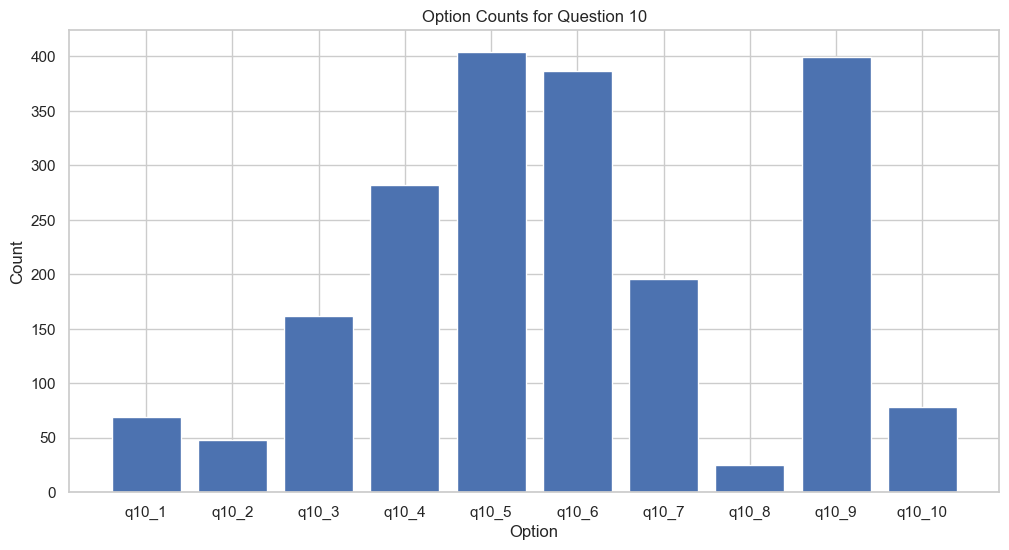

In [110]:
#Initiating A which will go over the list of Question Number Names
A=0
#Creating For loop (Each loop creates bar chart for 1 Question)
for M in List_1:
    #Obtaining No. of times an option in a question was selected 
    Count_1 = np.count_nonzero(M, axis=0).tolist()
    #Obtaining name of Option in relation to Question
    XLabel_1 = list(M)
    #Plot Size
    plt.figure(figsize=(12,6))
    #Bar Chart Plot 
    #Name of Option in x-axis and number of times option was selected in y-axis
    plt.bar(XLabel_1, Count_1)
    #List of Questions (To be used to used for title of Bar Chart)
    Question_Numbers_1 = ["3", "4", "5", "6", "7", "8", "9", "10"]
    #Taking Ath value from Question_Numbers_0 list
    Question_Number_1 = Question_Numbers_1[A]
    #Changing value of A s.t. in next for loop plot title will refer to next question
    A=A+1
    #Title of Bar Chart
    plt.title("Option Counts for Question " + str(Question_Number_1))
    #X-label name
    plt.xlabel('Option')
    #Y-Label name
    plt.ylabel('Count')
    #Show Plot
    plt.show()

Description of Group using Above Plots:
1. Let us consider the Bar Chart Plot entitled "Option Counts for Question 3". It is clear that individuals in Cluster 1 selected q3_2, q3_3, q3_4 and q3_10 far less than other options. q3_1 was the most selected question which is in stark contrast to respondents of cluster 0 were very few selected option q3_1.


2. Let us consider the Bar Chart Plot entitled "Option Counts for Question 4". It is clear that individuals in Cluster 1 selected q4_3, q4_4, q4_6 and q4_8 far less than the other options. q4_2 is the most selected option which was not the case when considering all respondents.


3. Let us consider the Bar Chart Plot entitled "Option Counts for Question 5". It is clear that individuals in Cluster 1 selected q5_1, q5_2, q5_8 and q5_9 far less than the other options. However, q5_9 is not longer the least selected option with q5_1 and q5_2 both being selected less by individuals in Cluster 1 even though when considering all clusters they were selected significantly more.



4. Let us consider the Bar Chart Plot entitled "Option Counts for Question 6".  Clearly the vast majority of individuals in Cluster 1 selected q1_1 and therefore individuals in this cluster had fill-in Question 6. It is clear that individuals in Cluster 1 selected q6_3, q6_4 and q6_5 far less than the other options. q6_3 remains the least selected option (excl. q6_11) as was seen when considering all respondents hoewver the difference compared to the other options is less pronounced.


5. Let us consider the Bar Chart Plot entitled "Option Counts for Question 7".  Overall respondents in Cluster 1 selected q7_4, q7_6, q7_8 and q7_9 far less when compared to the other options.


6. Let us consider the Bar Chart Plot entitled "Option Counts for Question 8".  Clearly the vast majority of individuals in Cluster 1 selected q2_1 and therefore individuals in this cluster had to select an option from Question 8. This is a distinguishing factor on its own since when considering all respondents it can be noted that Question 8 was generally skipped.


7. Let us consider the Bar Chart Plot entitled "Option Counts for Question 9".  Overall respondents in Cluster 01selected q9_1, q9_4, q9_9 and q9_10 far less than the other options.


8. Let us consider the Bar Chart Plot entitled "Option Counts for Question 10".  Overall respondents in Cluster 1 selected q10_1, q10_2, q10_8 and q10_10 far less than the other options.

### Third Cluster/Group

In [111]:
#Creating a Data Frame Containing Only Respondents Belonging to the Third Group
Medoids_Dataset_Copy_2 = Medoids_Dataset_Copy[Medoids_Dataset_Copy["kmedoLabels"]==2]

In [112]:
#Splitting the Dataframe obtained (Medoids_Dataset_Copy_2) into the different questions
#One Bar Plot will be obtained for each question.
Q3_Medoid_2 = Medoids_Dataset_Copy_2.loc[:,'q3_1':'q3_10']
Q4_Medoid_2 = Medoids_Dataset_Copy_2.loc[:,'q4_1':'q4_10']
Q5_Medoid_2 = Medoids_Dataset_Copy_2.loc[:,'q5_1':'q5_10']
#For Question 6 recall that q6_11 is replacing q1_1 s.t. when q6_11=1 then q1_1=0
Q6_Medoid_2 = Medoids_Dataset_Copy_2.loc[:,['q6_1','q6_2','q6_3','q6_4','q6_5','q6_6','q6_7','q6_8','q6_9','q6_10','q6_11']]
Q7_Medoid_2 = Medoids_Dataset_Copy_2.loc[:,'q7_1':'q7_10']
#For Question 8 recall that q6_11 is replacing q2_1 s.t. when q8_11=1 then q2_1=0
Q8_Medoid_2 = Medoids_Dataset_Copy_2.loc[:,['q8_1','q8_2','q8_3','q8_4','q8_5','q8_6','q8_7','q8_8','q8_9','q8_10','q8_11']]
Q9_Medoid_2 = Medoids_Dataset_Copy_2.loc[:,'q9_1':'q9_10']
Q10_Medoid_2 = Medoids_Dataset_Copy_2.loc[:,'q10_1':'q10_10']

In [113]:
#Creating a List of data which will be used to plot each Bar Chart
List_2 = [Q3_Medoid_2, Q4_Medoid_2, Q5_Medoid_2, Q6_Medoid_2,
       Q7_Medoid_2, Q8_Medoid_2, Q9_Medoid_2, Q10_Medoid_2]

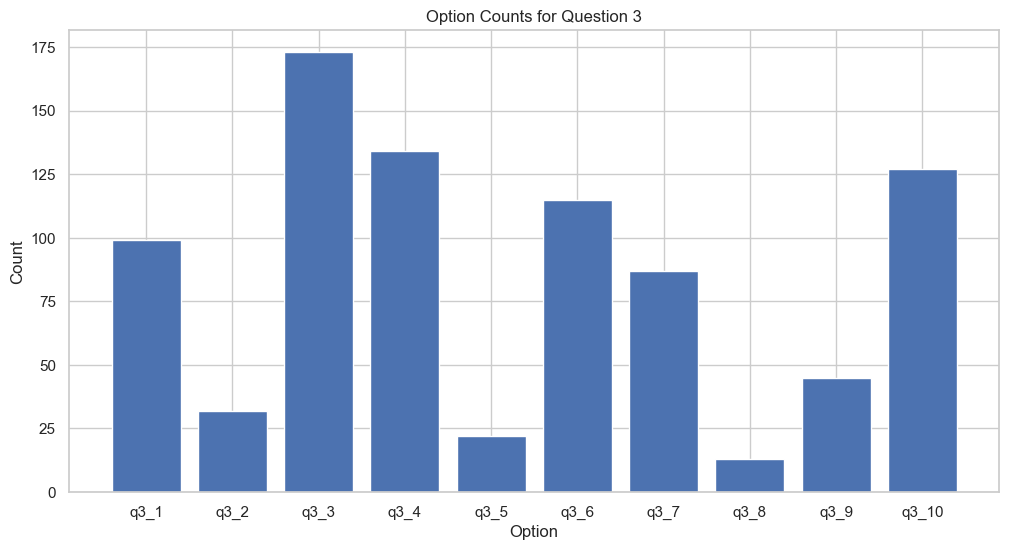

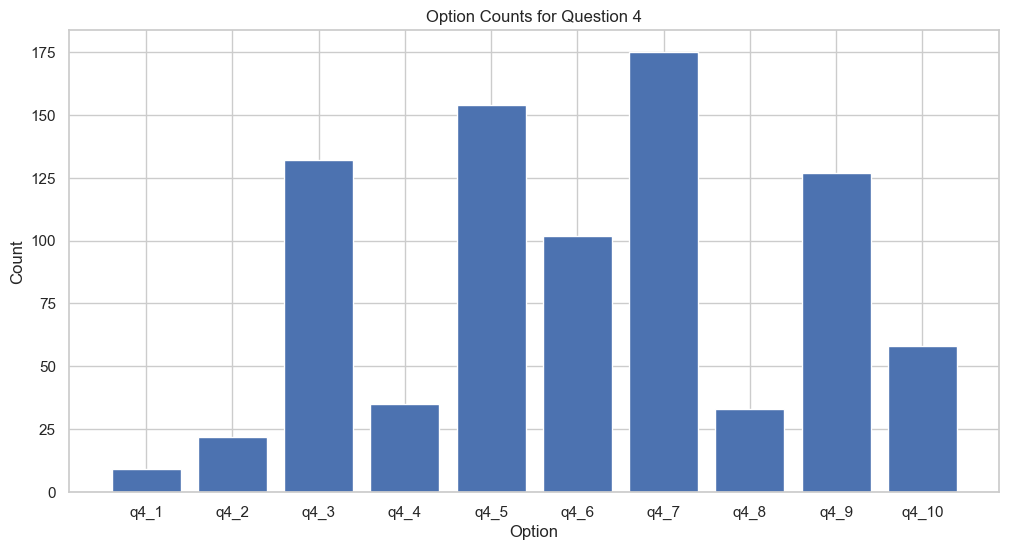

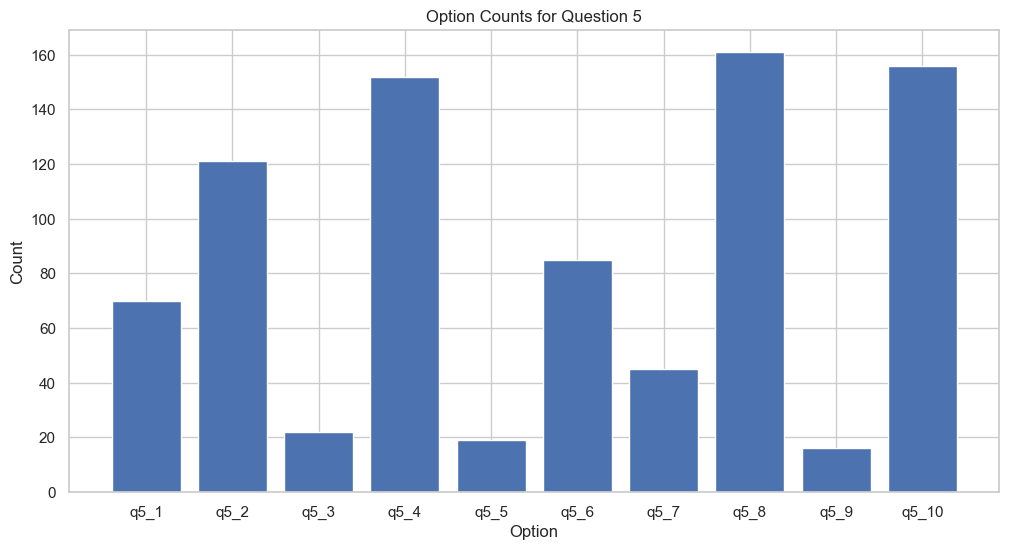

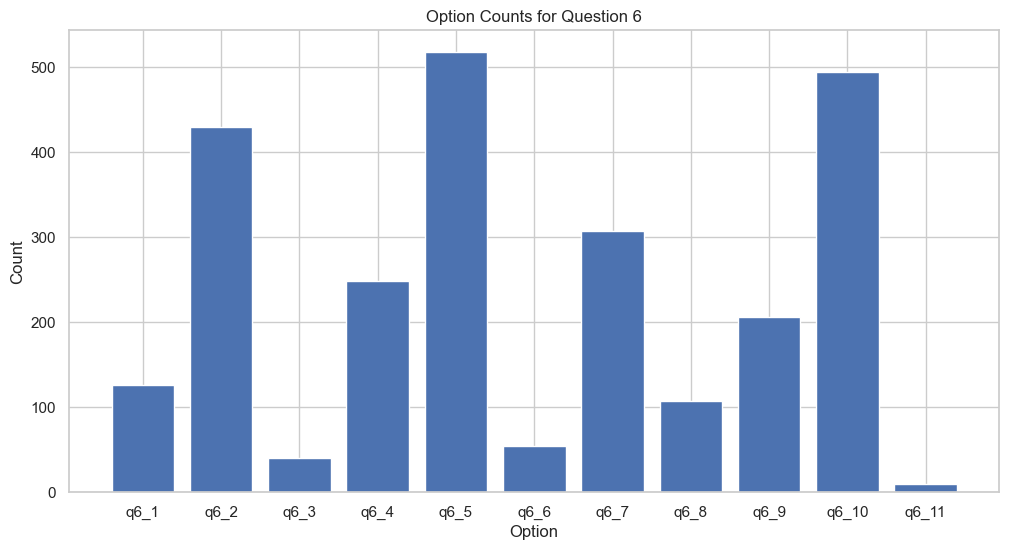

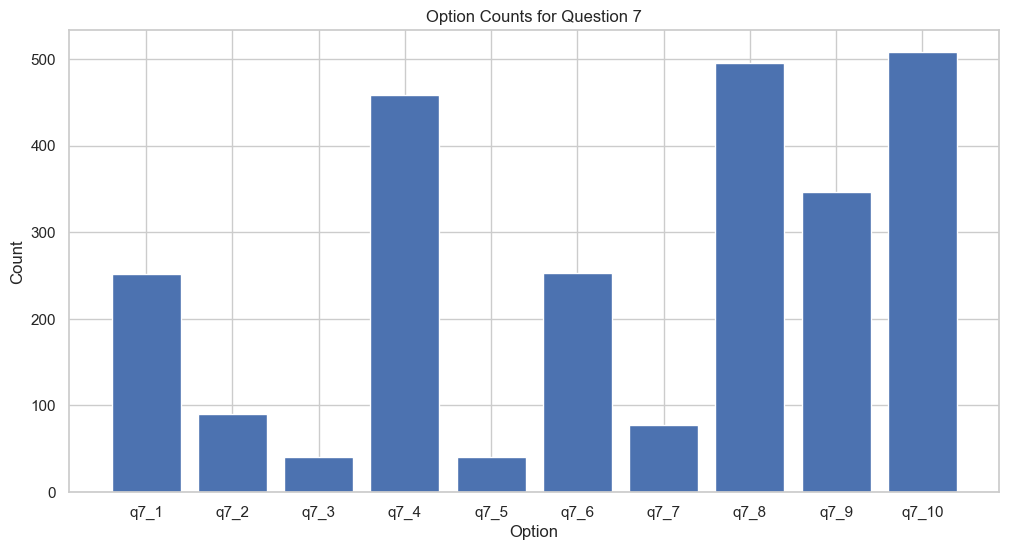

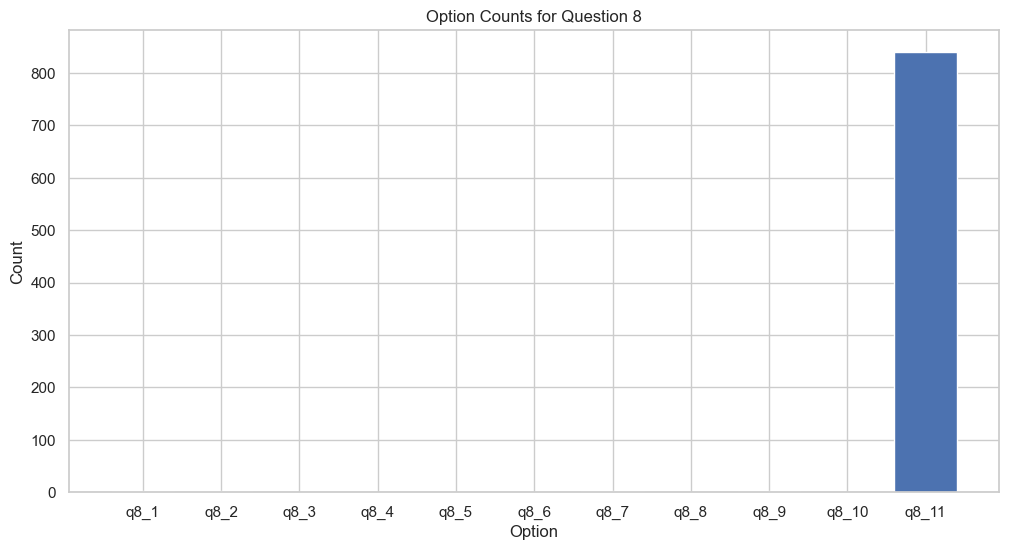

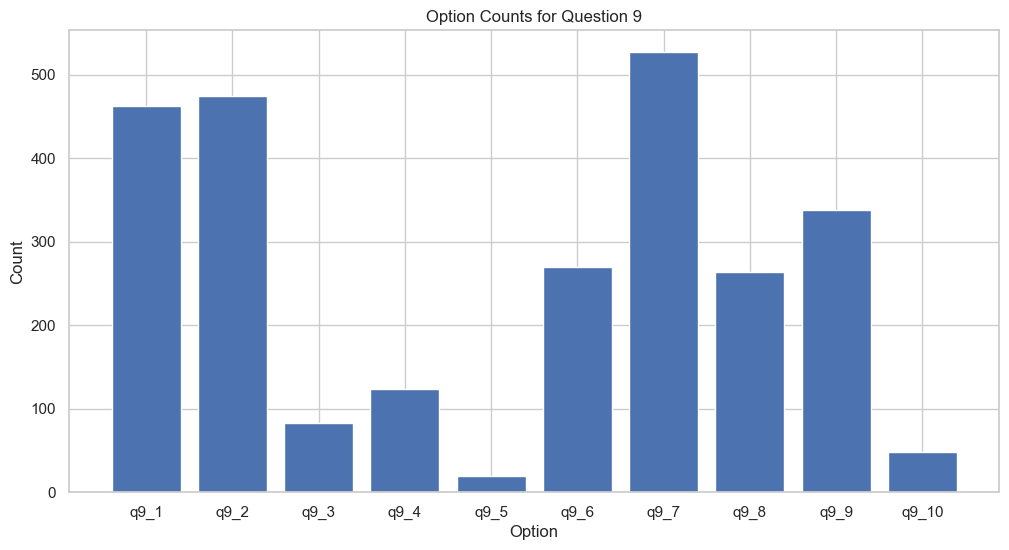

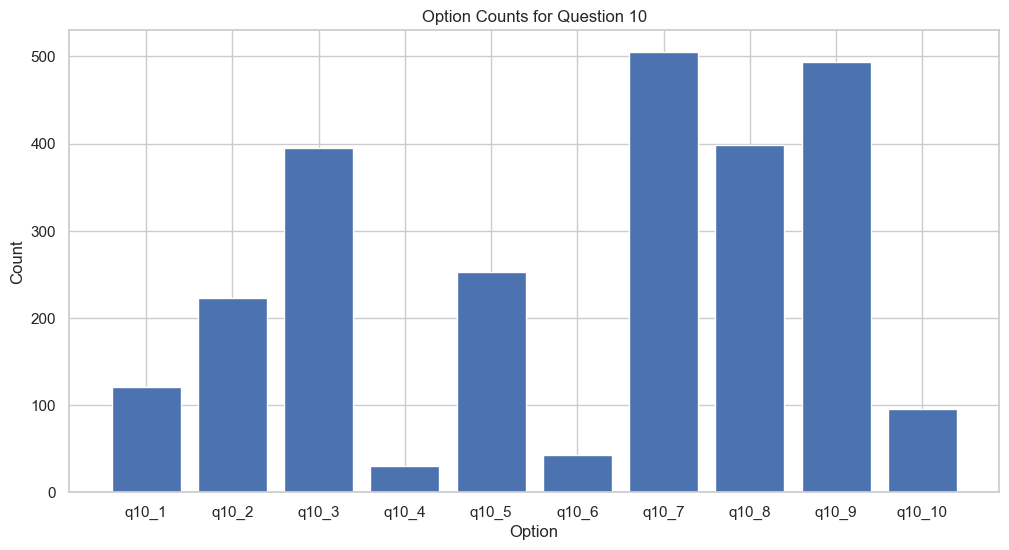

In [114]:
#Initiating A which will go over the list of Question Number Names
A=0
#Creating For loop (Each loop creates bar chart for 1 Question)
for M in List_2:
    #Obtaining No. of times an option in a question was selected 
    Count_2 = np.count_nonzero(M, axis=0).tolist()
    #Obtaining name of Option in relation to Question
    XLabel_2 = list(M)
    #Plot Size
    plt.figure(figsize=(12,6))
    #Bar Chart Plot 
    #Name of Option in x-axis and number of times option was selected in y-axis
    plt.bar(XLabel_2, Count_2)
    #List of Questions (To be used to used for title of Bar Chart)
    Question_Numbers_2 = ["3", "4", "5", "6", "7", "8", "9", "10"]
    #Taking Ath value from Question_Numbers_0 list
    Question_Number_2 = Question_Numbers_2[A]
    #Changing value of A s.t. in next for loop plot title will refer to next question
    A=A+1
    #Title of Bar Chart
    plt.title("Option Counts for Question " + str(Question_Number_2))
    #X-label name
    plt.xlabel('Option')
    #Y-Label name
    plt.ylabel('Count')
    #Show Plot
    plt.show()

Description of Group using Above Plots:
1. Let us consider the Bar Chart Plot entitled "Option Counts for Question 3". It is clear that individuals in Cluster 2 selected q3_2, q3_5, q3_8 and q3_9 less than the other options. 


2. Let us consider the Bar Chart Plot entitled "Option Counts for Question 4". It is clear that individuals in Cluster 2 selected q4_1, q4_2, q4_4 and q4_8 far less than the other options. q4_4 was the least selected option when considering all respondents however this is not the case since q4_1 and q4_2 are the least selected options for Cluster 2.


3. Let us consider the Bar Chart Plot entitled "Option Counts for Question 5". It is clear that individuals in Cluster 2 selected q5_3, q5_5, q5_7 and q5_9 far less than the other options.


4. Let us consider the Bar Chart Plot entitled "Option Counts for Question 6".  Clearly the vast majority of individuals in Cluster 2 selected q1_1 and therefore individuals in this cluster had to select an option from Question 6. It is clear that individuals in Cluster 2 selected q6_1 and q6_3 far less than the other options.


5. Let us consider the Bar Chart Plot entitled "Option Counts for Question 7". Overall respondents in Cluster 2 selected q7_2, q7_3, q7_5 and q7_7 far less than the other options. q7_10 remains the most popular selection as seen when considering all respondents however the difference is less pronounced.


6. Let us consider the Bar Chart Plot entitled "Option Counts for Question 8". Clearly the absolute majority of individuals in Cluster 2 did not select q2_1 and therefore individuals in this cluster skipped q8 entirely.


7. Let us consider the Bar Chart Plot entitled "Option Counts for Question 9".  Overall respondents in Cluster 2 were selected q9_3, q9_4, q9_5 and q9_10 far less than the other options.


8. Let us consider the Bar Chart Plot entitled "Option Counts for Question 10". Overall respondents in Cluster 2 selected q10_4 and q10_6 far less than the other options.

### Fourth Cluster/Group

In [115]:
#Creating a Data Frame Containing Only Respondents Belonging to the Fourth Group
Medoids_Dataset_Copy_3 = Medoids_Dataset_Copy[Medoids_Dataset_Copy["kmedoLabels"]==3]

In [116]:
#Splitting the Dataframe obtained (Medoids_Dataset_Copy_3) into the different questions
#One Bar Plot will be obtained for each question.
Q3_Medoid_3 = Medoids_Dataset_Copy_3.loc[:,'q3_1':'q3_10']
Q4_Medoid_3 = Medoids_Dataset_Copy_3.loc[:,'q4_1':'q4_10']
Q5_Medoid_3 = Medoids_Dataset_Copy_3.loc[:,'q5_1':'q5_10']
#For Question 6 recall that q6_11 is replacing q1_1 s.t. when q6_11=1 then q1_1=0
Q6_Medoid_3 = Medoids_Dataset_Copy_3.loc[:,['q6_1','q6_2','q6_3','q6_4','q6_5','q6_6','q6_7','q6_8','q6_9','q6_10','q6_11']]
Q7_Medoid_3 = Medoids_Dataset_Copy_3.loc[:,'q7_1':'q7_10']
#For Question 8 recall that q6_11 is replacing q2_1 s.t. when q8_11=1 then q2_1=0
Q8_Medoid_3 = Medoids_Dataset_Copy_3.loc[:,['q8_1','q8_2','q8_3','q8_4','q8_5','q8_6','q8_7','q8_8','q8_9','q8_10','q8_11']]
Q9_Medoid_3 = Medoids_Dataset_Copy_3.loc[:,'q9_1':'q9_10']
Q10_Medoid_3 = Medoids_Dataset_Copy_3.loc[:,'q10_1':'q10_10']

In [117]:
#Creating a List of data which will be used to plot each Bar Chart
List_3 = [Q3_Medoid_3, Q4_Medoid_3, Q5_Medoid_3, Q6_Medoid_3,
       Q7_Medoid_3, Q8_Medoid_3, Q9_Medoid_3, Q10_Medoid_3]

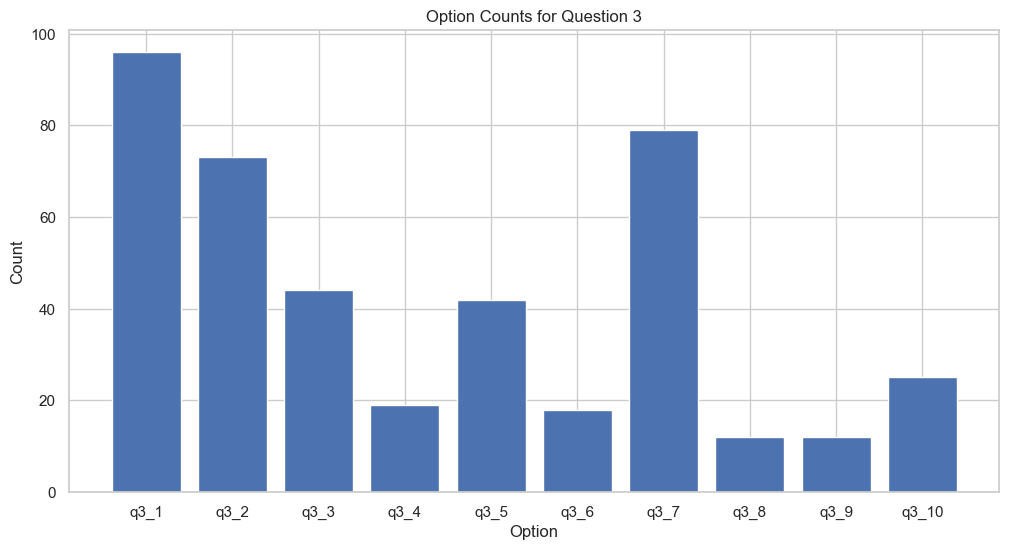

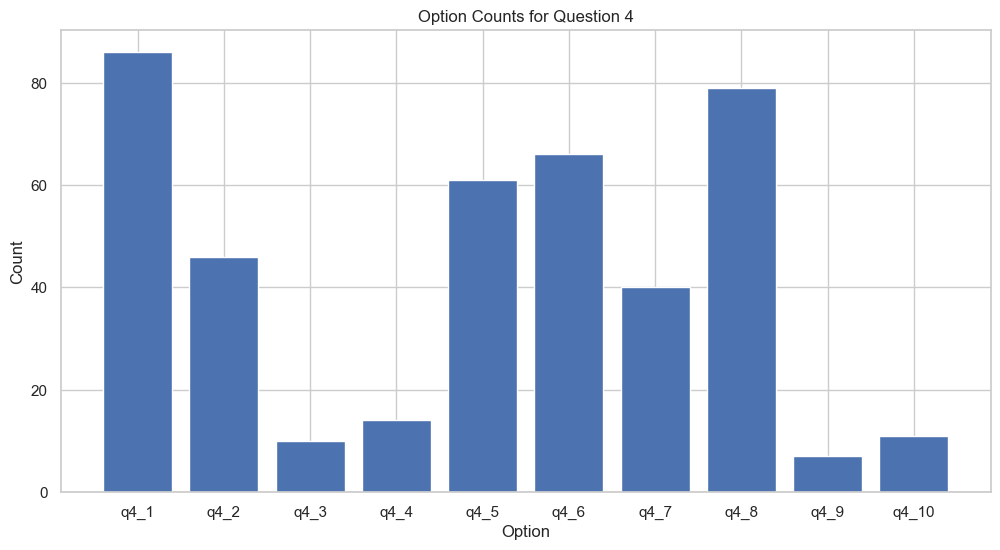

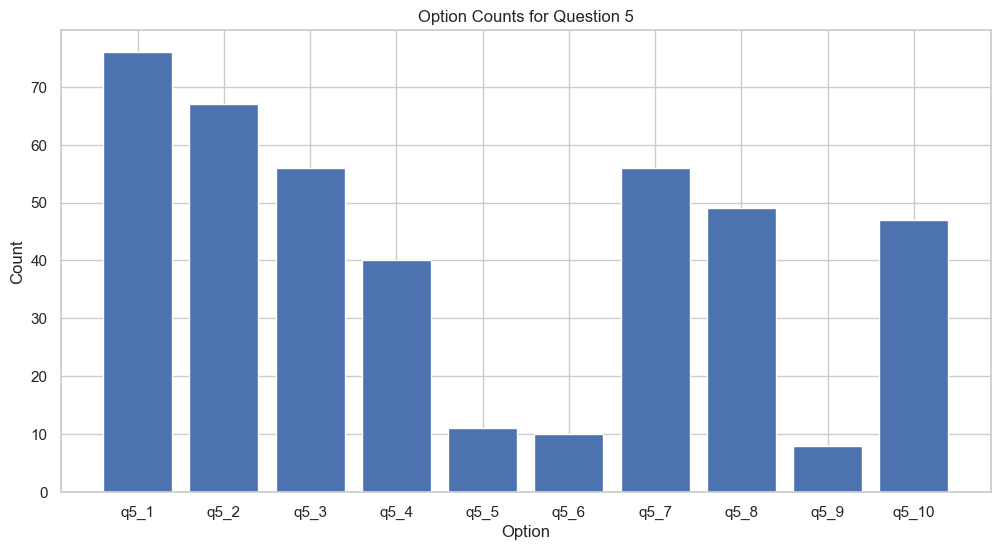

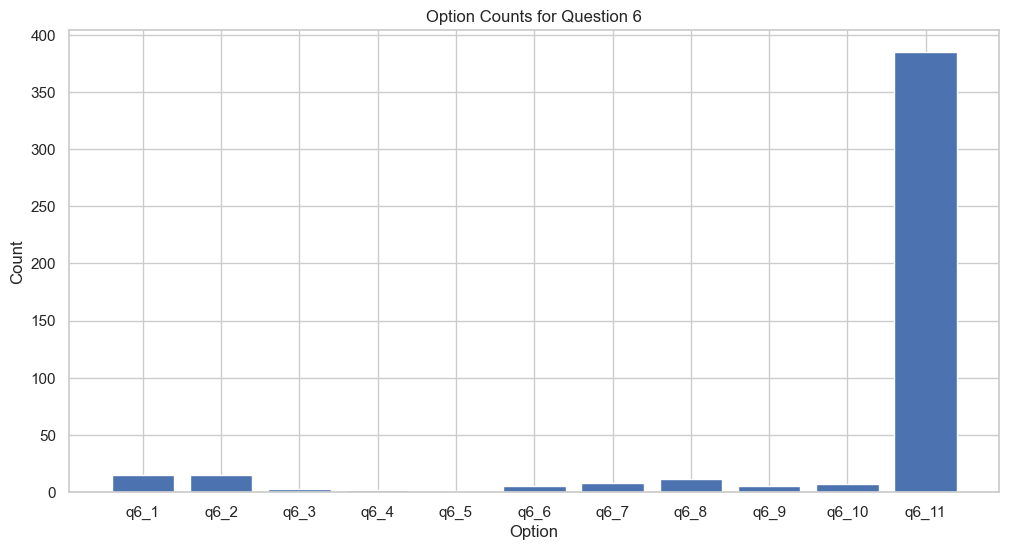

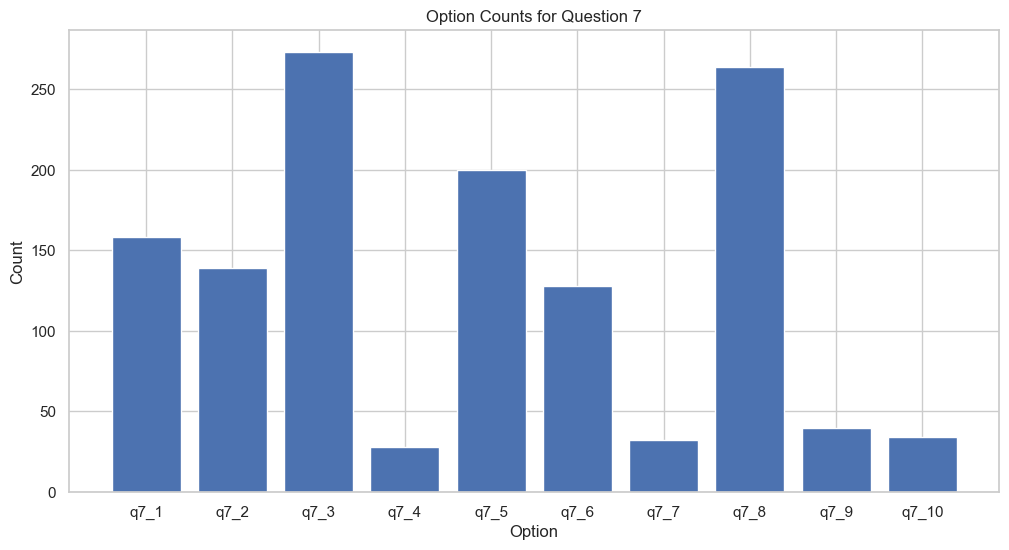

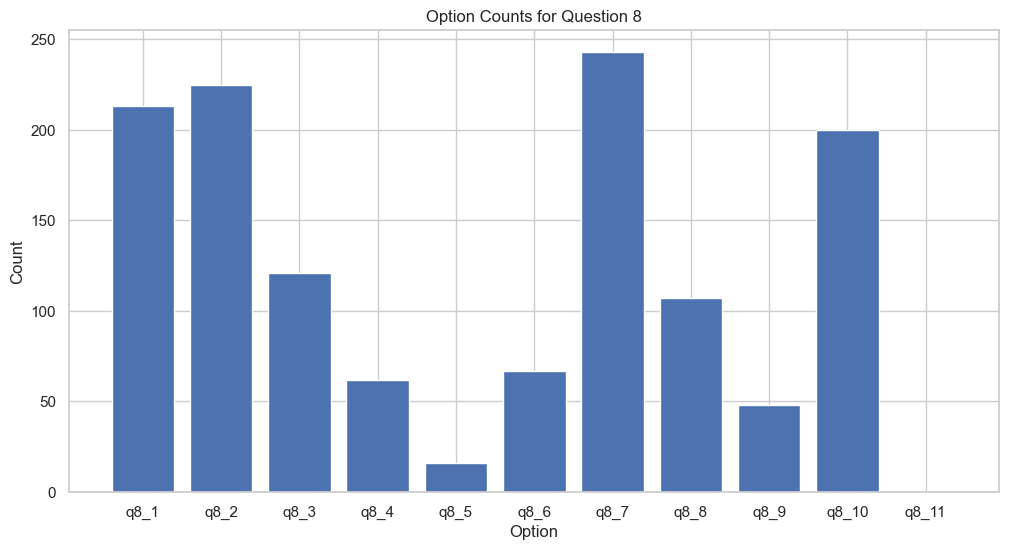

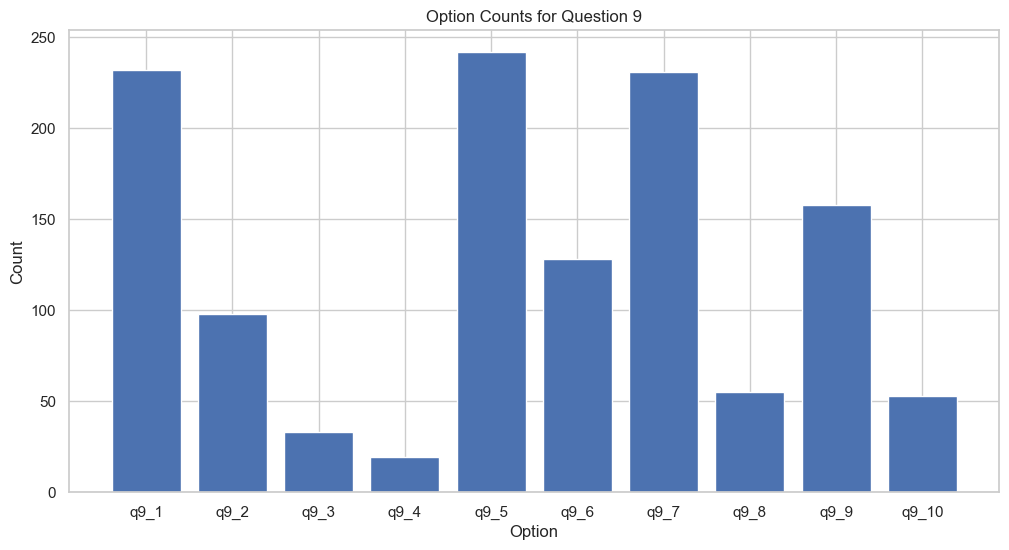

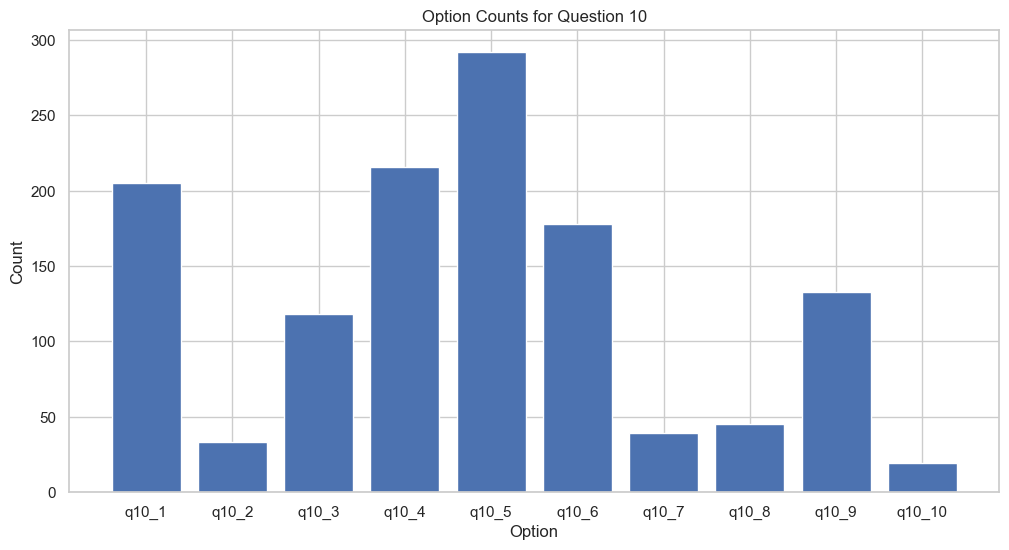

In [118]:
#Initiating A which will go over the list of Question Number Names
A=0
#Creating For loop (Each loop creates bar chart for 1 Question)
for M in List_3:
    #Obtaining No. of times an option in a question was selected 
    Count_3 = np.count_nonzero(M, axis=0).tolist()
    #Obtaining name of Option in relation to Question
    XLabel_3 = list(M)
    #Plot Size
    plt.figure(figsize=(12,6))
    #Bar Chart Plot 
    #Name of Option in x-axis and number of times option was selected in y-axis
    plt.bar(XLabel_3, Count_3)
    #List of Questions (To be used to used for title of Bar Chart)
    Question_Numbers_3 = ["3", "4", "5", "6", "7", "8", "9", "10"]
    #Taking Ath value from Question_Numbers_0 list
    Question_Number_3 = Question_Numbers_3[A]
    #Changing value of A s.t. in next for loop plot title will refer to next question
    A=A+1
    #Title of Bar Chart
    plt.title("Option Counts for Question " + str(Question_Number_3))
    #X-label name
    plt.xlabel('Option')
    #Y-Label name
    plt.ylabel('Count')
    #Show Plot
    plt.show()

Description of Group using Above Plots:
1. Let us consider the Bar Chart Plot entitled "Option Counts for Question 3". It is clear that individuals in Cluster 3 selected q3_3, q3_6, q3_8, q3_9 and q3_10 far less than other options. 


2. Let us consider the Bar Chart Plot entitled "Option Counts for Question 4". It is clear that individuals in Cluster 3 selected q4_3, q4_4, q4_9 and q4_10 far less than the other options. q4_1 is the most selected option by cluster 3 which was not the case when considering all respondents.


3. Let us consider the Bar Chart Plot entitled "Option Counts for Question 5". It is clear that individuals in Cluster 3 selected q5_5, q5_6 and q5_9 far less than the other options. q5_4 and q5_10 are also two of the lest preferred options of respondents in cluster 3. This was not the case when all respondents were considered since both of these options were easily the two most selected.


4. Let us consider the Bar Chart Plot entitled "Option Counts for Question 6". Clearly the vast majority of individuals in Cluster 3 did not select q1_1 and therefore individuals in this cluster skipped q6 entirely which is a distinguishing feature of this group.



5. Let us consider the Bar Chart Plot entitled "Option Counts for Question 7". It is clear that individuals in Cluster 3 selected q7_4, q7_7, q7_9 and q7_10 the least. This is an important distinguishing fact since when considering all respondents q7_10 was one of the most selected options in Question 7.
 


6. Let us consider the Bar Chart Plot entitled "Option Counts for Question 8". Clearly the vast majority of individuals in Cluster 3 selected q2_1 and therefore individuals in this cluster had to select an option from Question 8. It is clear that individuals in Cluster 3 selected q8_5 far less than the other options.


7. Let us consider the Bar Chart Plot entitled "Option Counts for Question 9". Overall respondents in Cluster 3 selected q9_4 far less than the other options.


8. Let us consider the Bar Chart Plot entitled "Option Counts for Question 10". Overall respondents in Cluster 3 selected q10_2, q10_7, q10_8 and q10_10 far less than the other options.

### Task 4 Part 5: Would you use any visualisations of the results?

As discussed in Part 3, the K-Medoids algorithm in implemented in Part 1 was identified as the best clustering algorithm using the Silhoette Coefficient. As a result, we shall proceed by visualising the clusters obtained following the application of this algorithm. 

Since dataset consists of a large number of features we are unable to plot data directly to a scatter plot [13]. Hence PCA will be used to decrease dimensionality.This dimensionally reduced dataset will then be used to visualise the clusters intuitively with each cluster given a different colouring.

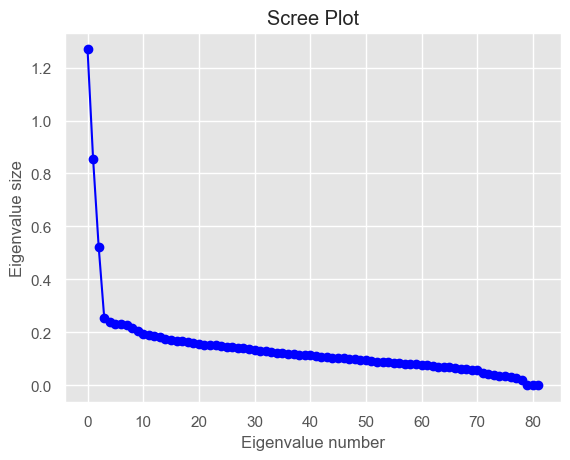

In [119]:
#Code used to obtain Obtain Scree Plot for our Dataset

#Run PCA without specying number of components 
pca = PCA(n_components = None)
pca.fit(Medoids_Dataset)

#Obtain list of eigen values
eigen_vals = pca.explained_variance_

#Creating Scree Plot 
plt.style.use("ggplot")
#Plotting Number of Factors on the x-axis and eigenvalues on the y-axis
plt.plot(eigen_vals, marker='o', color='blue')
#X-axis Label
plt.xlabel("Eigenvalue number")
#Y-axis Label
plt.ylabel("Eigenvalue size")
#Title Label
plt.title("Scree Plot")
plt.show()

The elbow is occuring when number of factors is around 4. For the purpose of the plot however we will take the number of factors as 3 so as to be able to show data as a 3-Dimensional plot.

In [120]:
#Appling PCA with value of components equal to 3
pca = PCA(n_components=3)
pca.fit(Medoids_Dataset)

PCA(n_components=3)

In [121]:
#Transforming out Dataset to obtain dimensionally reduced set of features
Feature = pca.transform(Medoids_Dataset)

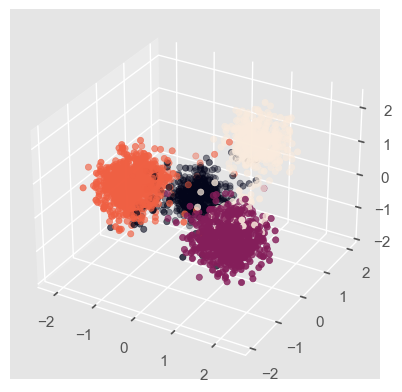

In [122]:
#Plotting 3D Figure
fig = plt.figure()
ax = plt.axes(projection='3d')
#Take first column of Feature as x-axis
xdata = Feature[:, 0]
#Take Second Column of Feature as y-axis
ydata = Feature[:, 1]
#Take Third Column of Feature as z-axis
zdata = Feature[:, 2]
#Obtain 3D Scatter Plot with different cluster colours
ax.scatter3D(xdata, ydata, zdata, c = Medoids_Dataset_Copy.kmedoLabels)

### Task 4 Part 6: How would you assign a new respondent to an existing group?

We shall proceed by consider the Medoid algorithm implemented in Part 1 since this is the best algorithm as discussed in Part 3. 

After the number of clusters (K) to be created has been decided the K-Medoid clustering algorithm proceeds as follows:
1. K data points (Medoids) are randomly selected to be the centre for each cluster.
2. The remaining data points are assigned to the closest Metoid according to some distance metric **(NB: Jacard Distance was used for the purpose of this assignment)**
3. Total distance between the medoid all data points in cluster (dissimilarity) is calculated.
4. Select another medoid for each cluster and once again calculate the total dissimilarity. New metoid is selected such that lowest possible dissimalrity is achieved.
5. Steps 2-4 are repeated until
    1. No further improvement in total dissimilarity is achieved and 
    2. The predefined number of iterations is reached.
    
In our assignment we have a total of four clusters each with a specific Metoid.
Therefore if we want to assign a new respondent to one of our 4 existing groups we have to carry out the following two steps:
1. Calculate the Jaccard distance between the new point and each of the 4 medoids. 
2. Assign the data point to the cluster of the medoid with the lowest Jaccard distance calculated in one.

We shall proceed by considring an example of how a new data point can be assigned to one of our existing clusters.

In [123]:
#Obtain list of Medoids for our dataset
Medoid_Centers = Metoids_Application.cluster_centers_

In [124]:
#Define some new data point
New_Data_Point = [0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0]

In [125]:
#Defining Jaccard Distance Function (Quote Source)
def Jaccard_Similarity(Medoid,New_Data_Point):
    intersection = np.logical_and(Medoid,New_Data_Point)
    union = np.logical_or(Medoid,New_Data_Point)
    similarity = intersection.sum()/float(union.sum())
    return similarity

In [126]:
k=0
Distance = []
while k<=3:
    Similarity = Jaccard_Similarity(Medoid_Centers[k],New_Data_Point)
    Distances = 1 -Similarity
    print('Dissimilarity Value between Cluster {} & Data Point is {}'.format(k,Distances))
    Distance.append(Distances)
    k = k+1

Dissimilarity Value between Cluster 0 & Data Point is 0.9259259259259259
Dissimilarity Value between Cluster 1 & Data Point is 0.896551724137931
Dissimilarity Value between Cluster 2 & Data Point is 0.90625
Dissimilarity Value between Cluster 3 & Data Point is 0.8928571428571429


Therefore from the above results our new data point should belong to cluster 3 as this is the group with the lowest dissimilarity value.

# References

[1]
R. Karim, Machine Learning with Scala Quick Start Guide: Leverage Popular Machine Learning Algorithms and Techniques and Implement Them in Scala. Birmingham: Birmingham: Packt Publishing, Limited, 2019.


[2]
I. M. De Diego, A. R. Redondo, R. R. Fernández, J. Navarro, and J. M. Moguerza, “General Performance Score for classification problems,” vol. 52, no. 10, pp. 12049–12063, 2022, doi: 10.1007/s10489-021-03041-7.


[3]
J. Diao, Q. Zhou, H. Wang, and Y. Yang, “Label Metric for Multi-Class Multi-Target Tracking under Hierarchical Multilevel Classification,” vol. 22, no. 22, p. 8613, 2022, doi: 10.3390/s22228613.


[4]
F. Herrera, F. Charte, A. J. Rivera, and del J. María,J., Multilabel Classification: Problem Analysis, Metrics and Techniques. Cham: Cham: Springer International Publishing AG, 2016.


[5]
C. Ghosh, Data Analysis with Machine Learning for Psychologists: Crash Course to Learn Python 3 and Machine Learning in 10 Hours. Cham: Cham: Springer International Publishing AG, 2022.

[6]
T. Emmanuel, T. Maupong, D. Mpoeleng, T. Semong, B. Mphago, and O. Tabona, “A survey on missing data in machine learning,” vol. 8, no. 1, p. 140, 2021, doi: 10.1186/s40537-021-00516-9.



[7]
SP Estimation for Chi‐Square Statistical Tests. Hoboken, NJ, USA: Hoboken, NJ, USA: John Wiley & Sons, Inc, 2013, pp. 135–144.


[8]
D. Rizopoulos, “Max Kuhn and Kjell Johnson. Applied Predictive Modeling. New York, Springer: Book Review,” vol. 74, no. 1, p. 383, 2018, doi: 10.1111/biom.12855.

[9]
K. Makantasis, "Supervised Learning Classification and Regression" [Power Point slides]. Available:https://www.um.edu.mt/vle/course/view.php?id=66632 


[10]
N. V. Chawla, K. W. Bowyer, L. O. Hall, and W. P. Kegelmeyer, “SMOTE: Synthetic minority over-sampling technique,” vol. 16, pp. 321–357, 2011, doi: 10.1613/jair.953.


[11]
S. Suthaharan, Machine Learning Models and Algorithms for Big Data Classification: Thinking with Examples for Effective Learning, vol. 36. New York, NY: New York, NY: Springer, 2015.


[12]
M. Z. Rodriguez et al., “Clustering algorithms: A comparative approach,” vol. 14, no. 1, p. e0210236, 2019, doi: 10.1371/journal.pone.0210236.


[13]
H. Abdi and L. J. Williams, “Principal component analysis,” vol. 2, no. 4, pp. 433–459, 2010, doi: 10.1002/wics.101.














